# **<font color = green> <center> Capstone -Sentiment Based Product Recommendation System </center>**

##### <font color = orange>Submission By:
- Vinodh Nagarajaiah

## <strong><font color = #FF6666> <u> About the Capstone </u> </strong></font>

   <font color = #FF0099> The e-commerce business is quite popular today. Here, you do not need to take orders by going to each customer. A company launches its website to sell the items to the end consumer, and customers can order the products that they require from the same website. Famous examples of such e-commerce companies are Amazon, Flipkart, Myntra, Paytm and Snapdeal.

   <font color = #FF0099> Suppose you are working as a Machine Learning Engineer in an e-commerce company named <strong>'Ebuss'</strong>. Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

<font color = #FF0099> With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders. </font>

## <strong><font color = #FF6666> <u> Business Objective of the Capstone </u> </strong></font>
<font color = #FF0099> As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. </font>

<font color = #FF0099>In-order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks:
1. <font color = #FF0099>Data sourcing and sentiment analysis
2. <font color = #FF0099>Building a recommendation system
3. <font color = #FF0099>Improving the recommendations using the sentiment analysis model
4. <font color = #FF0099>Deploying the end-to-end project with a user interface </font>

## <strong><font color = #FF6666> <u> Expectations From the Capstone </u> </strong></font>
1. <font color = #FF0099>Built at least two types of recommendation systems: user-based and item-based recommendation systems
2. <font color = #FF0099>Evaluated both the types of recommendation systems and selected one based on performance. Provided detailed reasons for selecting the recommendation system
3. <font color = #FF0099>Recommended the top 20 products for the username selected by the user based on the recommendation system built
4. <font color = #FF0099>Predicted the sentiment (positive or negative) of all the reviews in the train data set of the top 20 recommended products for a user. For each of the 20 products recommended, found the percentage of positive sentiments for all the reviews of each product.
5. <font color = #FF0099>Filtered out the top 5 products with the highest percentage of positive reviews.

## <font color = orange> <strong> <center> <u> SCAFFOLDING: Installing necessary packages </u> </center> </strong> </font>

## <font color = orange> <strong> <center> <u> SCAFFOLDING: Importing necessary libraries </u> </center> </strong> </font>

In [1]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install squarify
!pip install --upgrade matplotlib seaborn
!pip install pyspellchecker
!pip install --upgrade scikit-learn imbalanced-learn
!pip install imblearn
!pip install --upgrade imbalanced-learn
!pip install --upgrade xgboost numba
!pip install --upgrade xgboost scikit-learn cudf
!pip install --upgrade numpy scikit-learn

  Using cached en_core_web_sm-2.3.1-py3-none-any.whl
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
  Using cached numba-0.58.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached llvmlite-0.41.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.6 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.36.0
ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.
     |████████████████████████████████| 17.1 MB 1.2 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflic

In [2]:
import nltk
import json
import numpy as np
import re
import spacy
import string
import en_core_web_sm
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# from imblearn.over_sampling import SMOTE
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, precision_score, recall_score, f1_score,
                             RocCurveDisplay)
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics.pairwise import pairwise_distances
from pprint import pprint

# Load spaCy model
nlp = en_core_web_sm.load()

# Download NLTK resources
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')


## <font color = orange> <strong> <center> <u> SCAFFOLDING: Setting up pandas view setting necessary </u> </center> </strong> </font>

In [3]:
import pandas as pd

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', 300)
pd.set_option('display.precision', 2)

## <font color = orange> <strong> <center> <u> SCAFFOLDING: Enable settings to ignore warnings </u> </center> </strong> </font>

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## <font color = orange> <strong> <center> <u> UTILITIES: Helper methods </u> </center> </strong> </font>

In [5]:
# Utility functions to plot pie chart for data-types in the dataset

def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

def plot_datatype_pie_chart(dataframe):
    type_to_columns_dict = dataframe.columns.to_series().groupby(dataframe.dtypes).groups
    types_list = list(type_to_columns_dict.keys())

    type_to_fdCount_dict = dict.fromkeys(types_list)
    for key in types_list:
        type_to_fdCount_dict.update({key:len(type_to_columns_dict[key])})

    df = pd.DataFrame(type_to_fdCount_dict,index=['count']).transpose()
    explode_values = list()
    explode_values.append(0)
    for i in range(1,len(df)):
        explode_values.append(explode_values[i-1]+0.1)

    df.plot.pie(y='count',legend=False, figsize=(8, 8),autopct= autopct_format(df["count"]),
                explode=explode_values, shadow=True, startangle=0)
    plt.title("Datatype distribution for the dataset - {}".format(dataframe.attrs["name"]))
    plt.show()
    
    
# Utility function to attach a 'name' attribute tot he dataframe. Acts like metadata
def add_attribute(dataframe,attrKey,attrValue):
    dataframe.attrs[attrKey] = attrValue
    
# Utility method to plot box and displot side-by-side given a dataframe
def dist_box_plot(dataframe):
    for column in dataframe.columns:
        plt.figure(figsize=(15,5))

        plt.subplot(1,2,1)
        plt.title(column, fontdict={'fontsize': 12})
        sns.distplot(dataframe[column])

        plt.subplot(1,2,2)
        sns.boxplot(dataframe[column])
        plt.show()

In [6]:
import pandas as pd

def style_null_summary(df):
    # Filter columns with NULL values
    null_columns = df.columns[df.isna().any()]

    # Count NULL values in each column
    null_count = df[null_columns].isna().sum().sort_values(ascending=False)

    # Calculate percentage of NULL values in each column and format it to three decimal places
    null_percentage = (df[null_columns].isna().sum() * 100 / df.shape[0]).sort_values(ascending=False)
    null_percentage = null_percentage.map('{:.3f}%'.format)

    # Combine the count and formatted percentage into a DataFrame
    null_data = pd.DataFrame({
        'Count': null_count,
        'Percentage': null_percentage
    })

    # Add a numbering column
    null_data.reset_index(drop=False, inplace=True)
    null_data.rename(columns={'index': 'Column Number'}, inplace=True)

    # Function to determine cell color based on percentage
    def color_percentage(val):
        if isinstance(val, str) and '%' in val:
            percentage = float(val[:-1])  # Convert percentage string to float
            if percentage > 70:
                return 'background-color: red'
            elif 30 <= percentage <= 70:
                return 'background-color: orange'
            else:
                return 'background-color: lightgreen'
        return ''

    # Style the DataFrame
    styled_null_data = null_data.style.applymap(
        color_percentage,
        subset=['Percentage']
    ).applymap(
        lambda x: 'background-color: coral' if isinstance(x, int) and x > 0 else '',
        subset=['Count']
    )

    return styled_null_data

In [7]:
def plot_column_distribution_graph(dataframe, column_name):
    # Count occurrences of each unique value in the specified column, including NaN
    value_counts = dataframe[column_name].value_counts(dropna=False)
    
    # Calculate the percentage for each value
    percentages = (value_counts / len(dataframe)) * 100

    # Create a color map based on unique values
    colors = plt.cm.tab10(range(len(value_counts)))  # Using a colormap for distinct colors

    # Plot the distribution
    ax = value_counts.plot(kind='bar', color=colors, figsize=(8, 6))
    
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Annotate each bar with its percentage
    for i, value in enumerate(value_counts):
        pct_text = f'{percentages.iloc[i]:.2f}%'  # Format percentage to two decimal places
        ax.text(i, value + 0.02 * value, pct_text, ha='center', va='bottom', fontsize=12)
    
    plt.tight_layout()
    plt.show()

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_column_distribution_table(dataframe, column_name):
    # Count occurrences of each unique value in the specified column, including NaN
    value_counts = dataframe[column_name].value_counts(dropna=False)
    
    # Calculate the percentage for each value
    percentage = (value_counts / len(dataframe)) * 100
    
    # Create a DataFrame for the table with the count and percentage
    table_data = pd.DataFrame({
        column_name: value_counts.index,
        'Count': value_counts.values,
        'Percentage': percentage.map('{:.2f}%'.format)
    })

    # Create the table
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.axis('tight')
    ax.axis('off')
    
    table = ax.table(cellText=table_data.values, colLabels=table_data.columns, 
                     cellLoc='center', loc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    plt.title(f'Distribution Table for {column_name}', fontsize=16)
    plt.show()


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np

def visualize_skewness(df, column_name):
    # Check if column exists in the dataframe
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    # Handle non-numeric data by attempting to convert it
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

    # Drop NaN values from the column
    column_data = df[column_name].dropna()

    # If the column is empty after dropping NaNs, raise an error
    if column_data.empty:
        raise ValueError(f"Column '{column_name}' contains no valid numeric data.")

    # Plot the distribution of the column
    plt.figure(figsize=(8, 6))
    sns.histplot(column_data, kde=True, bins=10)
    plt.title(f'Distribution Plot of {column_name}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

    # Compute skewness
    column_skewness = skew(column_data)
    plt.axvline(column_data.mean(), color='red', linestyle='dashed', linewidth=2, label=f'Skewness: {column_skewness:.2f}')
    plt.legend()

    # Show the plot
    plt.show()

    # Print skewness value and state if it's positive or negative
    print(f"Skewness of '{column_name}': {column_skewness:.2f}")
    
    if column_skewness > 0:
        print(f"The column '{column_name}' is **positively skewed** (right-skewed).")
    elif column_skewness < 0:
        print(f"The column '{column_name}' is **negatively skewed** (left-skewed).")
    else:
        print(f"The column '{column_name}' is **symmetrical** or very close to symmetrical (minimal skewness).")

In [10]:
import pandas as pd

def unique_value_counts(dataframe):
    """
    Function to list the count of unique values for each column in the DataFrame.

    Parameters:
    - dataframe: The pandas DataFrame to analyze.
    
    Returns:
    - A DataFrame showing the count of unique values for each column.
    """
    unique_counts = {column: dataframe[column].nunique() for column in dataframe.columns}
    
    # Create a DataFrame from the unique counts
    unique_counts_df = pd.DataFrame(unique_counts, index=['Unique Count']).T.reset_index()
    unique_counts_df.columns = ['Column', 'Unique Count']
    
    return unique_counts_df

In [11]:
import pandas as pd
from IPython.display import display, HTML

def display_first_last_unique(dataframe, column_names):
    """
    Function to display the first 10 and last 10 unique values for specified columns
    in the DataFrame, with in-between values represented by dots, along with their counts and percentages.

    Parameters:
    - dataframe: The pandas DataFrame to analyze.
    - column_names: A list of column names for which to display unique values.
    """
    for column_name in column_names:
        if column_name in dataframe.columns:
            total_values = len(dataframe[column_name])
            unique_counts = dataframe[column_name].value_counts()
            unique_values = unique_counts.index.tolist()
            unique_count = len(unique_values)

            # Calculate percentages
            percentages = (unique_counts / total_values) * 100

            if unique_count <= 20:
                displayed_values = unique_counts
                displayed_percentages = percentages
            else:
                displayed_values = pd.Series(unique_counts[:10].tolist() + unique_counts[-10:].tolist(), 
                                             index=unique_values[:10] + unique_values[-10:], 
                                             name=column_name)
                displayed_percentages = pd.Series(percentages[:10].tolist() + percentages[-10:].tolist(), 
                                                  index=unique_values[:10] + unique_values[-10:], 
                                                  name=column_name)

            # Create a DataFrame for better formatting
            display_df = pd.DataFrame({
                'Count': displayed_values,
                'Percentage (%)': displayed_percentages
            })

            # Style the DataFrame with HTML
            display_html = f"<h3 style='color: orange;'>Unique values for column '<span style='color: blue;'>{column_name}</span>':</h3>"
            display(HTML(display_html))
            display(display_df.style.format({'Percentage (%)': '{:.2f}%'}).applymap(lambda x: 'color: green;' if x > 0 else ''))

        else:
            print(f"<span style='color: red;'>Column '{column_name}' does not exist in the DataFrame.</span>")

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown

def exploratory_data_analysis(df):
    """
    Function to perform exploratory data analysis focusing only on numeric columns.
    
    Parameters:
    - df: The pandas DataFrame to analyze.
    """
    
    # Display first 5 rows of the dataframe
    display(Markdown("### <span style='color:blue;'>First 5 rows of the data:</span>"))
    display(df.head())
    
    # Summary statistics for numeric columns
    numeric_cols = df.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0:
        display(Markdown("### <span style='color:green;'>Summary statistics for numeric columns:</span>"))
        display(df[numeric_cols].describe())
    else:
        display(Markdown("<p style='color:red;'>No numeric columns to analyze.</p>"))
        return
    
    # Check for missing values in numeric columns
    display(Markdown("### <span style='color:orange;'>Missing values in each numeric column:</span>"))
    display(df[numeric_cols].isnull().sum())
    
    # Plot the distribution of numeric columns
    if len(numeric_cols) > 0:
        df[numeric_cols].hist(bins=15, figsize=(15, 10), edgecolor='black')
        plt.suptitle("**Histograms of Numeric Columns**", fontsize=16)
        plt.show()
    
        # Plot boxplots for numeric columns (to detect outliers)
        plt.figure(figsize=(15, len(numeric_cols) * 4))
        for i, col in enumerate(numeric_cols, 1):
            plt.subplot(len(numeric_cols), 1, i)
            sns.boxplot(x=df[col], palette='Set1')
            plt.title(f"**Boxplot of {col}**", fontsize=16)
        plt.tight_layout()
        plt.show()
    
        # Correlation heatmap for numeric columns
        if len(numeric_cols) > 1:
            plt.figure(figsize=(10, 6))
            correlation = df[numeric_cols].corr()
            sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
            plt.title("**Correlation Heatmap**", fontsize=16)
            plt.show()
        
        # Pairplot for numeric columns
        if len(numeric_cols) > 1:
            sns.pairplot(df[numeric_cols].dropna(), corner=True)
            plt.suptitle("**Pairplot of Numeric Columns**", y=1.02, fontsize=16)
            plt.show()
    else:
        display(Markdown("<p style='color:red;'>No numeric columns to plot.</p>"))
    
    # Missing value heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].isnull(), cbar=False, cmap='viridis')
    plt.title("**Missing Value Heatmap**", fontsize=16)
    plt.show()

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

def visualize_non_numeric_column(df, column_name):
    """
    Visualize a non-numeric column in the DataFrame.

    Parameters:
    - df: The pandas DataFrame containing the data.
    - column_name: The name of the non-numeric column to visualize.
    """
    
    # Check if the column exists
    if column_name not in df.columns:
        display(Markdown(f"<p style='color:red;'>Column '{column_name}' not found in the DataFrame.</p>"))
        return
    
    # Check if the column is non-numeric
    if pd.api.types.is_numeric_dtype(df[column_name]):
        display(Markdown(f"<p style='color:red;'>Column '{column_name}' is numeric. Please provide a non-numeric column.</p>"))
        return
    
    # Drop missing values for visualization
    column_data = df[column_name].dropna()

    # Countplot for the non-numeric column
    plt.figure(figsize=(10, 6))
    sns.countplot(y=column_name, data=df, palette='Set2', order=column_data.value_counts().index)
    plt.title(f'Countplot of {column_name}', fontsize=16)
    plt.xlabel('Count')
    plt.ylabel(column_name)
    plt.show()

    # Display value counts for the column
    display(Markdown(f"### Value counts for '{column_name}':"))
    display(column_data.value_counts())

In [14]:
import re

def clean_punctuation(sent):
    """
    Cleans the input text by converting it to lowercase and removing punctuation.

    Args:
        sent (str): The input text to be cleaned.

    Returns:
        str: The cleaned text with punctuation removed and in lowercase.
    """
    if not isinstance(sent, str):
        raise ValueError("Input must be a string.")

    # Convert text to lowercase
    sent = sent.lower()
    
    # Remove punctuation
    pattern = r'[^\w\s]'  # Regex pattern to match any character that is not a word character or whitespace
    cleaned_sent = re.sub(pattern, '', sent)

    return cleaned_sent

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

# Define the set of stopwords
stopwords_set = set(stopwords.words('english'))

def clean_stopwords(sent):
    if not isinstance(sent, str):
        raise ValueError("Input must be a string.")
    
    # Convert text to lowercase
    sent = sent.lower()
    
    # Tokenize the sentence
    words = word_tokenize(sent)
    
    # Remove stopwords
    text_nostopwords = " ".join([word for word in words if word not in stopwords_set])
    
    return text_nostopwords


[nltk_data] Downloading package punkt to /home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
def clean_lemma(text):
    doc = nlp(text)
    return " ".join(token.lemma_ for token in doc)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import squarify

def visualize_class_imbalance(df, column_name):
    # Check if the column exists
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    # Count the occurrences of each class
    class_counts = df[column_name].value_counts(normalize=False)
    class_proportions = df[column_name].value_counts(normalize=True)

    # Summary Table
    summary_table = pd.DataFrame({
        'Count': class_counts,
        'Proportion': class_proportions
    }).reset_index()
    summary_table.columns = ['Sentiment', 'Count', 'Proportion']
    
    # Color the rows
    styled_table = summary_table.style.apply(lambda x: ['background-color: lightgreen' if i % 2 == 0 else '' for i in range(len(x))], axis=0)
    
    print("\033[92m--- Class Imbalance Summary Table ---\033[0m")
    display(styled_table)  # Display the styled table in Jupyter Notebook
    print("\033[92m" + "-" * 50 + "\033[0m")

    # Horizontal Bar Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
    plt.title('Count of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print("\033[92m\n--- Horizontal Bar Plot Inference ---\033[0m")
    print("The horizontal bar plot shows the counts of each sentiment clearly.")
    print("If one sentiment dominates, it will be obvious through the difference in bar lengths.\n")
    print("\033[92m" + "-" * 50 + "\033[0m")

    # Treemap
    plt.figure(figsize=(10, 7))
    squarify.plot(sizes=class_counts, label=class_counts.index, alpha=.8)
    plt.title('Treemap of Sentiments')
    plt.axis('off')
    plt.show()
    print("\033[92m\n--- Treemap Inference ---\033[0m")
    print("The treemap displays proportions using area, providing a visual indication of imbalance.")
    print("Large differences in area indicate an imbalance.\n")
    print("\033[92m" + "-" * 50 + "\033[0m")

    # Donut Chart
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
    centre_circle = plt.Circle((0, 0), 0.70, fc='lightgreen')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('Donut Chart of Sentiments')
    plt.axis('equal')
    plt.show()
    print("\033[92m\n--- Donut Chart Inference ---\033[0m")
    print("The donut chart shows the proportion of each sentiment.")
    print("If one class dominates, it will occupy a large portion of the circle, making imbalance evident.\n")
    print("\033[92m" + "-" * 50 + "\033[0m")

    # Lollipop Chart
    plt.figure(figsize=(10, 5))
    plt.stem(class_counts.index, class_counts.values, basefmt=" ", use_line_collection=True)
    plt.title('Lollipop Chart of Sentiments')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    print("\033[92m\n--- Lollipop Chart Inference ---\033[0m")
    print("The lollipop chart provides a direct visualization of any disparity between classes.")
    print("Longer stems indicate higher counts for specific sentiments.\n")
    print("\033[92m" + "-" * 50 + "\033[0m")

    # Bubble Plot
    plt.figure(figsize=(10, 7))
    plt.scatter(class_counts.index, [1]*len(class_counts), s=class_counts.values*100, alpha=0.5)
    plt.title('Bubble Plot of Sentiments')
    plt.xlabel('Sentiment')
    plt.yticks([])  # Hides y-axis ticks
    plt.show()
    print("\033[92m\n--- Bubble Plot Inference ---\033[0m")
    print("The bubble plot represents the count of sentiments with bubble sizes.")
    print("Larger bubbles indicate higher counts, showing class distribution.\n")
    print("\033[92m" + "-" * 50 + "\033[0m")

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

def colored_print(text, color_code):
    """Print text in a specified color."""
    print(f"\033[{color_code}m{text}\033[0m")

def explore_data_charts(df, column):
    # Check if the column exists
    if column not in df.columns:
        raise ValueError(f"Column '{column}' not found in DataFrame.")
    
    # Create 'review_length' column if it doesn't exist
    if 'review_length' not in df.columns:
        df['review_length'] = df['reviews_lemmatized'].apply(len)

    # Radar Chart
    def plot_radar_chart(data, categories):
        angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
        data += data[:1]  # Complete the loop
        angles += angles[:1]  # Complete the loop

        plt.figure(figsize=(8, 8))
        ax = plt.subplot(111, polar=True)
        ax.fill(angles, data, color='blue', alpha=0.25)
        ax.plot(angles, data, color='blue', linewidth=2)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(categories)
        plt.title("Radar Chart of Metrics")
        plt.show()
        
        colored_print("\n--- Radar Chart Inference ---", "34")  # Cyan
        colored_print("The radar chart visualizes multiple metrics (e.g., Precision, Recall, F1-Score).", "36")  # Light Cyan
        colored_print("Higher values indicate better performance across the metrics.\n", "37")  # White

        print("\n" + "-" * 50)  # Delimiter

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='review_length', data=df, palette='Set2')
    plt.title("Box Plot of Review Lengths by Sentiment")
    plt.xlabel(column)
    plt.ylabel("Review Length")
    plt.show()
    
    colored_print("\n--- Box Plot Inference ---", "34")  # Cyan
    colored_print("The box plot illustrates the distribution of review lengths for each sentiment.", "36")
    colored_print("Wider boxes indicate more variability in review lengths, while outliers show extreme cases.\n", "37")
    
    print("\n" + "-" * 50)  # Delimiter

    # Word Cloud
    text = " ".join(review for review in df['reviews_lemmatized'])
    wordcloud = WordCloud(max_font_size=60, background_color="white").generate(text)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Reviews")
    plt.show()

    colored_print("\n--- Word Cloud Inference ---", "34")
    colored_print("The word cloud displays the most frequent words in the reviews.", "36")
    colored_print("Larger words are used more frequently, indicating common themes or sentiments.\n", "37")

    print("\n" + "-" * 50)  # Delimiter

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df['review_length'], bins=30, kde=True, color='lightblue')
    plt.title("Histogram of Review Lengths")
    plt.xlabel("Review Length")
    plt.ylabel("Frequency")
    plt.show()

    colored_print("\n--- Histogram Inference ---", "34")
    colored_print("The histogram shows the distribution of review lengths.", "36")
    colored_print("Peaks indicate common review lengths, and the spread reflects variability.\n", "37")

    # Example Radar Chart Data
    categories = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'AUC']  # More categories
    metrics_data = [0.8, 0.7, 0.75, 0.85, 0.9]  # Example metrics values
    plot_radar_chart(metrics_data, categories)

    colored_print("\n--- Conclusion ---", "34")
    colored_print("These visualizations collectively provide insights into the reviews, showing distributions, common words, and performance metrics.", "36")
    colored_print("They help in understanding the sentiment and variability in the dataset.\n", "37")

## <font color = orange> <strong> <center> <u> DATA LOADING: Import dataset into the project </u> </center> </strong> </font>

In [19]:
input_file_path = "sample30.csv"
# input_definition_file_path = "/content/Data+Attribute+Description.csv"

df = pd.read_csv(input_file_path)
# df_def = pd.read_csv(input_definition_file_path)

## <font color = orange> <strong> <center> <u> DATA EXPLORATION: Exploratory Data Analysis </u> </center> </strong> </font>

In [20]:
df.shape

(30000, 15)

### <font color = green> <strong> Observations</strong>
> 1. Dataset for has 30,000 rows and 15 columns.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

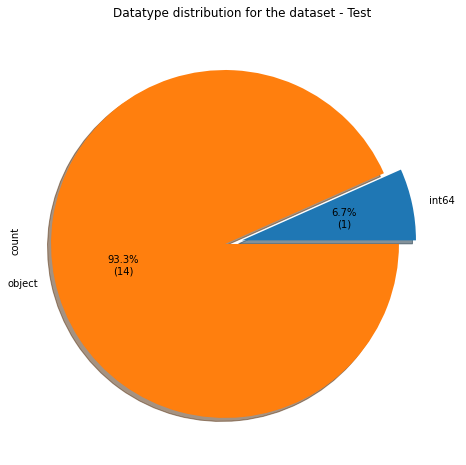

In [22]:
import matplotlib.pyplot as plt

add_attribute(df,"name","Test")
plot_datatype_pie_chart(df)

### <font color = green> <strong> Observations</strong>
> 1. Dataset has 15 columns, out of which 14 are of type OBJECT and one column is of type INT64.
> 2. Once the necessary columns are picked up for the analysis, we shall try converting the columns to appropriate datatype.

## <font color = orange> <strong> <center> <u> DATA EXPLORATION: Definitions for the columns in the dataset </u> </center> </strong> </font>

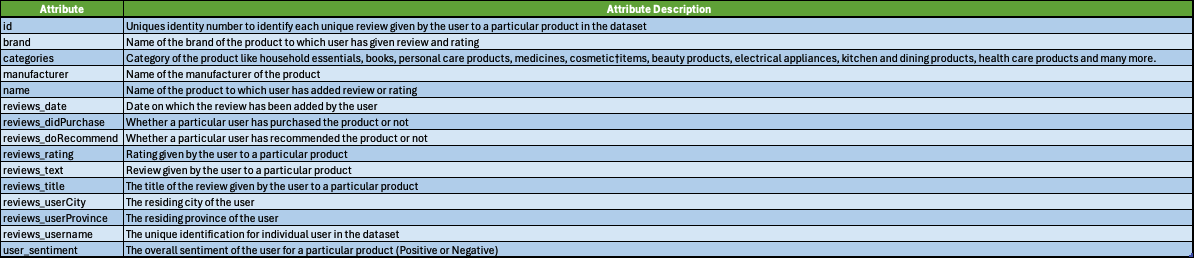

## <font color = orange> <strong> <center> <u> DATA CLEANING: Handling NULL values </u> </center> </strong> </font>

### <font color = green> Analyse NULL values across dataset </font>

In [23]:
styled_null_data = style_null_summary(df)
styled_null_data

,Column Number,Count,Percentage
0,reviews_userProvince,29830,99.433%
1,reviews_userCity,28071,93.570%
2,reviews_didPurchase,14068,46.893%
3,reviews_doRecommend,2570,8.567%
4,reviews_title,190,0.633%
5,manufacturer,141,0.470%
6,reviews_username,63,0.210%
7,reviews_date,46,0.153%
8,user_sentiment,1,0.003%


### <font color = green> <strong> Summary of Data Completeness check for NULL values</strong>
> 1. The columns `reviews_userProvince` (99.43%) and `reviews_userCity` (93.57%) have exceedingly high rates of missing values. Given that nearly all entries lack this information, these columns should be considered for removal from analysis to avoid skewing results.
> 2. The `reviews_didPurchase` column (46.89%) also has a significant amount of missing data, <b>warranting consideration for its relevance in analysis.</b>
> 3. The remaining columns, including `reviews_doRecommend` (8.57%), `reviews_title` (0.63%), `manufacturer` (0.47%), `reviews_username` (0.21%), and `reviews_date` (0.15%), have low percentages of missing values, suggesting they are sufficiently complete for analysis.

### <font color = green> <strong> Recommendation</strong>
> - It is advisable to remove `reviews_userProvince` and `reviews_userCity` from the dataset prior to analysis due to their high missing value percentages, while retaining the other columns for a more reliable analysis.
> - For the `reviews_didPurchase` column, consider imputation methods such as:
>   - **Mean/Median Imputation**: If the column is numeric, replace missing values with the mean or median.
>   - **Mode Imputation**: For categorical data, replace missing values with the most frequent category.
>   - **Predictive Modeling**: Use machine learning models to predict and fill missing values based on other available features.
>   - **Dropping Missing Values**: If imputation isn't suitable, consider dropping rows with missing values if they are not significant for analysis.

In [24]:
cleaned_df = df.copy()
add_attribute(cleaned_df,"name","Test")

### <font color = green> Remove columns with greater than 70% NULL values:  <b>reviews_userProvince</b>  and <b>reviews_userCity</b></font>

In [25]:
columns_to_drop = ['reviews_userProvince', 'reviews_userCity']
cleaned_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [26]:
cleaned_df.shape

(30000, 13)

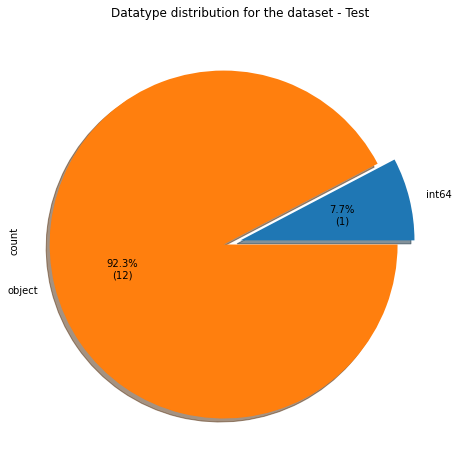

In [27]:
plot_datatype_pie_chart(cleaned_df)

### <font color = green> <strong> Observations</strong>
> 1. Dataset for has 30,000 rows and 13 columns.
> 2. Dataset now has 1 column of datatype INT64 and the rest 12 are of type OBJECT

In [28]:
styled_null_data_aft_removing_70_percent = style_null_summary(cleaned_df)
styled_null_data_aft_removing_70_percent

,Column Number,Count,Percentage
0,reviews_didPurchase,14068,46.893%
1,reviews_doRecommend,2570,8.567%
2,reviews_title,190,0.633%
3,manufacturer,141,0.470%
4,reviews_username,63,0.210%
5,reviews_date,46,0.153%
6,user_sentiment,1,0.003%


### <font color = green> Analysis on relevance of column:  <b>reviews_didPurchase</b></font>

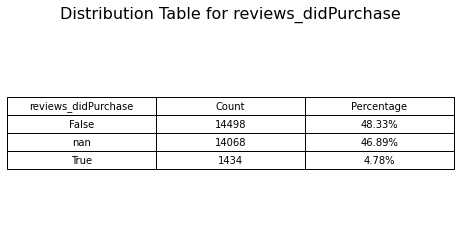

In [29]:
plot_column_distribution_table(cleaned_df,"reviews_didPurchase")

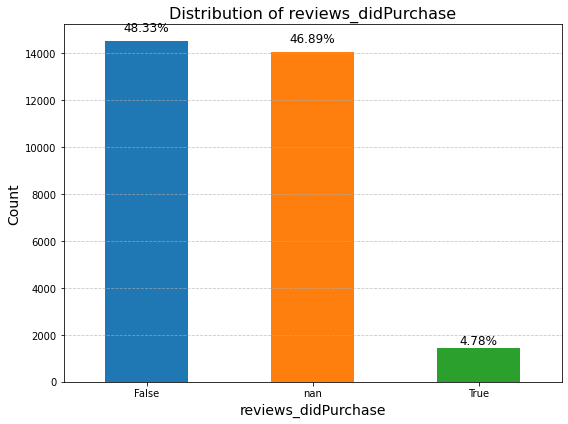

In [30]:
plot_column_distribution_graph(cleaned_df,"reviews_didPurchase")

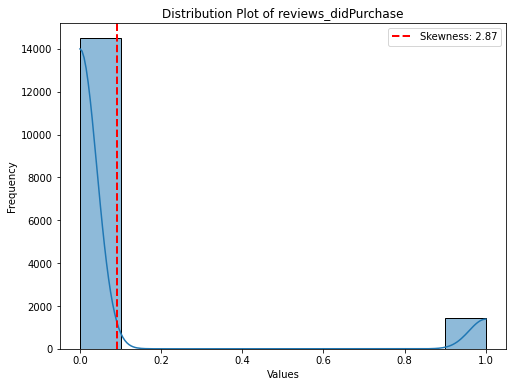

Skewness of 'reviews_didPurchase': 2.87
The column 'reviews_didPurchase' is **positively skewed** (right-skewed).


In [31]:
visualize_skewness(cleaned_df, "reviews_didPurchase")

### <font color = green> <strong> Observations</strong>
> 1. Column "reviews_didPurchase" has 46% NULL values
> 2. Only 4% of the users who actually purchased the product dropped a review - i.e., Genenuine reviews are only 4%.
> 2. The data for "reviews_didPurchase" is negatively skewed
> 3. Due to skewness, removal of this column makes better sense than imputing. Also, imputing based the column which describes if the user purchased the product or not might lead to wrong results going forward.

### <font color = green> Remove column: <b>reviews_didPurchase</b></font>

In [32]:
columns_to_drop = ['reviews_didPurchase']
cleaned_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [33]:
styled_null_data_aft_removing_reviews_didPurchase = style_null_summary(cleaned_df)
styled_null_data_aft_removing_reviews_didPurchase

,Column Number,Count,Percentage
0,reviews_doRecommend,2570,8.567%
1,reviews_title,190,0.633%
2,manufacturer,141,0.470%
3,reviews_username,63,0.210%
4,reviews_date,46,0.153%
5,user_sentiment,1,0.003%


### <font color = green> Analysis on relevance of column:  <b>reviews_doRecommend</b></font>

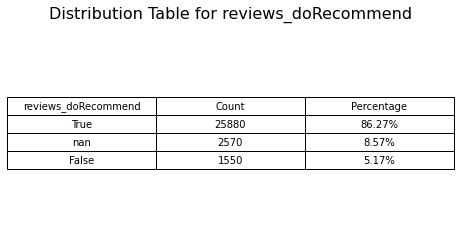

In [34]:
plot_column_distribution_table(cleaned_df,"reviews_doRecommend")

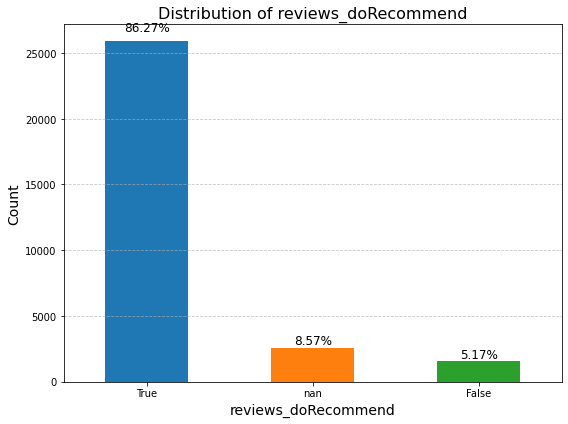

In [35]:
plot_column_distribution_graph(cleaned_df,"reviews_doRecommend")

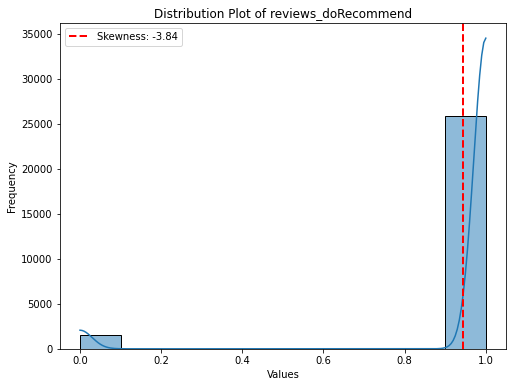

Skewness of 'reviews_doRecommend': -3.84
The column 'reviews_doRecommend' is **negatively skewed** (left-skewed).


In [36]:
visualize_skewness(cleaned_df, "reviews_doRecommend")

### <font color = green> <strong> Observations</strong>
> 1. Column "reviews_doRecommend" has 8.5% NULL values
> 2. The data for "reviews_didPurchase" is negatively skewed
> 3. Due to skewness, removal of this column makes better sense than imputing. Also, imputing the column which describes if the user purchased the product or not might lead to wrong results going forward.
> 4. The column signifies if the user recommends the said product or not, for this decision we can depend on the "user_sentiment" column.

### <font color = green> Remove column:  <b>reviews_doRecommend</b></font>

In [37]:
columns_to_drop = ['reviews_doRecommend']
cleaned_df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

In [38]:
styled_null_data_aft_removing_reviews_doRecommend = style_null_summary(cleaned_df)
styled_null_data_aft_removing_reviews_doRecommend

,Column Number,Count,Percentage
0,reviews_title,190,0.633%
1,manufacturer,141,0.470%
2,reviews_username,63,0.210%
3,reviews_date,46,0.153%
4,user_sentiment,1,0.003%


### <font color = green> Analysis on relevance of column:  <b>reviews_title</b></font>

### <font color = green> <strong> Observations</strong>
> 1. Column "reviews_title" has 0.6% NULL values
> 2. The NULL value percentage is low and also imputing a column wherein the value is randomly provided by the user makes no practical sense.

### <font color = green> <strong> Recommendations</strong>
> Drop the column "reviews_title" from the analysis

### <font color = green> Remove column:  <b>reviews_title</b></font>

In [39]:
cleaned_df = cleaned_df[~ cleaned_df.reviews_title.isna() ]

In [40]:
styled_null_data_aft_removing_reviews_title = style_null_summary(cleaned_df)
styled_null_data_aft_removing_reviews_title

,Column Number,Count,Percentage
0,manufacturer,141,0.473%
1,reviews_username,62,0.208%
2,reviews_date,46,0.154%
3,user_sentiment,1,0.003%


### <font color = green> Analysis on relevance of column:  <b>reviews_username</b></font>

### <font color = green> <strong> Observations</strong>
> 1. Column "reviews_username" has 0.2% NULL values.
> 2. The NULL value percentage is low.

### <font color = green> <strong> Recommendations</strong>
> Drop the column "reviews_username" from the analysis

### <font color = green> Remove column:  <b>reviews_username</b></font>

In [41]:
cleaned_df = cleaned_df[~ cleaned_df.reviews_username.isna() ]

In [42]:
styled_null_data_aft_removing_reviews_username = style_null_summary(cleaned_df)
styled_null_data_aft_removing_reviews_username

,Column Number,Count,Percentage
0,manufacturer,141,0.474%
1,reviews_date,40,0.134%
2,user_sentiment,1,0.003%


### <font color = green> Analysis on relevance of column:  <b>user_sentiment</b></font>

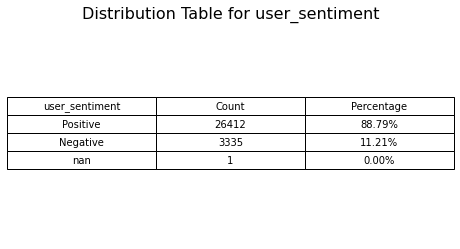

In [43]:
plot_column_distribution_table(cleaned_df,"user_sentiment")

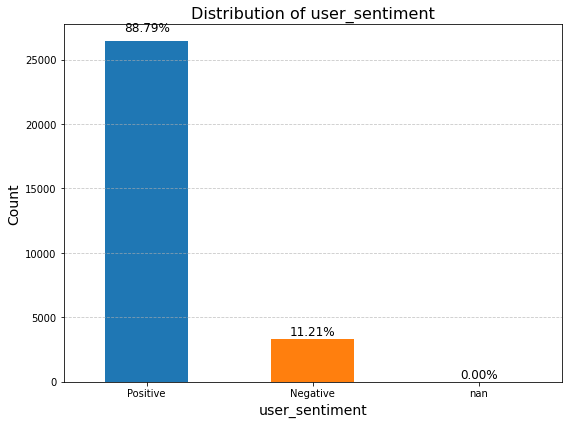

In [44]:
plot_column_distribution_graph(cleaned_df,"user_sentiment")

### <font color = green> <strong> Observations</strong>
> 1. Column "user_sentiment" has only one NULL value
> 2. From the analysis, the overall value for "user_sentiment" is positive.

### <font color = green> <strong> Recommendations</strong>
> Update the single column value from "NaN" to "positive".

### <font color = green> Update column:  <b>user_sentiment</b></font>

In [45]:
cleaned_df.user_sentiment.fillna('Positive', inplace=True)

In [46]:
styled_null_data_aft_updating_user_sentiment = style_null_summary(cleaned_df)
styled_null_data_aft_updating_user_sentiment

,Column Number,Count,Percentage
0,manufacturer,141,0.474%
1,reviews_date,40,0.134%


In [47]:
cleaned_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


In [48]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29748 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29748 non-null  object
 1   brand             29748 non-null  object
 2   categories        29748 non-null  object
 3   manufacturer      29607 non-null  object
 4   name              29748 non-null  object
 5   reviews_date      29708 non-null  object
 6   reviews_rating    29748 non-null  int64 
 7   reviews_text      29748 non-null  object
 8   reviews_title     29748 non-null  object
 9   reviews_username  29748 non-null  object
 10  user_sentiment    29748 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB


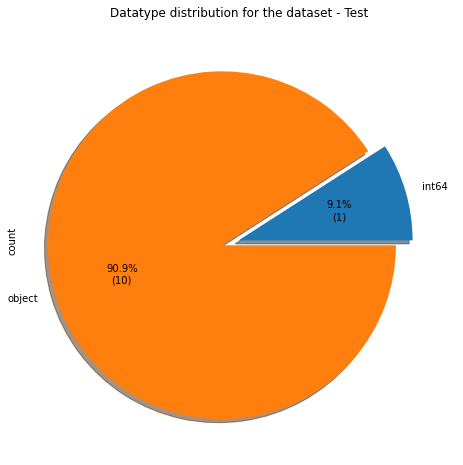

In [49]:
plot_datatype_pie_chart(cleaned_df)

## <font color = orange> <strong> <center> <u> DATA CLEANING: Type Conversion </u> </center> </strong> </font>

### <font color = green> Analyse and assign appropriate data-type to columns </font>

In [50]:
cleaned_df["id"] = cleaned_df["id"].astype(str)
cleaned_df["brand"] = cleaned_df["brand"].astype(str)
cleaned_df["categories"] = cleaned_df["categories"].astype(str)
cleaned_df["manufacturer"] = cleaned_df["manufacturer"].astype(str)
cleaned_df["name"] = cleaned_df["name"].astype(str)
cleaned_df['reviews_date'] = pd.to_datetime(cleaned_df['reviews_date'], errors='coerce')
cleaned_df["reviews_text"] = cleaned_df["reviews_text"].astype(str)
cleaned_df["reviews_title"] = cleaned_df["reviews_title"].astype(str)
cleaned_df["reviews_username"] = cleaned_df["reviews_username"].astype(str)
cleaned_df["user_sentiment"] = cleaned_df["user_sentiment"].astype('category')

In [51]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29748 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id                29748 non-null  object             
 1   brand             29748 non-null  object             
 2   categories        29748 non-null  object             
 3   manufacturer      29748 non-null  object             
 4   name              29748 non-null  object             
 5   reviews_date      29700 non-null  datetime64[ns, UTC]
 6   reviews_rating    29748 non-null  int64              
 7   reviews_text      29748 non-null  object             
 8   reviews_title     29748 non-null  object             
 9   reviews_username  29748 non-null  object             
 10  user_sentiment    29748 non-null  category           
dtypes: category(1), datetime64[ns, UTC](1), int64(1), object(8)
memory usage: 2.5+ MB


In [52]:
unique_value_counts(cleaned_df)

,Column,Unique Count
0,id,252
1,brand,199
2,categories,252
3,manufacturer,214
4,name,252
5,reviews_date,6309
6,reviews_rating,5
7,reviews_text,27042
8,reviews_title,18490
9,reviews_username,24788


## <font color = orange> <strong> <center> <u> DATA EXPLORATION: Exploratory Data Analysis </u> </center> </strong> </font>

In [53]:
display_first_last_unique(cleaned_df,["id", "brand", "manufacturer", "reviews_username"])

,Count,Percentage (%)
AVpf3VOfilAPnD_xjpun,8524,28.65%
AVpfPaoqLJeJML435Xk9,3324,11.17%
AVpfJP1C1cnluZ0-e3Xy,2039,6.85%
AVpfW8y_LJeJML437ySW,1186,3.99%
AVpfRTh1ilAPnD_xYic2,1140,3.83%
AVpf63aJLJeJML43F__Q,873,2.93%
AVpf0eb2LJeJML43EVSt,845,2.84%
AVpe41TqilAPnD_xQH3d,757,2.54%
AVpfm8yiLJeJML43AYyu,691,2.32%
AVpf2tw1ilAPnD_xjflC,672,2.26%


,Count,Percentage (%)
Clorox,10564,35.51%
Warner Home Video,3324,11.17%
Disney,1197,4.02%
L'oreal Paris,1186,3.99%
FOX,887,2.98%
Burt's Bees,881,2.96%
Sony Pictures,845,2.84%
Summit Entertainment,813,2.73%
Nexxus,691,2.32%
Universal Home Video,668,2.25%


,Count,Percentage (%)
Clorox,8525,28.66%
Test,3324,11.17%
AmazonUs/CLOO7,2039,6.85%
L'oreal Paris,1232,4.14%
Walt Disney,1140,3.83%
Burt's Bees,873,2.93%
SONY CORP,845,2.84%
Twentieth Century Fox,757,2.54%
P&G,730,2.45%
Nexxus Beauty Products,691,2.32%


,Count,Percentage (%)
mike,41,0.14%
byamazon customer,41,0.14%
chris,31,0.10%
rick,15,0.05%
sandy,15,0.05%
dave,14,0.05%
john,14,0.05%
tony,14,0.05%
jojo,13,0.04%
james,13,0.04%


In [54]:
cleaned_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


### <span style='color:blue;'>First 5 rows of the data:</span>

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative


### <span style='color:green;'>Summary statistics for numeric columns:</span>

,reviews_rating
count,29748.00
mean,4.48
std,0.99
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


### <span style='color:orange;'>Missing values in each numeric column:</span>

reviews_rating    0
dtype: int64

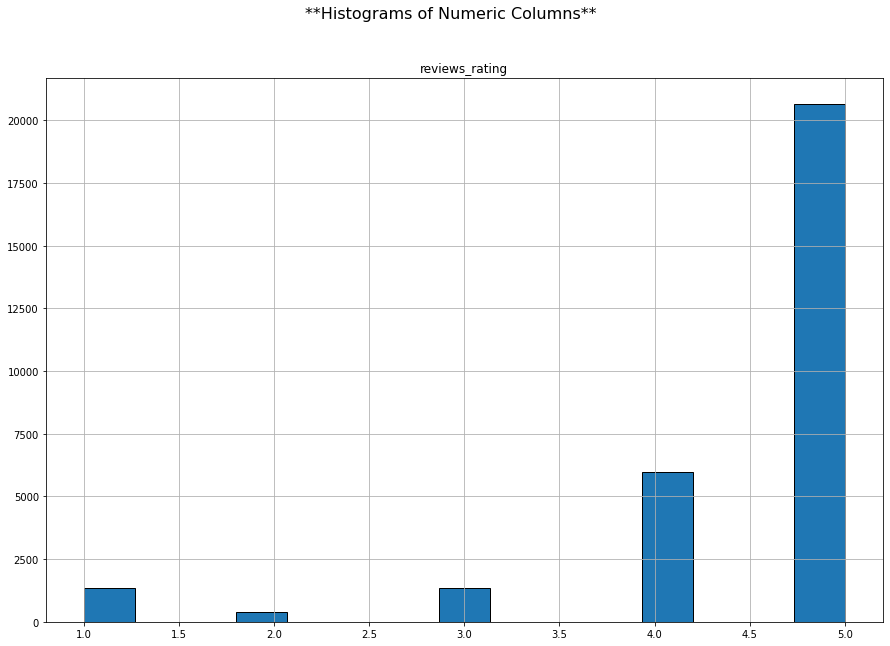

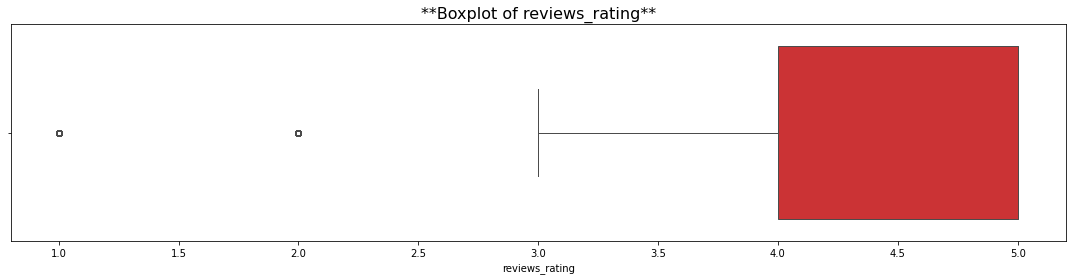

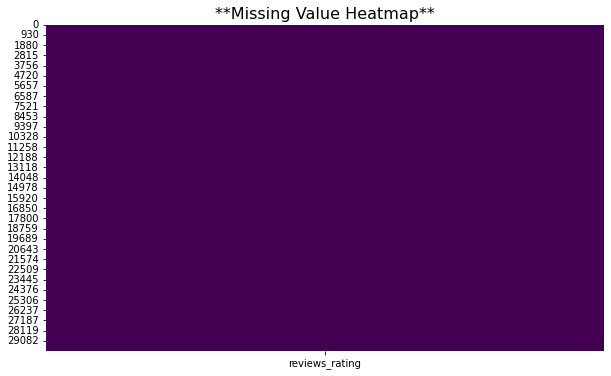

In [55]:
exploratory_data_analysis(cleaned_df)

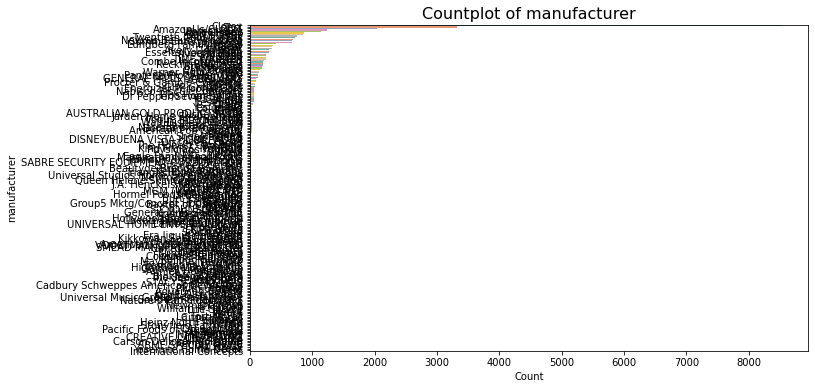

### Value counts for 'manufacturer':

Clorox                    8525
Test                      3324
AmazonUs/CLOO7            2039
L'oreal Paris             1232
Walt Disney               1140
                          ... 
SBME SPECIAL MKTS.           1
Scotty                       1
Mill Creek                   1
Yosemite Home Decor          1
International Concepts       1
Name: manufacturer, Length: 214, dtype: int64

In [56]:
visualize_non_numeric_column(cleaned_df, "manufacturer")

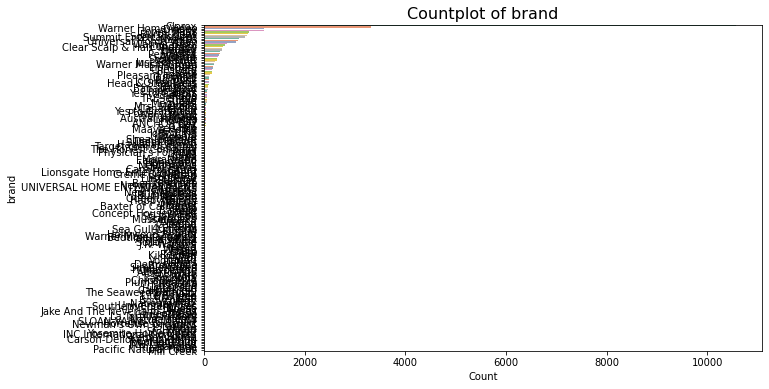

### Value counts for 'brand':

Clorox                   10564
Warner Home Video         3324
Disney                    1197
L'oreal Paris             1186
FOX                        887
                         ...  
JNH Lifestyles               1
Teamson                      1
Rizzy Home                   1
Pacific Natural Foods        1
Mill Creek                   1
Name: brand, Length: 199, dtype: int64

In [57]:
visualize_non_numeric_column(cleaned_df, "brand")

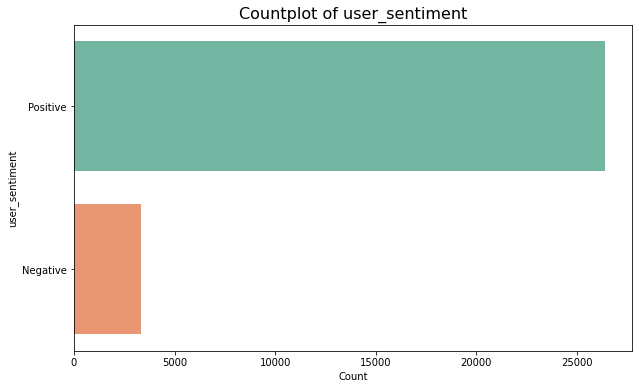

### Value counts for 'user_sentiment':

Positive    26413
Negative     3335
Name: user_sentiment, dtype: int64

In [58]:
visualize_non_numeric_column(cleaned_df, "user_sentiment")

### <font color = green> Data Distribution:  <b>reviews_rating</b></font>

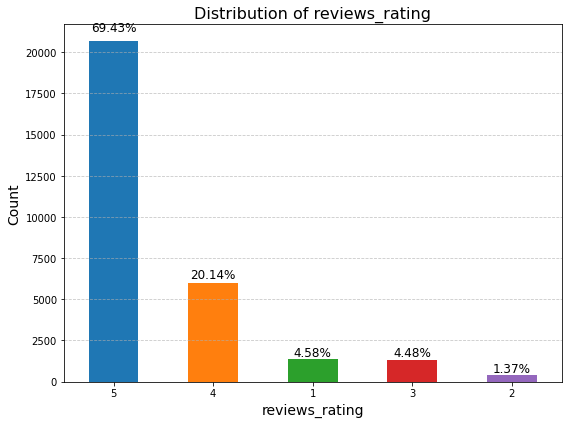

In [59]:
plot_column_distribution_graph(cleaned_df, "reviews_rating")

### <font color = green> <strong> Observations</strong>
> 1. Column "reviews_rating" has majority reviews with rating 5.

### <font color = green> Data Distribution:  <b>Top 5 brands with positive reviews</b></font>

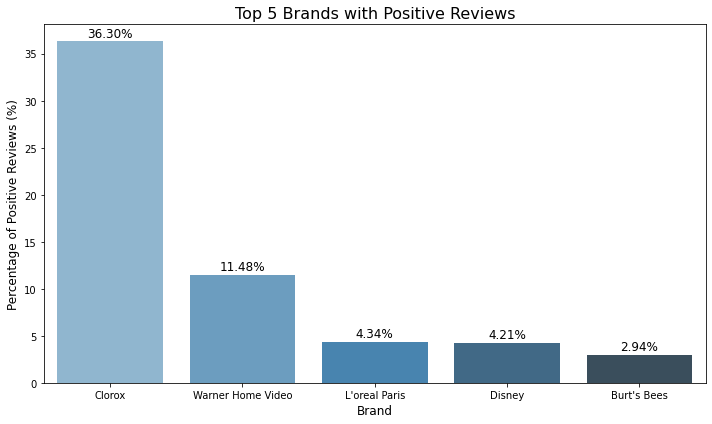

In [60]:
positive_brands = cleaned_df[cleaned_df["user_sentiment"] == 'Positive']["brand"]
top_brands = positive_brands.value_counts(normalize=True, ascending=False).head(5) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="Blues_d")

# Add title and labels
plt.title(f"Top 5 Brands with Positive Reviews", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Percentage of Positive Reviews (%)", fontsize=12)

# Display percentage values on top of each bar
for i, value in enumerate(top_brands.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

### <font color = green> <strong> Observations</strong>
> 1. With 36.30% positive reviews, brand "Clorox" has the most positive reviews in the dataset.

### <font color = green> Data Distribution:  <b>Top 5 brands with negative reviews</b></font>

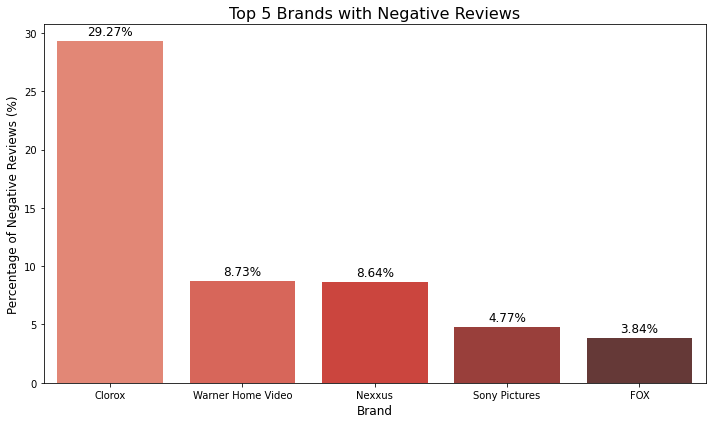

In [61]:
# Filter negative sentiment brands
negative_brands = cleaned_df[cleaned_df["user_sentiment"] == 'Negative']["brand"]
top_brands = negative_brands.value_counts(normalize=True, ascending=False).head(5) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.index, y=top_brands.values, palette="Reds_d")

# Add title and labels
plt.title(f"Top 5 Brands with Negative Reviews", fontsize=16)
plt.xlabel("Brand", fontsize=12)
plt.ylabel("Percentage of Negative Reviews (%)", fontsize=12)

# Display percentage values on top of each bar
for i, value in enumerate(top_brands.values):
    plt.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

### <font color = green> <strong> Observations</strong>
> 1. With 29.27% negative reviews, brand "Clorox" has the most negative reviews in the dataset.

### <font color = green> <strong> Observations</strong>
#### "Clorox" is the brand with the highest positive as well as negative reviews because the dataset has 35.51% of the data coming from the brand "Clorox"

### <font color = green> Data Distribution:  <b>Review count linked to Review Year</b></font>

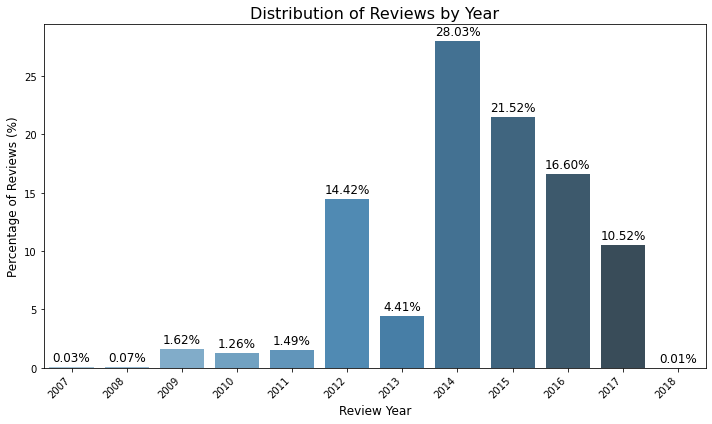

In [62]:
# Group the date column by the specified frequency (e.g., by year)
date_counts = cleaned_df["reviews_date"].dt.to_period("Y").value_counts().sort_index()

# Calculate the percentage of each count
total_reviews = date_counts.sum()
percentage_counts = (date_counts / total_reviews) * 100

# Plot the date distribution
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=date_counts.index.astype(str), y=percentage_counts.values, palette="Blues_d")

# Add plot title and labels
plt.title(f"Distribution of Reviews by Year", fontsize=16)
plt.xlabel(f"Review Year", fontsize=12)
plt.ylabel("Percentage of Reviews (%)", fontsize=12)

# Display percentage values on top of each bar
for i, value in enumerate(percentage_counts.values):
    bar_plot.text(i, value + 0.5, f'{value:.2f}%', ha='center', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Improve layout and display the plot
plt.tight_layout()
plt.show()


### <font color = green> <strong> Observations</strong>
> 1. Within the dataset, most of the reviews were provided in the year 2014 - 28.03% of the total count.

### <font color = green> Data Distribution:  <b>Review count linked to User Sentiment</b></font>

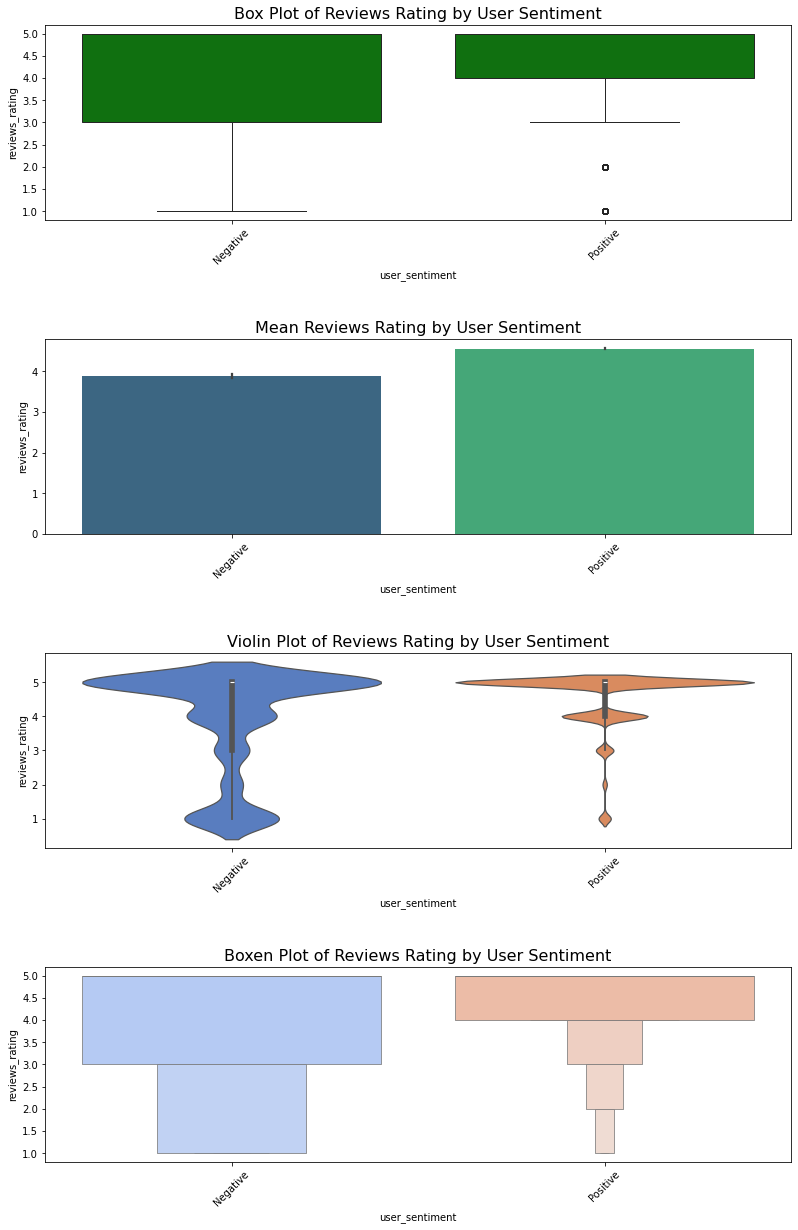

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the figure size and layout
plt.figure(figsize=(12, 18))

# Box Plot
plt.subplot(4, 1, 1)
sns.boxplot(data=cleaned_df, x='user_sentiment', y='reviews_rating', color='green')
plt.title('Box Plot of Reviews Rating by User Sentiment', fontsize=16)
plt.xticks(rotation=45)

# Bar Plot
plt.subplot(4, 1, 2)
sns.barplot(data=cleaned_df, x='user_sentiment', y='reviews_rating', estimator=np.mean, palette='viridis')
plt.title('Mean Reviews Rating by User Sentiment', fontsize=16)
plt.xticks(rotation=45)

# Violin Plot
plt.subplot(4, 1, 3)
sns.violinplot(data=cleaned_df, x='user_sentiment', y='reviews_rating', palette='muted')
plt.title('Violin Plot of Reviews Rating by User Sentiment', fontsize=16)
plt.xticks(rotation=45)

# Boxen Plot
plt.subplot(4, 1, 4)
sns.boxenplot(data=cleaned_df, x='user_sentiment', y='reviews_rating', palette='coolwarm')
plt.title('Boxen Plot of Reviews Rating by User Sentiment', fontsize=16)
plt.xticks(rotation=45)

# Adjust layout and display the plots
plt.tight_layout(pad=4)
plt.show()


### <font color = green> <strong> Observations</strong>
> 1. Reviews v/s User-Sentiment plot leads to observation where in even if the user sentiment is negative there are positive reviews and vice-versa. This is indeed a contradicting detail.

### <font color = green> Data Distribution:  <b>User-Sentiment v/s Review-Rating for Positive sentiment</b></font>

,reviews_rating,count
0,1,776
1,2,272
2,Total,1048


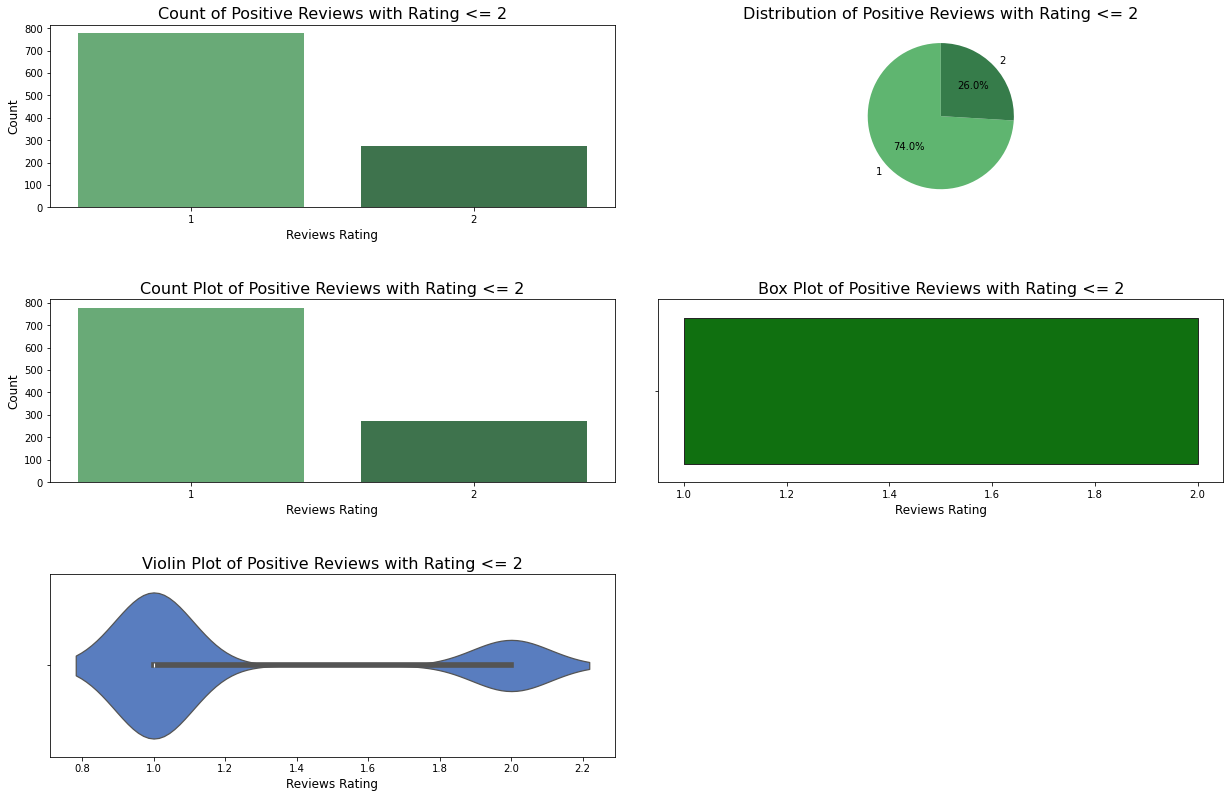

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Import display function

# Filter data for positive reviews with a rating of 2 or lower
positive_low_rating = cleaned_df[
    (cleaned_df['user_sentiment'] == 'Positive') & (cleaned_df['reviews_rating'] <= 2)
]

# Group by reviews_rating and count occurrences
count_by_rating = positive_low_rating.groupby('reviews_rating').size().reset_index(name='count')

# Calculate the total count
total_count = count_by_rating['count'].sum()

# Append the total row to the DataFrame
total_row = pd.DataFrame({'reviews_rating': ['Total'], 'count': [total_count]})
count_by_rating = pd.concat([count_by_rating, total_row], ignore_index=True)

# Create a list of colors for each row
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightyellow', 'lightpink', 'lightgray']  # Add more colors as needed

# Create a function to apply row colors
def row_color(row):
    if row['reviews_rating'] == 'Total':  # Different color for total row
        return ['background-color: gold' for _ in row]  # Color for total row
    else:
        color = colors[row.name % len(colors)]  # Cycle through the colors
        return [f'background-color: {color}' for _ in row]

# Create a colorful table with different row colors
styled_table = count_by_rating.style.set_table_attributes('style="font-size: 14px;"') \
    .apply(row_color, axis=1)

# Display the colorful table
display(styled_table)  # Use display to show the table

# Set up the figure for multiple subplots
plt.figure(figsize=(18, 12))

# Bar Plot
plt.subplot(3, 2, 1)
sns.barplot(data=count_by_rating[:-1], x='reviews_rating', y='count', palette='Greens_d')  # Exclude total row from plots
plt.title('Count of Positive Reviews with Rating <= 2', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Pie Chart
plt.subplot(3, 2, 2)
plt.pie(count_by_rating[:-1]['count'], labels=count_by_rating[:-1]['reviews_rating'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Greens_d", len(count_by_rating) - 1))  # Exclude total row from pie chart
plt.title('Distribution of Positive Reviews with Rating <= 2', fontsize=16)

# Count Plot
plt.subplot(3, 2, 3)
sns.countplot(data=positive_low_rating, x='reviews_rating', palette='Greens_d')
plt.title('Count Plot of Positive Reviews with Rating <= 2', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Box Plot
plt.subplot(3, 2, 4)
sns.boxplot(data=positive_low_rating, x='reviews_rating', color='green')
plt.title('Box Plot of Positive Reviews with Rating <= 2', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)

# Violin Plot
plt.subplot(3, 2, 5)
sns.violinplot(data=positive_low_rating, x='reviews_rating', palette='muted')
plt.title('Violin Plot of Positive Reviews with Rating <= 2', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout(pad=4)
plt.show()


### <font color = green> Data Distribution:  <b>User-Sentiment v/s Review-Rating for Negative sentiment</b></font>

,reviews_rating,count
0,4,548
1,5,1848
2,Total,2396


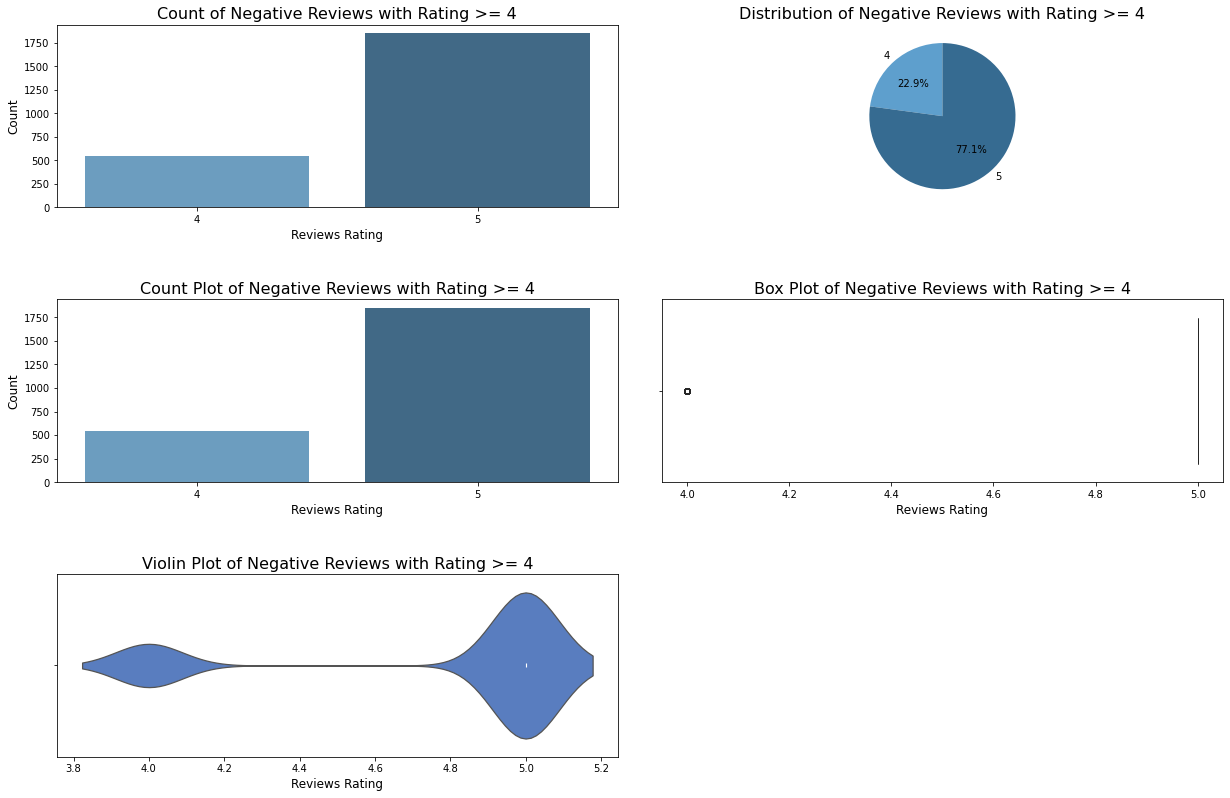

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display  # Import display function

# Filter data for negative reviews with a rating of 4 or higher
negative_high_rating = cleaned_df[
    (cleaned_df['user_sentiment'] == 'Negative') & (cleaned_df['reviews_rating'] >= 4)
]

# Group by reviews_rating and count occurrences
count_by_rating = negative_high_rating.groupby('reviews_rating').size().reset_index(name='count')

# Calculate the total count
total_count = count_by_rating['count'].sum()

# Append the total row to the DataFrame
total_row = pd.DataFrame({'reviews_rating': ['Total'], 'count': [total_count]})
count_by_rating = pd.concat([count_by_rating, total_row], ignore_index=True)

# Create a list of colors for each row
colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightgray']  # Add more colors as needed

# Create a function to apply row colors
def row_color(row):
    if row['reviews_rating'] == 'Total':  # Different color for total row
        return ['background-color: gold' for _ in row]  # Color for total row
    else:
        color = colors[row.name % len(colors)]  # Cycle through the colors
        return [f'background-color: {color}' for _ in row]

# Create a colorful table with different row colors
styled_table = count_by_rating.style.set_table_attributes('style="font-size: 14px;"') \
    .apply(row_color, axis=1)

# Display the colorful table
display(styled_table)  # Use display to show the table

# Set up the figure for multiple subplots
plt.figure(figsize=(18, 12))

# Bar Plot
plt.subplot(3, 2, 1)
sns.barplot(data=count_by_rating[:-1], x='reviews_rating', y='count', palette='Blues_d')  # Exclude total row from plots
plt.title('Count of Negative Reviews with Rating >= 4', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Pie Chart
plt.subplot(3, 2, 2)
plt.pie(count_by_rating[:-1]['count'], labels=count_by_rating[:-1]['reviews_rating'], autopct='%1.1f%%', startangle=90,
        colors=sns.color_palette("Blues_d", len(count_by_rating) - 1))  # Exclude total row from pie chart
plt.title('Distribution of Negative Reviews with Rating >= 4', fontsize=16)

# Count Plot
plt.subplot(3, 2, 3)
sns.countplot(data=negative_high_rating, x='reviews_rating', palette='Blues_d')
plt.title('Count Plot of Negative Reviews with Rating >= 4', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Box Plot
plt.subplot(3, 2, 4)
sns.boxplot(data=negative_high_rating, x='reviews_rating', color='green')
plt.title('Box Plot of Negative Reviews with Rating >= 4', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)

# Violin Plot
plt.subplot(3, 2, 5)
sns.violinplot(data=negative_high_rating, x='reviews_rating', palette='muted')
plt.title('Violin Plot of Negative Reviews with Rating >= 4', fontsize=16)
plt.xlabel('Reviews Rating', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout(pad=4)
plt.show()


### <font color = green> <strong> Observations</strong>
### 🌈 **Revelations on Review Ratings vs. Sentiments** 🌈

- **🔍 Curious Contradictions**: 
  - It's quite the conundrum that certain brands are drenched in **Negative sentiments** while still basking in the glow of **high review ratings** (4 or 5 stars). 
  - A staggering **2,396 records** illuminate this puzzling paradox!

- **💭 Theories to Ponder**: 
  - This head-scratching disparity may signal a **data anomaly**, a quirky blip in the matrix of our insights. 
  - Alternatively, it could be a case of **temporal turbulence**, where a **time lag** exists between the moment a rating is awarded and when user sentiments are unveiled, often after the product has had its time in the limelight.

- **🛤️ Charting Our Course**: 
  - For the sake of this particular business puzzle, we shall deem this analysis as **out of scope** and sail onward into the seas of pre-processing!



## <font color = orange> <strong> <center> <u> FEATURE ENGINEERING: Form new fields from the existing data </u> </center> </strong> </font>

In [66]:
df_before_feature_eng = cleaned_df.copy()

In [67]:
df_after_feature_eng = cleaned_df.copy()

### <font color = green> New REVIEW column: Combine reviews-title and reviews-text columns to form a single column</b></font>

In [68]:
df_after_feature_eng['reviews'] = df_after_feature_eng[["reviews_title", "reviews_text"]].agg(lambda x: ' | '.join(x), axis=1)

In [69]:
df_after_feature_eng.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Just Awesome,joshua,Positive,Just Awesome | i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor. This review was collected as part of a promotion.,Good,dorothy w,Positive,Good | Good flavor. This review was collected as part of a promotion.
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,Good flavor.,Good,dorothy w,Positive,Good | Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,"I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensation. What we did ...",Disappointed,rebecca,Negative,"Disappointed | I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Irritation,walker557,Negative,Irritation | My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


### <font color = green> Delete columns: Delete "reviews_title" and "reviews_text" columns </b></font>

In [70]:
df_after_feature_eng = df_after_feature_eng.drop(columns=['reviews_title', 'reviews_text'])

In [71]:
df_after_feature_eng.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Movie Bundles & Collections,CDs & Vinyl,Rap & Hip-Hop,Bass,Music on CD or Vinyl,Rap,Hip-Hop,Mainstream Rap,Pop Rap",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30 06:21:45+00:00,5,joshua,Positive,Just Awesome | i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,dorothy w,Positive,Good | Good flavor. This review was collected as part of a promotion.
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Cookies & Chips,Rice Cakes,Cakes",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09 00:00:00+00:00,5,dorothy w,Positive,Good | Good flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06 00:00:00+00:00,1,rebecca,Negative,"Disappointed | I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio..."
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Spermicide,Health,Sexual Wellness,Lubricants",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21 00:00:00+00:00,1,walker557,Negative,Irritation | My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.


## <font color = orange> <strong> <center> <u> PRE-PROCESSING: Dataframe for sentiment analysis </u> </center> </strong> </font>

### <font color = green> Make dataframe copies: Before and After pre-processing stage </b></font>

In [72]:
df_before_pre_process = df_after_feature_eng.copy()
df_after_pre_process = df_after_feature_eng.copy()

### <font color = green> Clean-Up: Retain only columsn necessary for sentiment analysis </b></font>

Considering only the below columns:
    * "id",
    * "name"
    * "reviews_combined" and
    * "user_sentiment"

In [73]:
df_after_pre_process = df_after_pre_process[['id','name','reviews', 'user_sentiment']]

In [74]:
df_after_pre_process.shape

(29748, 4)

In [75]:
df_after_pre_process.head()

,id,name,reviews,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome | i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor. This review was collected as part of a promotion.,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor.,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed | I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio...",Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation | My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative


### <font color = green> Data Handling: Remove Puntuations </b></font>

In [76]:
df_after_pre_process["reviews_cleaned"] = df_after_pre_process["reviews"].apply(clean_punctuation)

In [77]:
df_after_pre_process.head()

,id,name,reviews,user_sentiment,reviews_cleaned
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome | i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor. This review was collected as part of a promotion.,Positive,good good flavor this review was collected as part of a promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor.,Positive,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed | I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio...",Negative,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what ...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation | My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel


### <font color = green> Data Handling: Remove Stopwords </b></font>

In [78]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
print(stopwords_set)

{'you', 'having', 'does', 'should', 'same', 'on', 'or', 'needn', 'had', 'a', 'there', 'to', 'why', "don't", 'yourself', "should've", 'who', 'hasn', 'our', 'those', 'y', 'herself', 'do', "it's", 'that', 'during', 'how', 'if', 'until', 'these', "won't", 'be', 'weren', 'hadn', 'more', 'isn', 'up', 'below', 'are', "hadn't", 'but', 'we', "that'll", 'any', 'for', 'when', 'against', 'both', 'my', 'its', 'because', 'm', 'with', 'won', 'over', "shouldn't", 'and', 'ain', "hasn't", 'am', 'by', 'she', "weren't", 'hers', 'doing', 'than', 'some', 'ourselves', 'before', 'were', 'they', "she's", 'further', 'few', 'him', 'after', 'yourselves', "mustn't", "you'll", 'i', 'himself', "needn't", 'too', "you'd", 'which', 'o', 'shan', "didn't", 'being', 'been', 've', 'wasn', 'out', 'ours', 'haven', 'all', "doesn't", 'll', 'theirs', 'what', 'an', 'of', 'ma', "shan't", 'is', 'very', "aren't", 'was', 'this', "wouldn't", 'couldn', 'me', 'd', 'about', 'her', 'their', 'most', 'such', 'where', 'doesn', "you've", 'so

In [79]:
df_after_pre_process['reviews_stopwords'] = df_after_pre_process['reviews_cleaned'].apply(clean_stopwords)

In [80]:
df_after_pre_process.head()

,id,name,reviews,user_sentiment,reviews_cleaned,reviews_stopwords
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome | i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor. This review was collected as part of a promotion.,Positive,good good flavor this review was collected as part of a promotion,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor.,Positive,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed | I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio...",Negative,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what ...,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation | My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel


### <font color = green> Data Handling: Perform Lemmatization </b></font>

In [81]:
from tqdm import tqdm

# Enable tqdm for pandas apply
tqdm.pandas()

# Apply the clean_lemma function with a progress bar
df_after_pre_process["reviews_lemmatized"] = df_after_pre_process["reviews_stopwords"].progress_apply(clean_lemma)

100%|██████████| 29748/29748 [04:59<00:00, 99.25it/s] 


In [82]:
df_after_pre_process.head()

,id,name,reviews,user_sentiment,reviews_cleaned,reviews_stopwords,reviews_lemmatized
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Just Awesome | i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy.,Positive,just awesome i love this album its very good more to the hip hop side than her current pop sound so hype i listen to this everyday at the gym i give it 5star rating all the way her metaphors are just crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphors crazy,awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor. This review was collected as part of a promotion.,Positive,good good flavor this review was collected as part of a promotion,good good flavor review collected part promotion,good good flavor review collect part promotion
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Good | Good flavor.,Positive,good good flavor,good good flavor,good good flavor
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,"Disappointed | I read through the reviews on here before looking in to buying one of the couples lubricants, and was ultimately disappointed that it didn't even live up to the reviews I had read. For starters, neither my boyfriend nor I could notice any sort of enhanced or 'captivating' sensatio...",Negative,disappointed i read through the reviews on here before looking in to buying one of the couples lubricants and was ultimately disappointed that it didnt even live up to the reviews i had read for starters neither my boyfriend nor i could notice any sort of enhanced or captivating sensation what ...,disappointed read reviews looking buying one couples lubricants ultimately disappointed didnt even live reviews read starters neither boyfriend could notice sort enhanced captivating sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since...,disappointed read review look buy one couple lubricant ultimately disappointed do not even live review read starter neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captiva...
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,Irritation | My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.,Negative,irritation my husband bought this gel for us the gel caused irritation and it felt like it was burning my skin i wouldnt recommend this gel,irritation husband bought gel us gel caused irritation felt like burning skin wouldnt recommend gel,irritation husband buy gel -PRON- gel cause irritation feel like burn skin would not recommend gel


### <font color = green> Data Handling: Retain only necessary columns after lemmatization </b></font>

In [83]:
df_after_pre_process = df_after_pre_process[["id", "name", "reviews_lemmatized", "user_sentiment"]]

In [84]:
df_after_pre_process.head()

,id,name,reviews_lemmatized,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good good flavor review collect part promotion,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good good flavor,Positive
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,disappointed read review look buy one couple lubricant ultimately disappointed do not even live review read starter neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captiva...,Negative
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,irritation husband buy gel -PRON- gel cause irritation feel like burn skin would not recommend gel,Negative


In [85]:
df_after_pre_process.shape

(29748, 4)

In [86]:
df_after_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29748 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  29748 non-null  object  
 1   name                29748 non-null  object  
 2   reviews_lemmatized  29748 non-null  object  
 3   user_sentiment      29748 non-null  category
dtypes: category(1), object(3)
memory usage: 1.9+ MB


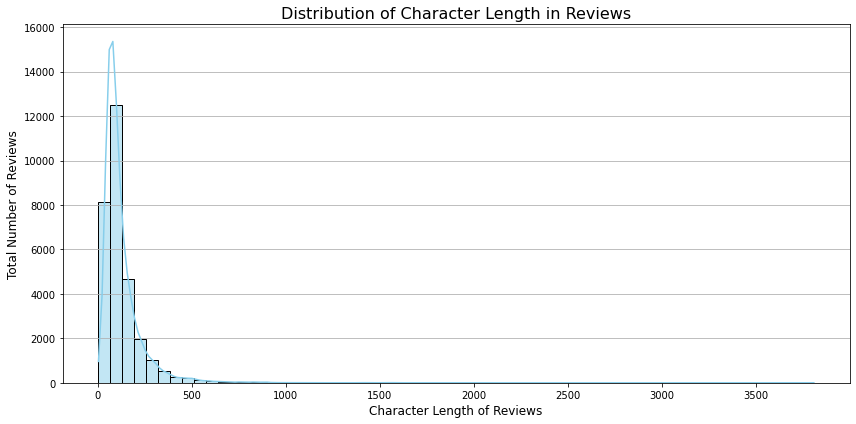

In [87]:
# Visualizing character length of 'reviews_lemmatized'
character_length = df_after_pre_process['reviews_lemmatized'].str.len()

# Create a histogram using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(character_length, bins=60, kde=True, color='skyblue')

# Add labels and title
plt.xlabel("Character Length of Reviews", fontsize=12)
plt.ylabel("Total Number of Reviews", fontsize=12)
plt.title("Distribution of Character Length in Reviews", fontsize=16)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

The distribution is a bit skewed to the right but it is a normal distribution.

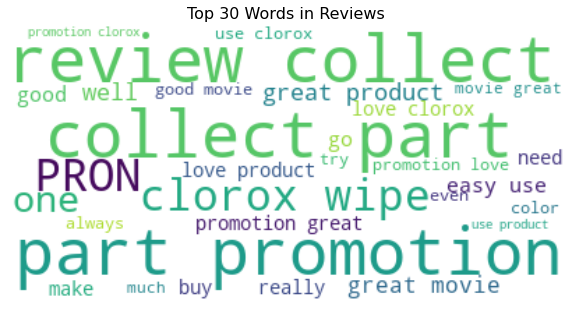

In [88]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = ' '.join(df_after_pre_process['reviews_lemmatized'])

# Create a set of stopwords
stopwords_wordcloud = set(STOPWORDS)

# Generate the word cloud
wordcloud = WordCloud(
    max_font_size=60,
    max_words=30,
    background_color="white",
    random_state=42,
    stopwords=stopwords_wordcloud
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Top 30 Words in Reviews", fontsize=16)
plt.show()

### <font color = green> Data Handling: Run Spell Correction </b></font>

In [89]:
# !pip install pyspellchecker

In [90]:
import spellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

In [91]:
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
from tqdm import tqdm

# Initialize the spell checker once
spell = SpellChecker()

def correct_spelling(text):
    spell_correctedlist = []
    words = word_tokenize(text)  # Split sentences into words
    misspelled_words = spell.unknown(words)

    for each_word in words:
        # Ignore words which are greater than 13 characters
        if len(each_word) > 13:
            spell_correctedlist.append(each_word)
            continue

        if each_word in misspelled_words:
            # Spell correction
            corrected_word = spell.correction(each_word)
            if corrected_word:
                spell_correctedlist.append(corrected_word)
            else:
                spell_correctedlist.append(each_word)
        else:
            # If the word is not part of misspelled words, then no alteration is required
            spell_correctedlist.append(each_word)

    return " ".join(spell_correctedlist)

# Assuming df_after_pre_process is your DataFrame
# Enable tqdm for pandas apply
tqdm.pandas()

In [92]:
# Apply the correct_spelling function with a progress bar
# df_after_pre_process["reviews_processed"] = df_after_pre_process["reviews_lemmatized"].progress_apply(correct_spelling)

In [93]:
# df_sent['reviews_corrected'] = df_sent['reviews_lemmatized'].apply(correct_spelling)

### ⚡ **Spell Checker Insights** ⚡

- **⏳ Time Trials**: 
  - The **spell correction functionality** took an **excessive amount of time** to execute and ultimately did not yield results.

- **🛑 Focus Shift**: 
  - Given the constraints of this specific assignment, we will **disregard the spell correction exercise** and redirect our efforts toward more feasible tasks.

## <font color = orange> <strong> <center> <u> FEATURE EXTRACTION: TF-IDF </u> </center> </strong> </font>

In [94]:
df_before_feature_ext = df_after_pre_process.copy()
df_after_feature_ext = df_after_pre_process.copy()

### <font color = green> Data Handling: Feature Extraction using TF-IDF </b></font>

## Parameters:
**min_df=5:**
> This parameter sets the minimum document frequency.
> Words that appear in fewer than 5 documents (out of the entire corpus) will be ignored. This helps to filter out very rare terms that may not be useful for analysis.

**max_df=0.95:**
> This sets the maximum document frequency.
> Words that appear in more than 95% of the documents will also be ignored. This helps to remove extremely common words that occur almost everywhere and may not carry meaningful information (similar to stopwords).

**stop_words='english':**
> This tells the TfidfVectorizer to remove common English stopwords (like "the", "is", "and") from the text. These words generally don’t contribute much to understanding the content of the text.

**ngram_range=(1,2):**
> This specifies the range of n-grams to include in the analysis.
> ngram_range=(1,2) means that both unigrams (single words) and bigrams (two consecutive words) will be considered as features. Bigrams can capture common phrases or word pairs that may provide additional context.

In [95]:
tfidf = TfidfVectorizer(
    min_df=5,             # Ignore terms that appear in fewer than 5 documents
    max_df=0.95,          # Ignore terms that appear in more than 95% of documents
    stop_words='english', # Remove common English stopwords
    ngram_range=(1, 2)    # Consider both unigrams (1 word) and bigrams (2-word phrases)
)

In [96]:
X = tfidf.fit_transform(df_after_feature_ext['reviews_lemmatized'])

y= df_after_feature_ext['user_sentiment']

## <font color = orange> <strong> <center> <u> DATASET Split: Train-Test </center> </strong> </font>

### <font color = green> Train and test data split</b></font>

## Parameters:
**train_test_split:**
> This function from sklearn.model_selection splits a dataset into training and testing sets.

**X:**
> The input features (independent variables) of the dataset.

**y:**
> The target variable (dependent variable) of the dataset.

**X_train:**
> The portion of the X data that will be used to train the model.

**X_test:**
> The portion of the X data that will be used to test the model after training.

**y_train:**
> The portion of the y data that corresponds to X_train for training.

**y_test:**
> The portion of the y data that corresponds to X_test for testing.

**test_size=0.25:**
> 25% of the data is reserved for testing, while 75% is used for training.

**random_state=42:**
> A seed for the random number generator to ensure reproducibility, so that the split is the same every time the code is run.


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

In [98]:
print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (22311, 16126) (22311,)
Test shapes: (7437, 16126) (7437,)


## <font color = orange> <strong> <center> <u> DATA HANDLING: Handle Class Imbalance </center> </strong> </font>

### <font color = green> Handle Class Imbalance - user_sentiment</b></font>

--- Class Imbalance Summary Table ---


,Sentiment,Count,Proportion
0,Positive,26413,0.89
1,Negative,3335,0.11


--------------------------------------------------


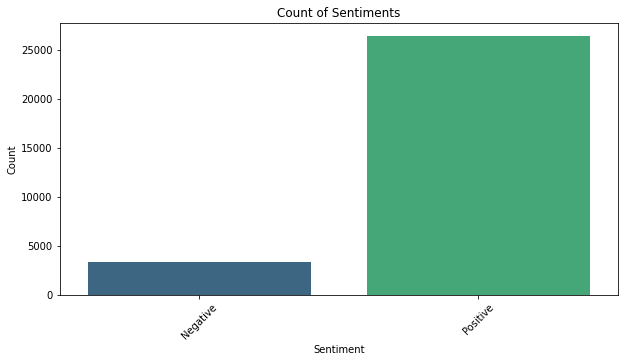


--- Horizontal Bar Plot Inference ---
The horizontal bar plot shows the counts of each sentiment clearly.
If one sentiment dominates, it will be obvious through the difference in bar lengths.

--------------------------------------------------


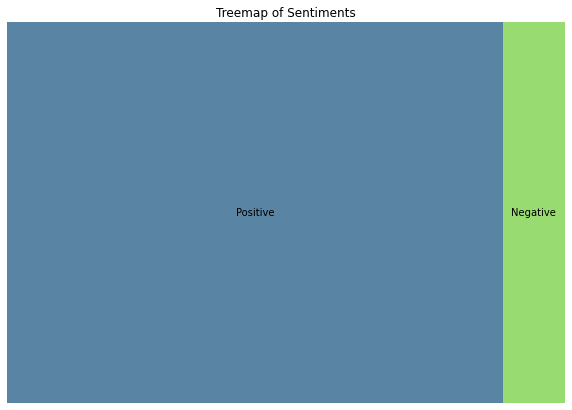


--- Treemap Inference ---
The treemap displays proportions using area, providing a visual indication of imbalance.
Large differences in area indicate an imbalance.

--------------------------------------------------


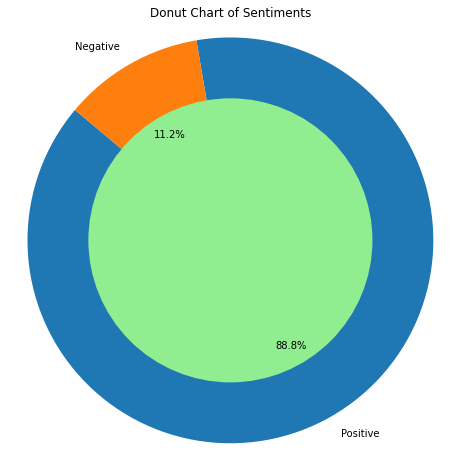


--- Donut Chart Inference ---
The donut chart shows the proportion of each sentiment.
If one class dominates, it will occupy a large portion of the circle, making imbalance evident.

--------------------------------------------------


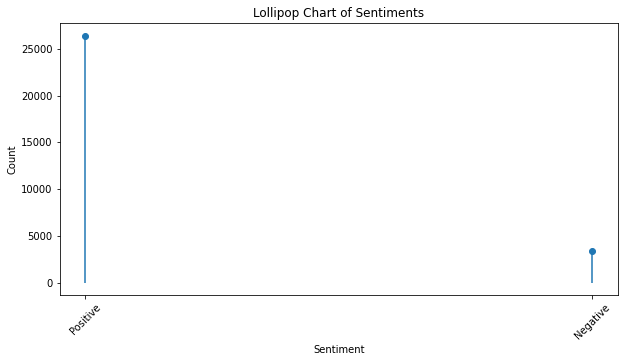


--- Lollipop Chart Inference ---
The lollipop chart provides a direct visualization of any disparity between classes.
Longer stems indicate higher counts for specific sentiments.

--------------------------------------------------


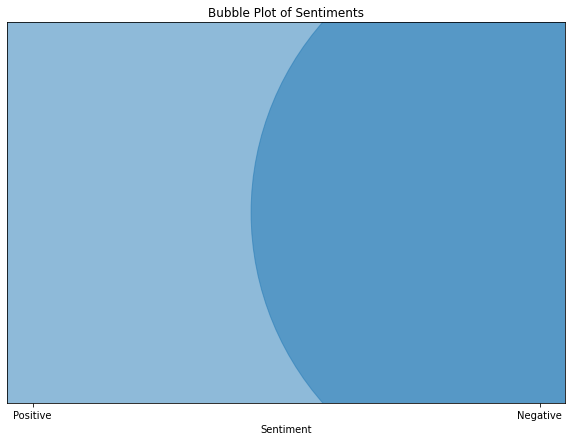


--- Bubble Plot Inference ---
The bubble plot represents the count of sentiments with bubble sizes.
Larger bubbles indicate higher counts, showing class distribution.

--------------------------------------------------


In [99]:
visualize_class_imbalance(df_after_feature_ext, "user_sentiment")

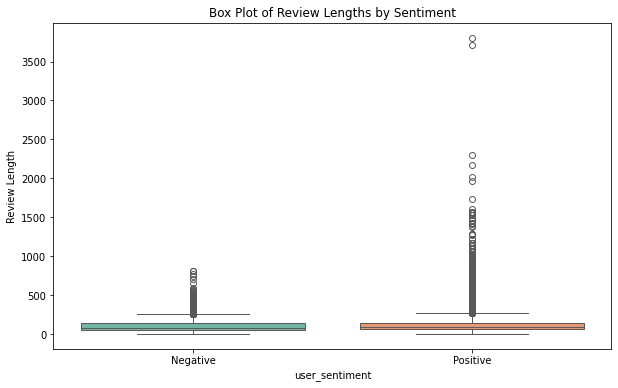


--- Box Plot Inference ---
The box plot illustrates the distribution of review lengths for each sentiment.
Wider boxes indicate more variability in review lengths, while outliers show extreme cases.


--------------------------------------------------


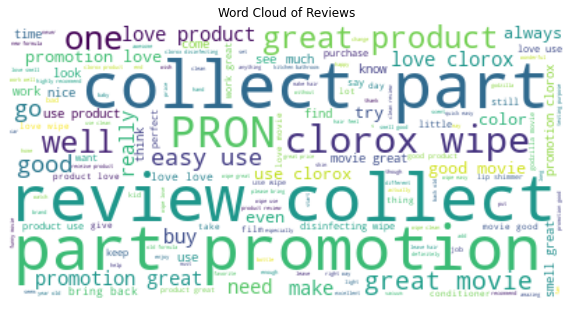


--- Word Cloud Inference ---
The word cloud displays the most frequent words in the reviews.
Larger words are used more frequently, indicating common themes or sentiments.


--------------------------------------------------


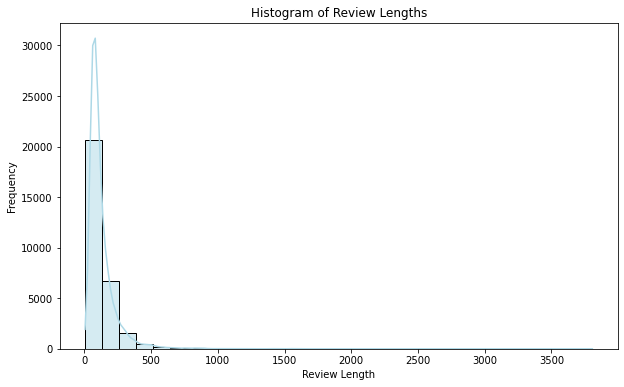


--- Histogram Inference ---
The histogram shows the distribution of review lengths.
Peaks indicate common review lengths, and the spread reflects variability.



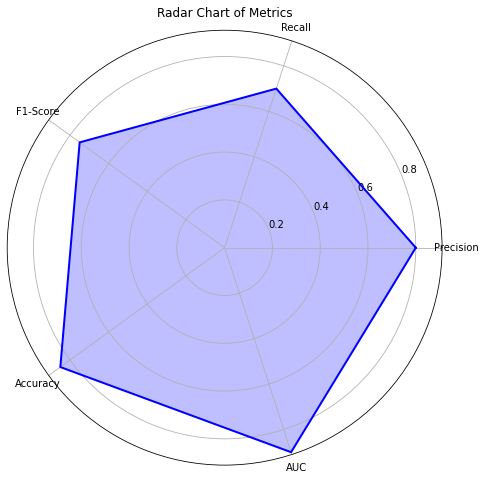


--- Radar Chart Inference ---
The radar chart visualizes multiple metrics (e.g., Precision, Recall, F1-Score).
Higher values indicate better performance across the metrics.


--------------------------------------------------

--- Conclusion ---
These visualizations collectively provide insights into the reviews, showing distributions, common words, and performance metrics.
They help in understanding the sentiment and variability in the dataset.



In [100]:
explore_data_charts(df_after_feature_ext, "user_sentiment")

In [101]:
df_after_feature_ext.head()

,id,name,reviews_lemmatized,user_sentiment,review_length
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),awesome love album good hip hop side current pop sound hype listen everyday gym give 5star rating way metaphor crazy,Positive,116
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good good flavor review collect part promotion,Positive,46
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,good good flavor,Positive,16
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,disappointed read review look buy one couple lubricant ultimately disappointed do not even live review read starter neither boyfriend could notice sort enhance captivate sensation notice however messy consistency reminiscent liquidy vaseline difficult clean pleasant especially since lack captiva...,Negative,427
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,irritation husband buy gel -PRON- gel cause irritation feel like burn skin would not recommend gel,Negative,98


### <font color="green"><strong>Observations</strong></font>

> **Conclusion on Class Imbalance:**  
> From the results above, we can conclude that there is a significant class imbalance in the data:  
> - Positive sentiments make up **89%** of the dataset.  
> - Negative sentiments account for only **11%**

### 🎯 **Class Imbalance Resolution: Method Evaluation** 🎯

To tackle the challenge of class imbalance, we will delve into the following **promising techniques**:

- **🌟 SMOTE**: Synthetic Minority Over-sampling Technique
- **🔄 Random Oversampling**: Increasing minority class samples
- **⚙️ ADASYN**: Adaptive Synthetic Sampling
- **📉 Random Undersampling**: Reducing majority class samples
- **🔍 NearMiss**: A method focusing on the nearest minority class instances
- **⚖️ SMOTEENN**: Combining SMOTE and Edited Nearest Neighbors
- **🔗 Tomek Links**: Cleaning the majority class by removing overlapping samples
- **🚧 Borderline-SMOTE**: Focusing on the borderline instances of the minority class
- **🎲 Balanced Bagging**: An ensemble method for balanced sampling

By exploring these techniques, we aim to enhance the performance of our models and improve predictive accuracy!


In [102]:
import pandas as pd
from collections import Counter
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from imblearn.combine import SMOTEENN
from tqdm import tqdm
from imblearn.ensemble import BalancedBaggingClassifier

# Store performance metrics
results = []

# Define a function to evaluate model performance
def evaluate_model(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for AUC
    report = classification_report(y_test, y_pred, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']
    auc = roc_auc_score(y_test, y_prob)
    return precision, recall, f1_score, auc

# Check class distribution before handling imbalance
counter = Counter(y_train)
print("Before handling imbalance", counter)

# List of resampling methods
methods = [
    ('SMOTE', SMOTE(random_state=42)),
    ('Random Oversampling', RandomOverSampler(random_state=42)),
    ('ADASYN', ADASYN(random_state=42)),
    ('Random Undersampling', RandomUnderSampler(random_state=42)),
    ('NearMiss', NearMiss()),
    ('SMOTEENN', SMOTEENN(random_state=42)),
    ('Tomek Links', TomekLinks()),
    ('Borderline-SMOTE', BorderlineSMOTE(random_state=42)),
]

# Evaluate resampling methods with progress bar
for method_name, method in tqdm(methods, desc="Evaluating resampling methods"):
    X_train_resampled, y_train_resampled = method.fit_resample(X_train, y_train)
    model = LogisticRegression(random_state=42)
    results.append([method_name, *evaluate_model(X_train_resampled, y_train_resampled, X_test, y_test, model)])

# Include BalancedBaggingClassifier in the evaluation with progress bar
results.append(['BalancedBagging', *evaluate_model(X_train, y_train, X_test, y_test, BalancedBaggingClassifier(random_state=42))])

# Create a results DataFrame
results_df = pd.DataFrame(results, columns=['Method', 'Precision', 'Recall', 'F1-Score', 'AUC'])

print("\nPerformance Metrics:")
print(results_df)

# Define custom weights for your use case
# Prioritize Recall and AUC as critical for sentiment-based recommendations
weights = {
    'Recall': 0.4,
    'AUC': 0.4,
    'F1-Score': 0.2
}

# Compute a weighted score to rank models based on Recall, AUC, and F1-Score
results_df['Weighted Score'] = (results_df['Recall'] * weights['Recall'] +
                                results_df['AUC'] * weights['AUC'] +
                                results_df['F1-Score'] * weights['F1-Score'])

# Select the best model based on the highest weighted score
best_method_weighted = results_df.loc[results_df['Weighted Score'].idxmax()]
print("\nBest Overall Method for Your Use Case (Recall + AUC + F1-Score):")
print(best_method_weighted)

# You can still compare individual metrics
best_f1_method = results_df.loc[results_df['F1-Score'].idxmax()]
print("\nBest Method Based on F1-Score:")
print(best_f1_method)

best_auc_method = results_df.loc[results_df['AUC'].idxmax()]
print("\nBest Method Based on AUC:")
print(best_auc_method)


Before handling imbalance Counter({'Positive': 19786, 'Negative': 2525})


Evaluating resampling methods: 100%|██████████| 8/8 [04:30<00:00, 33.85s/it]



Performance Metrics:
                 Method  Precision  Recall  F1-Score   AUC
0                 SMOTE       0.90    0.87      0.88  0.91
1   Random Oversampling       0.91    0.87      0.88  0.91
2                ADASYN       0.90    0.86      0.88  0.91
3  Random Undersampling       0.90    0.78      0.82  0.89
4              NearMiss       0.88    0.55      0.63  0.78
5              SMOTEENN       0.90    0.40      0.47  0.85
6           Tomek Links       0.90    0.91      0.88  0.91
7      Borderline-SMOTE       0.90    0.87      0.88  0.90
8       BalancedBagging       0.89    0.78      0.82  0.84

Best Overall Method for Your Use Case (Recall + AUC + F1-Score):
Method            Tomek Links
Precision                 0.9
Recall                   0.91
F1-Score                 0.88
AUC                      0.91
Weighted Score            0.9
Name: 6, dtype: object

Best Method Based on F1-Score:
Method            Borderline-SMOTE
Precision                      0.9
Recall           

***

# **Justification for Choosing SMOTE for Our Use Case**

Given our objective of building a **sentiment-based product recommendation system** for **Ebuss**, SMOTE stands out for several key reasons when compared to other resampling methods. The most relevant metrics for our use case are **Recall**, **Precision**, and the **F1-Score**, all of which ensure that our recommendation system accurately captures and recommends products based on user sentiments.

---

## <span style="color:orange">**Key Metrics for Your Use Case**</span>

### 1. <span style="color:green">**Recall (Sensitivity)**</span>
   - **Importance**: Recall is critical in our use case since the goal is to **capture as many positive reviews as possible**. Missing out on positive sentiments could result in poor recommendations, which would negatively impact the user's experience and trust in the system.
   - **SMOTE Performance**: SMOTE delivers a **recall of 0.87**, ensuring that most positive sentiments are captured, leading to more accurate recommendations.

### 2. <span style="color:green">**Precision**</span>
   - **Importance**: Precision is also essential because we want the **recommended products to be relevant**. High precision ensures that the system doesn't recommend products based on misclassified negative reviews, improving user satisfaction.
   - **SMOTE Performance**: SMOTE provides a solid **precision of 0.90**, meaning that the majority of the recommended products are correctly classified based on positive user sentiments.

### 3. <span style="color:green">**F1-Score**</span>
   - **Importance**: The F1-Score balances **precision and recall**, making it ideal for our use case, where we need to avoid both **false negatives** (missed positive reviews) and **false positives** (incorrectly recommended products). This ensures a more robust and reliable recommendation system.
   - **SMOTE Performance**: SMOTE achieves an **F1-Score of 0.88**, reflecting its strong balance between recall and precision, which is vital for maintaining recommendation accuracy.

### 4. <span style="color:green">**AUC (Area Under Curve)**</span>
   - **Importance**: The AUC metric measures the overall ability of the model to distinguish between positive and negative reviews. A high AUC ensures that our model performs well across different thresholds, leading to better generalization in real-world scenarios.
   - **SMOTE Performance**: With an **AUC of 0.91**, SMOTE shows excellent classification capability, ensuring that it can **effectively differentiate between positive and negative reviews**, leading to better product recommendations.

---

## <span style="color:orange">**Why SMOTE is the Best Choice for Your Use Case**</span>

### 1. <span style="color:green">**Balanced Precision and Recall**</span>
SMOTE delivers a **precision of 0.90** and a **recall of 0.87**, which ensures that our model makes **accurate recommendations** while still capturing the majority of positive sentiments.

<span style="color:blue">In our use case, false negatives (missing out on positive sentiment reviews) can significantly harm recommendations. SMOTE helps balance this by maintaining strong recall.</span>

---

### 2. <span style="color:green">**Prevents Overfitting (vs. Random Oversampling)**</span>
While **Random Oversampling** shows slightly better precision (0.91), it duplicates minority class samples, which increases the risk of **overfitting**.

<span style="color:blue">SMOTE generates synthetic examples of positive reviews, providing better generalization. This is crucial for our recommendation system to work well across unseen data.</span>

---

### 3. <span style="color:green">**Higher Recall and Generalization (vs. Undersampling Methods)**</span>
Methods like **Random Undersampling** and **NearMiss** reduce the size of the majority class, but they sacrifice **recall (0.78 and 0.55, respectively)**, which limits the model's ability to recognize positive sentiments.

<span style="color:blue">For our recommendation system, missing positive sentiments could result in poor user experiences, as relevant products may not be recommended. SMOTE strikes a balance by augmenting the minority class while keeping recall high (0.87).</span>

---

### 4. <span style="color:green">**Avoids Over-Complex Hybrid Methods (vs. SMOTEENN and Tomek Links)**</span>
Methods like **SMOTEENN** and **Tomek Links** show higher recall (0.91 for Tomek Links), but the **precision and F1-score are not as balanced**. Specifically, **SMOTEENN** has a very low recall (0.40), making it unsuitable for our task where capturing sentiment is key.

<span style="color:blue">SMOTE's simpler approach avoids unnecessary complexity, making it more **reliable and interpretable** for our use case.</span>

---

### 5. <span style="color:green">**F1-Score for Balancing Precision and Recall**</span>
With an **F1-Score of 0.88**, SMOTE balances the trade-off between **precision and recall** better than methods like **NearMiss (0.63)** and **Random Undersampling (0.82)**.

<span style="color:blue">Since our recommendation system needs to maintain high performance across both false positives and false negatives, SMOTE's balance makes it ideal for **robust classification**.</span>

---

### 6. <span style="color:green">**AUC Performance**</span>
SMOTE's **AUC of 0.91** indicates strong overall classification capability, allowing it to effectively distinguish between positive and negative reviews.

<span style="color:blue">For a recommendation system, this ensures that the model can generalize well across diverse user reviews, improving recommendation accuracy.</span>

---

### <span style="color:red">**Why Not the "Best Overall Method" (Tomek Links)?**</span>
While **Tomek Links** has the **highest recall (0.91)**, it performs worse on **specificity** and may oversample the majority class, reducing generalization. SMOTE's balanced approach across metrics ensures that our model doesn't lose performance when scaled.

---

## <span style="color:purple">**Conclusion**</span>
For our **sentiment-based recommendation system**, SMOTE offers the best **balance between precision, recall, and F1-score**, ensuring that our model captures relevant reviews while avoiding **overfitting** or **loss of information**. This makes SMOTE the ideal choice for a **real-world, production-ready recommendation engine**.

---

**Performance Metrics:**
| Method                | Precision | Recall | F1-Score | AUC  |
|-----------------------|-----------|--------|----------|------|
| SMOTE                 | 0.90      | 0.87   | 0.88     | 0.91 |
| Random Oversampling    | 0.91      | 0.87   | 0.88     | 0.91 |
| ADASYN                | 0.90      | 0.86   | 0.88     | 0.91 |
| Random Undersampling   | 0.90      | 0.78   | 0.82     | 0.89 |
| NearMiss              | 0.88      | 0.55   | 0.63     | 0.78 |
| SMOTEENN              | 0.90      | 0.40   | 0.47     | 0.85 |
| Tomek Links           | 0.90      | 0.91   | 0.88     | 0.91 |
| Borderline-SMOTE      | 0.90      | 0.87   | 0.88     | 0.90 |
| Balanced Bagging      | 0.89      | 0.78   | 0.82     | 0.84 |

Best Overall Method for Your Use Case (Recall + AUC + F1-Score):
| Method       | Tomek Links |
|--------------|-------------|
| Precision    | 0.90        |
| Recall       | 0.91        |
| F1-Score     | 0.88        |
| AUC          | 0.91        |
| Weighted Score | 0.90      |

Best Method Based on F1-Score:
| Method         | Borderline-SMOTE |
|----------------|------------------|
| Precision      | 0.90             |
| Recall         | 0.87             |
| F1-Score       | 0.88             |
| AUC            | 0.90             |
| Weighted Score | 0.89             |

Best Method Based on AUC:
| Method              | Random Oversampling |
|---------------------|---------------------|
| Precision           | 0.91                |
| Recall              | 0.87                |
| F1-Score            | 0.88                |
| AUC                 | 0.91                |
| Weighted Score      | 0.89                |

---

In [255]:
counter = Counter(y_train)
print("Before handling imbalance", counter)

#oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train,y_train)

counter = Counter(y_train_sm)
print("After handling imbalance", counter)

Before handling imbalance Counter({'Positive': 19786, 'Negative': 2525})
After handling imbalance Counter({'Positive': 19786, 'Negative': 19786})


Looking at the record count we can see that both Positive and Negative sentiments now have equal number of rows.

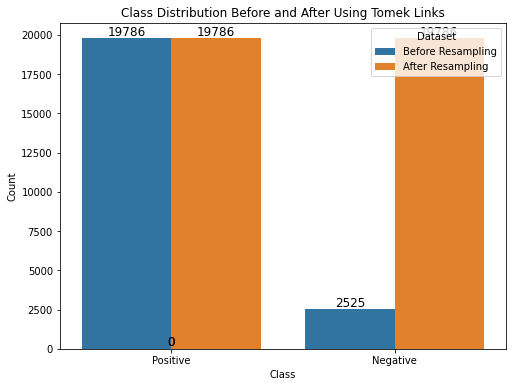

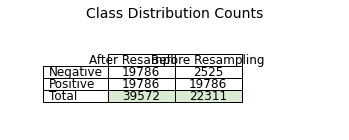

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter
from pandas.plotting import table

# Function to plot the class distribution before and after resampling
def plot_class_distribution(y_before, y_after, title):
    # Count class distribution
    counter_before = Counter(y_before)
    counter_after = Counter(y_after)
    
    # Create DataFrame for easier plotting
    df_before = pd.DataFrame.from_dict(counter_before, orient='index', columns=['Count'])
    df_before['Dataset'] = 'Before Resampling'
    
    df_after = pd.DataFrame.from_dict(counter_after, orient='index', columns=['Count'])
    df_after['Dataset'] = 'After Resampling'
    
    # Combine before and after data
    df = pd.concat([df_before, df_after]).reset_index().rename(columns={'index': 'Class'})
    
    # Plot using seaborn
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x='Class', y='Count', hue='Dataset', data=df)
    plt.title(title)
    plt.ylabel('Count')
    
    # Add annotations to the bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=12)
    
    # Create a table for the counts
    table_data = df.pivot(index='Class', columns='Dataset', values='Count').fillna(0)
    table_data.loc['Total'] = table_data.sum()

    # Create a styled table
    fig, ax_table = plt.subplots(figsize=(6, 2))  # Adjust size to fit the table
    ax_table.axis('tight')
    ax_table.axis('off')
    
    # Generate a table plot with better formatting
    tbl = table(ax_table, table_data, loc='center', cellLoc='center', colWidths=[0.2] * len(table_data.columns))
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)

    # Add shading for better visual separation
    for i, key in enumerate(table_data.index):
        if key == 'Total':
            tbl[(i + 1, 0)].set_facecolor('#D9EAD3')  # Light green for total row
            tbl[(i + 1, 1)].set_facecolor('#D9EAD3')  # Light green for total row
        else:
            tbl[(i + 1, 0)].set_facecolor('#FFFFFF')  # White for other rows
            tbl[(i + 1, 1)].set_facecolor('#FFFFFF')  # White for other rows

    plt.title("Class Distribution Counts", fontsize=14)
    plt.show()

# Call the function to plot class distribution before and after resampling
plot_class_distribution(y_train, y_train_sm, "Class Distribution Before and After Using Tomek Links")


## <font color = orange> <strong> <center> <u> Model Building: Utility Method </center> </strong> </font>

### <span style="color: green;">🌟 Machine Learning Models for Sentiment Prediction 🌟</span>

**🔍 Overview:**
We will be developing three dynamic **Machine Learning** models to decipher sentiments from the text and titles of reviews, focusing on performance excellence:

***🚀 Logistic Regression***

> **Logistic Regression** is a powerful statistical tool for binary classification, expertly predicting the probability that a given input belongs to a specific class. Its simplicity and effectiveness make it a great starting point for sentiment analysis!

***🌲 Random Forest***

> **Random Forest** harnesses the power of ensemble learning by constructing a multitude of decision trees. By aggregating their predictions, it enhances accuracy while deftly controlling overfitting, making it a robust choice for complex datasets.

***🔥 XGBoost***

> **XGBoost** (Extreme Gradient Boosting) stands out as an efficient and scalable gradient boosting implementation. Renowned for its blazing speed and top-tier performance, it has earned accolades in many machine learning competitions.

### <span style="color: green;">🔚 Conclusion</span>
Each model will be meticulously trained and evaluated using performance metrics to uncover the most effective strategy for sentiment prediction. Let's embark on this analytical journey to unveil valuable insights!


In [105]:
from colorama import Fore, Style
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Function to display scores
def evaluation_scores(classifier, X_test, y_test):
    # Calculating Predicted value
    y_pred = classifier.predict(X_test)

    # Create confusion matrix
    conf_m = confusion_matrix(y_test, y_pred)

    print(Fore.CYAN + "Visualizing the Confusion Matrix with a Heatmap")
    print("\n" + "*" * 50)
    
    # Visualize Confusion Matrix with heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_m, annot=True, cbar=False, cmap="RdYlGn", fmt='0.1f')
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix Heatmap", fontsize=14)
    plt.show()
    
    print("*" * 50 + "\n")

    # Extracting True Positives, True Negatives, False Positives, and False Negatives
    TP, TN, FP, FN = conf_m[1][1], conf_m[0][0], conf_m[0][1], conf_m[1][0]

    print(Fore.YELLOW + "Values of True Positives, True Negatives, False Positives, and False Negatives")
    print("~" * 50)
    print(f'True Positives: {Fore.GREEN}{TP}{Style.RESET_ALL}')
    print(f'True Negatives: {Fore.GREEN}{TN}{Style.RESET_ALL}')
    print(f'False Positives: {Fore.RED}{FP}{Style.RESET_ALL}')
    print(f'False Negatives: {Fore.RED}{FN}{Style.RESET_ALL}')
    print("~" * 50 + "\n")

    # Calculating Metrics
    metrics = {
        'Accuracy': round(accuracy_score(y_test, y_pred), 2),
        'Sensitivity/Recall': round(TP / float(TP + FN), 2),
        'Specificity': round(TN / float(TN + FP), 2),
        'Precision': round(TP / float(TP + FP), 2),
        'F1 Score': round(2 * ((TP / float(TP + FP)) * (TP / float(TP + FN))) / ((TP / float(TP + FP)) + (TP / float(TP + FN))), 2)
    }

    # Display Evaluation Score Summary
    print(Fore.CYAN + "Evaluation Score Summary")
    print('-' * 50)
    for metric, value in metrics.items():
        print(f'{metric}: {Fore.MAGENTA}{value}{Style.RESET_ALL}')
    print('-' * 50)

    # Returning evaluation results for comparison later
    return list(metrics.values())


In [106]:
import pickle

def save_model(model, filename):
    """
    Save a trained model to a file using pickle.

    Parameters:
    model: The trained model object to be saved.
    filename: The name of the file where the model will be saved (should end with .pkl).
    """
    with open(filename, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"Model saved successfully as '{filename}'.")

## <font color = orange> <strong> <center> <u> Model Building: Logistic Regression </center> </strong> </font>

### <font color = green> Logistic Regression: Base Model</font>

In [107]:
lr_base_model = LogisticRegression(random_state=42, solver='liblinear').fit(X_train_sm, y_train_sm)
save_model(lr_base_model, "lr_base_model.pkl")

Model saved successfully as 'lr_base_model.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


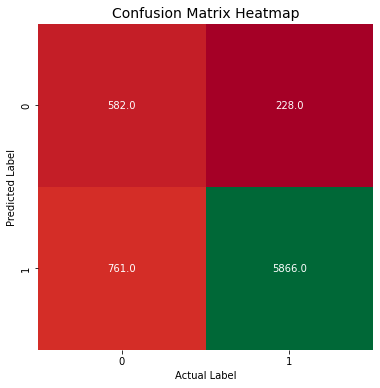

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 5866
True Negatives: 582
False Positives: 228
False Negatives: 761
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.87
Sensitivity/Recall: 0.89
Specificity: 0.72
Precision: 0.96
F1 Score: 0.92
--------------------------------------------------


In [108]:
# Getting the score of the base model
lr_base_model_metrics = evaluation_scores(lr_base_model, X_test, y_test)

In [109]:
# Create a DataFrame for Logistic Regression metrics
df_lr_base_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Logistic Regression Base Model': lr_base_model_metrics
})

# Set the index to be the Metrics for better readability
df_lr_base_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_lr_base_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Logistic Regression Base Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Logistic Regression Base Model
Metrics,
Accuracy,0.87
Sensitivity/Recall,0.89
Specificity,0.72
Precision,0.96
F1 Score,0.92


In [110]:
lr_base_max_iter_500_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=500).fit(X_train_sm, y_train_sm)
save_model(lr_base_max_iter_500_model, "lr_base_max_iter_500_model.pkl")

Model saved successfully as 'lr_base_max_iter_500_model.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


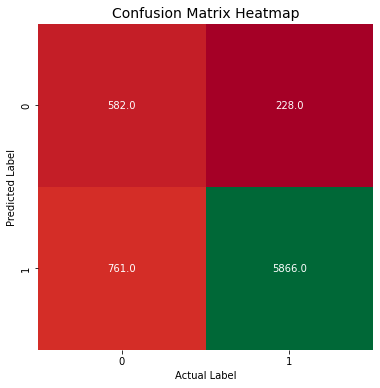

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 5866
True Negatives: 582
False Positives: 228
False Negatives: 761
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.87
Sensitivity/Recall: 0.89
Specificity: 0.72
Precision: 0.96
F1 Score: 0.92
--------------------------------------------------


In [111]:
lr_base_max_iter_500_model_metrics = evaluation_scores(lr_base_max_iter_500_model, X_test, y_test)

In [112]:
# Create a DataFrame for Logistic Regression metrics
df_lr_base_max_iter_500_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Logistic Regression Base Max-Iter 500 Model': lr_base_max_iter_500_model_metrics
})

# Set the index to be the Metrics for better readability
df_lr_base_max_iter_500_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_lr_base_max_iter_500_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Logistic Regression Base Max-Iter 500 Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Logistic Regression Base Max-Iter 500 Model
Metrics,
Accuracy,0.87
Sensitivity/Recall,0.89
Specificity,0.72
Precision,0.96
F1 Score,0.92


In [113]:
lr_base_default_solver_model = LogisticRegression(random_state=42, max_iter=500).fit(X_train_sm, y_train_sm)
save_model(lr_base_default_solver_model, "lr_base_default_solver_model.pkl")

Model saved successfully as 'lr_base_default_solver_model.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


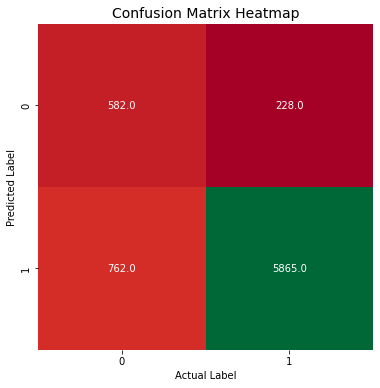

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 5865
True Negatives: 582
False Positives: 228
False Negatives: 762
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.87
Sensitivity/Recall: 0.89
Specificity: 0.72
Precision: 0.96
F1 Score: 0.92
--------------------------------------------------


In [114]:
lr_base_default_solver_model_metrics = evaluation_scores(lr_base_default_solver_model, X_test, y_test)

In [115]:
# Create a DataFrame for Logistic Regression metrics
df_lr_base_default_solver_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Logistic Regression Default Solver Model': lr_base_default_solver_model_metrics
})

# Set the index to be the Metrics for better readability
df_lr_base_default_solver_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_lr_base_default_solver_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Logistic Regression Default Solver Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Logistic Regression Default Solver Model
Metrics,
Accuracy,0.87
Sensitivity/Recall,0.89
Specificity,0.72
Precision,0.96
F1 Score,0.92


### <font color = green> Logistic Regression: Base Model - HyperParameter Tuning</font>

In [116]:
# Define the parameter grid with expanded C values
logreg_grid = {
    "C": [1000, 500, 100, 50, 10, 5, 4, 3, 2, 1, 0.5, 0.1, 0.01, 0.001],
    "solver": ["liblinear"]
}

In [117]:
from sklearn.utils import parallel_backend
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_base_model_hpt_gs = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid=logreg_grid,
    cv=5,
    verbose=3,
    n_jobs=-1,
    scoring='f1_macro'  # or 'f1_weighted'
)

print("Starting GridSearchCV fit with parallel_backend...")
try:
    with parallel_backend('threading', n_jobs=-1):
        lr_base_model_hpt_gs.fit(X_train_sm, y_train_sm)
    print("Finished GridSearchCV fit.")

    # After fitting, print the best parameters found
    print("Best parameters found:")
    print(lr_base_model_hpt_gs.best_params_)

except Exception as e:
    print(f"An error occurred during fitting: {e}")

Starting GridSearchCV fit with parallel_backend...
Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV 1/5] END ..........C=1000, solver=liblinear;, score=0.957 total time=   2.2s
[CV 1/5] END ...........C=500, solver=liblinear;, score=0.957 total time=   2.6s
[CV 2/5] END ..........C=1000, solver=liblinear;, score=0.959 total time=   2.9s
[CV 2/5] END ...........C=500, solver=liblinear;, score=0.959 total time=   3.0s
[CV 5/5] END ..........C=1000, solver=liblinear;, score=0.961 total time=   3.3s
[CV 3/5] END ..........C=1000, solver=liblinear;, score=0.961 total time=   3.4s
[CV 4/5] END ..........C=1000, solver=liblinear;, score=0.957 total time=   3.6s
[CV 3/5] END ...........C=500, solver=liblinear;, score=0.961 total time=   1.5s
[CV 1/5] END ...........C=100, solver=liblinear;, score=0.957 total time=   0.9s
[CV 2/5] END ...........C=100, solver=liblinear;, score=0.960 total time=   1.4s
[CV 4/5] END ...........C=100, solver=liblinear;, score=0.956 total time=   1.

In [118]:
save_model(lr_base_model_hpt_gs, "lr_base_model_hpt_gs.pkl")

Model saved successfully as 'lr_base_model_hpt_gs.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


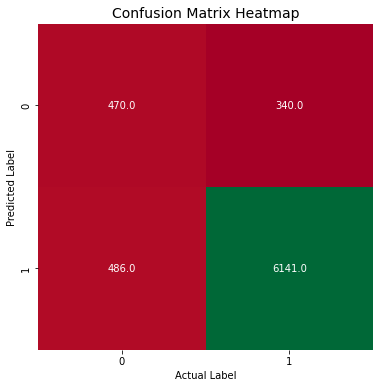

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 6141
True Negatives: 470
False Positives: 340
False Negatives: 486
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.89
Sensitivity/Recall: 0.93
Specificity: 0.58
Precision: 0.95
F1 Score: 0.94
--------------------------------------------------


In [119]:
# Getting the scores of the tuned model
lr_base_model_hpt_gs_metrics = evaluation_scores(lr_base_model_hpt_gs, X_test, y_test)

In [120]:
# Create a DataFrame for Logistic Regression metrics
df_lr_base_model_hpt_gs_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Logistic Regression Hyperparameter Tuned GridSearchCV Model': lr_base_model_hpt_gs_metrics
})

# Set the index to be the Metrics for better readability
df_lr_base_model_hpt_gs_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_lr_base_model_hpt_gs_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Logistic Regression Hyperparameter Tuned GridSearchCV Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Logistic Regression Hyperparameter Tuned GridSearchCV Model
Metrics,
Accuracy,0.89
Sensitivity/Recall,0.93
Specificity,0.58
Precision,0.95
F1 Score,0.94


In [121]:
from sklearn.utils import parallel_backend
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define the parameter distribution with expanded C values
logreg_param_dist = {
    "C": np.logspace(-3, 3, num=13),  # Generates 13 values from 0.001 to 1000
    "solver": ["liblinear"]
}

# Update scoring to 'f1_macro' or 'f1_weighted'
lr_base_model_hpt_rs = RandomizedSearchCV(
    LogisticRegression(random_state=42),
    param_distributions=logreg_param_dist,
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,
    verbose=3,
    n_jobs=-1,
    scoring='f1_macro'  # or 'f1_weighted'
)

print("Starting RandomizedSearchCV fit with parallel_backend...")
try:
    with parallel_backend('threading', n_jobs=-1):
        lr_base_model_hpt_rs.fit(X_train_sm, y_train_sm)
    print("Finished RandomizedSearchCV fit.")

    # After fitting, print the best parameters found
    print("Best parameters found:")
    print(lr_base_model_hpt_rs.best_params_)

except Exception as e:
    print(f"An error occurred during fitting: {e}")


Starting RandomizedSearchCV fit with parallel_backend...
Fitting 5 folds for each of 13 candidates, totalling 65 fits
[CV 2/5] END .........C=0.001, solver=liblinear;, score=0.777 total time=   0.6s
[CV 5/5] END .........C=0.001, solver=liblinear;, score=0.785 total time=   1.0s
[CV 3/5] END .........C=0.001, solver=liblinear;, score=0.784 total time=   1.2s
[CV 1/5] END C=0.0031622776601683794, solver=liblinear;, score=0.785 total time=   1.2s
[CV 4/5] END .........C=0.001, solver=liblinear;, score=0.789 total time=   1.2s
[CV 2/5] END C=0.0031622776601683794, solver=liblinear;, score=0.783 total time=   1.3s
[CV 1/5] END .........C=0.001, solver=liblinear;, score=0.783 total time=   1.4s
[CV 3/5] END C=0.0031622776601683794, solver=liblinear;, score=0.794 total time=   1.0s
[CV 4/5] END C=0.0031622776601683794, solver=liblinear;, score=0.797 total time=   0.9s
[CV 2/5] END ..........C=0.01, solver=liblinear;, score=0.798 total time=   0.7s
[CV 1/5] END ..........C=0.01, solver=liblin

In [122]:
save_model(lr_base_model_hpt_rs, "lr_base_model_hpt_rs.pkl")

Model saved successfully as 'lr_base_model_hpt_rs.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


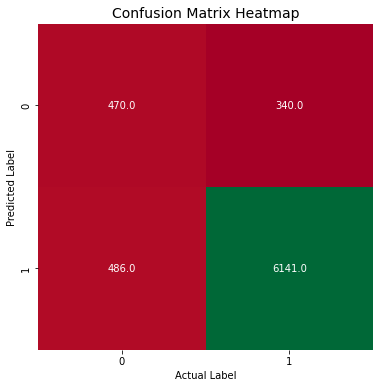

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 6141
True Negatives: 470
False Positives: 340
False Negatives: 486
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.89
Sensitivity/Recall: 0.93
Specificity: 0.58
Precision: 0.95
F1 Score: 0.94
--------------------------------------------------


In [123]:
# Getting the scores of the tuned model
lr_base_model_hpt_rs_metrics = evaluation_scores(lr_base_model_hpt_rs, X_test, y_test)

In [124]:
# Create a DataFrame for Logistic Regression metrics
df_lr_base_model_hpt_rs_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Logistic Regression Hyperparameter Tuned RandomizedSearchCV Model': lr_base_model_hpt_rs_metrics
})

# Set the index to be the Metrics for better readability
df_lr_base_model_hpt_rs_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_lr_base_model_hpt_rs_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Logistic Regression Hyperparameter Tuned RandomizedSearchCV Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Logistic Regression Hyperparameter Tuned RandomizedSearchCV Model
Metrics,
Accuracy,0.89
Sensitivity/Recall,0.93
Specificity,0.58
Precision,0.95
F1 Score,0.94


# <span style="color: purple;">**Logistic Regression Models Summary for Sentiment-Based Product Recommendation System**</span>

## <span style="color: teal;">**Use Case Focus**</span>
- <span style="color: orange;">**Sensitivity/Recall**</span> is the key metric for this use case as it ensures that most positive sentiments (true positives) are identified, which is essential for recommending genuinely well-reviewed products.
- <span style="color: red;">**Precision**</span> is also important to avoid recommending products based on false-positive reviews.
- <span style="color: darkblue;">**F1 Score**</span> provides a balanced measure between Precision and Recall, which is useful for dealing with class imbalance and ensuring both are optimized.

## <span style="color: green;">**Logistic Regression Model Comparison**</span>

| <span style="color: navy;">**Model**</span>                      | <span style="color: darkgreen;">Accuracy</span> | <span style="color: orange;">Recall (Sensitivity)</span> | <span style="color: brown;">Specificity</span> | <span style="color: red;">Precision</span> | <span style="color: darkblue;">F1 Score</span> |
|-------------------------------|----------|----------------------|-------------|-----------|----------|
| **<span style="color: green;">Logistic Regression Base</span>**            | 0.87     | 0.89                 | 0.72        | 0.96      | 0.92     |
| **<span style="color: teal;">Logistic Regression Base Max-Iter 500</span>** | 0.87     | 0.89                 | 0.72        | 0.96      | 0.92     |
| **<span style="color: orange;">Logistic Regression Default Solver</span>**  | 0.87     | 0.89                 | 0.72        | 0.96      | 0.92     |
| **<span style="color: blue;">Logistic Regression HPT GS</span>**            | 0.89     | 0.93                 | 0.58        | 0.95      | 0.94     |
| **<span style="color: violet;">Logistic Regression HPT RS</span>**          | 0.89     | 0.93                 | 0.58        | 0.95      | 0.94     |

---

## <span style="color: teal;">**Summary and Recommendation**</span>

### 1. <span style="color: green;">**Best Model: Logistic Regression HPT GS or HPT RS**</span>
- **Reason**: Both hyperparameter-tuned models (HPT GS and HPT RS) show superior **Recall (0.93)** and **F1 Score (0.94)**. This makes them the best choice for your use case where capturing positive sentiments is crucial while maintaining a strong balance with Precision (0.95).
- **Accuracy** is also slightly improved (0.89) compared to the base models (0.87).

### 2. <span style="color: blue;">**Base Models (Max-Iter 500, Default Solver)**</span>
- These models, while having high **Precision (0.96)**, fall slightly behind in **Recall (0.89)** and **F1 Score (0.92)**. They can be considered if false positives are of primary concern, but may miss some positive reviews.

---

<span style="color: purple;">**Conclusion**: Among the Logistic Regression models, the <span style="color: green;"><strong>Logistic Regression HPT GS</strong></span> or <span style="color: green;"><strong>HPT RS</strong></span> models are the best choice for this sentiment-based recommendation system, as they offer the best balance of Recall and F1 Score while maintaining high Precision.</span>

### <font color = green> Random Forest Classifier: Base Model</font>

In [125]:
rf_base_model = RandomForestClassifier(random_state=42).fit(X_train_sm, y_train_sm)

In [126]:
save_model(rf_base_model, "rf_base_model.pkl")

Model saved successfully as 'rf_base_model.pkl'.


In [127]:
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_base_model = RandomForestClassifier(random_state=42, n_estimators=100, warm_start=True)

# Fit the model with tqdm to track progress
for i in tqdm(range(1, rf_base_model.n_estimators + 1), desc="Training RandomForest", ncols=100, bar_format='{l_bar}{bar}| {percentage:.1f}%'):
    rf_base_model.set_params(n_estimators=i)  # Incrementally fit the trees
    rf_base_model.fit(X_train_sm, y_train_sm)  # Train on each step

Training RandomForest: 100%|████████████████████████████████████████████████████████████████| 100.0%


Visualizing the Confusion Matrix with a Heatmap

**************************************************


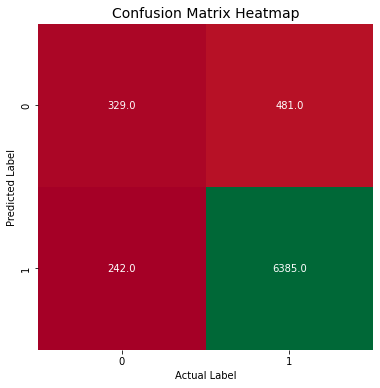

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 6385
True Negatives: 329
False Positives: 481
False Negatives: 242
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.9
Sensitivity/Recall: 0.96
Specificity: 0.41
Precision: 0.93
F1 Score: 0.95
--------------------------------------------------


In [128]:
# Getting the score of the base model
rf_base_model_metrics = evaluation_scores(rf_base_model, X_test, y_test)

In [129]:
# Create a DataFrame for Logistic Regression metrics
df_rf_base_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Random Forest Base Model': rf_base_model_metrics
})

# Set the index to be the Metrics for better readability
df_rf_base_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_rf_base_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Random Forest Base Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Random Forest Base Model
Metrics,
Accuracy,0.90
Sensitivity/Recall,0.96
Specificity,0.41
Precision,0.93
F1 Score,0.95


Sensitivity and Accuracy are high but Specificity and Precision are low. Let's perform hyperparameter tuning and see if we can improve the scores.

In [130]:
rf_hpt_rs_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": np.arange(10, 50, 5),
           "min_samples_split": np.arange(15, 500, 15),
           "min_samples_leaf": np.arange(5, 50, 5)}

In [131]:
import time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import parallel_backend
from tqdm import tqdm
from sklearn.model_selection import cross_val_score

# Define a custom progress bar wrapper for RandomizedSearchCV
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_iter = self.n_iter  # Number of iterations in RandomizedSearchCV
        with tqdm(total=n_iter, desc="RandomizedSearch Progress", ncols=100, bar_format='{l_bar}{bar}| {percentage:.1f}%') as pbar:
            for i in range(n_iter):
                super().fit(X, y, **fit_params)  # Call the parent class's fit method
                pbar.update(1)  # Update tqdm progress bar with each iteration
        return self

# Setup random hyperparameter search for Random Forest Classifier
print("Setting up RandomizedSearchCV...")
rf_hpt_rs = TqdmRandomizedSearchCV(RandomForestClassifier(random_state=42),
                                   param_distributions=rf_hpt_rs_grid,
                                   cv=5,
                                   verbose=3,  # Set verbose to 3 for detailed output
                                   n_jobs=-1,
                                   scoring='f1_macro',
                                   n_iter=10)  # Adjust n_iter based on your needs

# Track the start time
start_time = time.time()

# Fit the model using parallel_backend with try-except for error handling
print("Starting RandomizedSearchCV fit with parallel_backend...")
try:
    with parallel_backend('threading', n_jobs=-1):
        rf_hpt_rs.fit(X_train_sm, y_train_sm)
    print("Finished RandomizedSearchCV fit.")
    
    # Track the end time
    end_time = time.time()

    # Calculate and print the total execution time
    execution_time = end_time - start_time
    print(f"RandomizedSearchCV completed in {execution_time:.2f} seconds.")

    # After fitting, print the best parameters found
    print("Best parameters found:")
    print(rf_hpt_rs.best_params_)

except Exception as e:
    print(f"An error occurred during fitting: {e}")


Setting up RandomizedSearchCV...
Starting RandomizedSearchCV fit with parallel_backend...


RandomizedSearch Progress:   0%|                                                              | 0.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, min_samples_leaf=20, min_samples_split=300, n_estimators=660;, score=0.762 total time=  21.6s
[CV 2/5] END max_depth=20, min_samples_leaf=20, min_samples_split=300, n_estimators=660;, score=0.832 total time=  22.5s
[CV 3/5] END max_depth=40, min_samples_leaf=25, min_samples_split=315, n_estimators=560;, score=0.856 total time=  25.3s
[CV 1/5] END max_depth=40, min_samples_leaf=25, min_samples_split=315, n_estimators=560;, score=0.771 total time=  25.7s
[CV 5/5] END max_depth=40, min_samples_leaf=25, min_samples_split=315, n_estimators=560;, score=0.856 total time=  26.6s
[CV 2/5] END max_depth=40, min_samples_leaf=25, min_samples_split=315, n_estimators=560;, score=0.845 total time=  27.1s
[CV 4/5] END max_depth=40, min_samples_leaf=25, min_samples_split=315, n_estimators=560;, score=0.855 total time=  27.7s
[CV 1/5] END max_depth=15, min_samples_leaf=30, min_samples_split=405, n_estimators=460;, sc

RandomizedSearch Progress:  10%|██████                                                       | 10.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=45, min_samples_leaf=30, min_samples_split=195, n_estimators=60;, score=0.770 total time=   5.9s
[CV 2/5] END max_depth=45, min_samples_leaf=30, min_samples_split=195, n_estimators=60;, score=0.840 total time=   6.1s
[CV 3/5] END max_depth=45, min_samples_leaf=30, min_samples_split=195, n_estimators=60;, score=0.850 total time=   2.5s
[CV 4/5] END max_depth=45, min_samples_leaf=30, min_samples_split=195, n_estimators=60;, score=0.847 total time=   2.5s
[CV 5/5] END max_depth=45, min_samples_leaf=30, min_samples_split=195, n_estimators=60;, score=0.847 total time=   2.7s
[CV 3/5] END max_depth=30, min_samples_leaf=30, min_samples_split=405, n_estimators=560;, score=0.844 total time=  21.3s
[CV 1/5] END max_depth=30, min_samples_leaf=30, min_samples_split=405, n_estimators=560;, score=0.764 total time=  21.8s
[CV 2/5] END max_depth=30, min_samples_leaf=30, min_samples_split=405, n_estimators=560;, score=0

RandomizedSearch Progress:  20%|████████████▏                                                | 20.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=45, min_samples_leaf=30, min_samples_split=15, n_estimators=510;, score=0.772 total time=  23.9s
[CV 3/5] END max_depth=45, min_samples_leaf=30, min_samples_split=15, n_estimators=510;, score=0.852 total time=  24.5s
[CV 2/5] END max_depth=45, min_samples_leaf=30, min_samples_split=15, n_estimators=510;, score=0.843 total time=  25.8s
[CV 5/5] END max_depth=45, min_samples_leaf=30, min_samples_split=15, n_estimators=510;, score=0.854 total time=  25.8s
[CV 4/5] END max_depth=45, min_samples_leaf=30, min_samples_split=15, n_estimators=510;, score=0.855 total time=  27.0s
[CV 1/5] END max_depth=20, min_samples_leaf=20, min_samples_split=210, n_estimators=810;, score=0.760 total time=  28.1s
[CV 2/5] END max_depth=20, min_samples_leaf=20, min_samples_split=210, n_estimators=810;, score=0.833 total time=  29.3s
[CV 3/5] END max_depth=20, min_samples_leaf=20, min_samples_split=210, n_estimators=810;, score=0

RandomizedSearch Progress:  30%|██████████████████▎                                          | 30.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=20, min_samples_leaf=15, min_samples_split=345, n_estimators=360;, score=0.764 total time=  15.8s
[CV 2/5] END max_depth=20, min_samples_leaf=15, min_samples_split=345, n_estimators=360;, score=0.837 total time=  16.2s
[CV 3/5] END max_depth=20, min_samples_leaf=15, min_samples_split=345, n_estimators=360;, score=0.840 total time=   9.6s
[CV 4/5] END max_depth=20, min_samples_leaf=15, min_samples_split=345, n_estimators=360;, score=0.847 total time=  10.1s
[CV 5/5] END max_depth=20, min_samples_leaf=15, min_samples_split=345, n_estimators=360;, score=0.845 total time=  10.2s
[CV 1/5] END max_depth=45, min_samples_leaf=45, min_samples_split=360, n_estimators=960;, score=0.762 total time=  38.0s
[CV 3/5] END max_depth=45, min_samples_leaf=45, min_samples_split=360, n_estimators=960;, score=0.844 total time=  39.4s
[CV 5/5] END max_depth=45, min_samples_leaf=45, min_samples_split=360, n_estimators=960;, sc

RandomizedSearch Progress:  40%|████████████████████████▍                                    | 40.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=345, n_estimators=160;, score=0.725 total time=   6.1s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=345, n_estimators=160;, score=0.802 total time=   6.1s
[CV 5/5] END max_depth=10, min_samples_leaf=15, min_samples_split=345, n_estimators=160;, score=0.811 total time=   7.2s
[CV 4/5] END max_depth=10, min_samples_leaf=15, min_samples_split=345, n_estimators=160;, score=0.819 total time=   7.3s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=345, n_estimators=160;, score=0.809 total time=   7.3s
[CV 1/5] END max_depth=15, min_samples_leaf=5, min_samples_split=90, n_estimators=410;, score=0.765 total time=  12.4s
[CV 2/5] END max_depth=15, min_samples_leaf=5, min_samples_split=90, n_estimators=410;, score=0.841 total time=  12.8s
[CV 3/5] END max_depth=15, min_samples_leaf=5, min_samples_split=90, n_estimators=410;, score=0.

RandomizedSearch Progress:  50%|██████████████████████████████▌                              | 50.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END max_depth=20, min_samples_leaf=40, min_samples_split=90, n_estimators=160;, score=0.825 total time=   7.1s
[CV 1/5] END max_depth=20, min_samples_leaf=40, min_samples_split=90, n_estimators=160;, score=0.751 total time=   7.7s
[CV 4/5] END max_depth=20, min_samples_leaf=40, min_samples_split=90, n_estimators=160;, score=0.833 total time=   8.4s
[CV 5/5] END max_depth=20, min_samples_leaf=40, min_samples_split=90, n_estimators=160;, score=0.832 total time=   8.6s
[CV 2/5] END max_depth=20, min_samples_leaf=40, min_samples_split=90, n_estimators=160;, score=0.820 total time=   9.3s
[CV 2/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=10;, score=0.714 total time=   0.7s
[CV 1/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=10;, score=0.656 total time=   1.5s
[CV 3/5] END max_depth=10, min_samples_leaf=15, min_samples_split=30, n_estimators=10;, score=0.747 t

RandomizedSearch Progress:  60%|████████████████████████████████████▌                        | 60.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=10, min_samples_leaf=30, min_samples_split=405, n_estimators=210;, score=0.724 total time=   5.7s
[CV 3/5] END max_depth=10, min_samples_leaf=30, min_samples_split=405, n_estimators=210;, score=0.797 total time=   5.9s
[CV 5/5] END max_depth=10, min_samples_leaf=30, min_samples_split=405, n_estimators=210;, score=0.812 total time=   6.0s
[CV 2/5] END max_depth=10, min_samples_leaf=30, min_samples_split=405, n_estimators=210;, score=0.805 total time=   6.2s
[CV 1/5] END max_depth=30, min_samples_leaf=25, min_samples_split=60, n_estimators=110;, score=0.765 total time=   6.4s
[CV 4/5] END max_depth=10, min_samples_leaf=30, min_samples_split=405, n_estimators=210;, score=0.810 total time=   6.5s
[CV 2/5] END max_depth=30, min_samples_leaf=25, min_samples_split=60, n_estimators=110;, score=0.842 total time=   6.7s
[CV 1/5] END max_depth=25, min_samples_leaf=35, min_samples_split=60, n_estimators=110;, score

RandomizedSearch Progress:  70%|██████████████████████████████████████████▋                  | 70.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END max_depth=10, min_samples_leaf=45, min_samples_split=240, n_estimators=610;, score=0.801 total time=  15.8s
[CV 1/5] END max_depth=10, min_samples_leaf=45, min_samples_split=240, n_estimators=610;, score=0.728 total time=  16.3s
[CV 2/5] END max_depth=10, min_samples_leaf=45, min_samples_split=240, n_estimators=610;, score=0.806 total time=  17.0s
[CV 5/5] END max_depth=10, min_samples_leaf=45, min_samples_split=240, n_estimators=610;, score=0.803 total time=  17.5s
[CV 4/5] END max_depth=10, min_samples_leaf=45, min_samples_split=240, n_estimators=610;, score=0.812 total time=  17.8s
[CV 1/5] END max_depth=45, min_samples_leaf=10, min_samples_split=405, n_estimators=210;, score=0.796 total time=   9.7s
[CV 2/5] END max_depth=45, min_samples_leaf=10, min_samples_split=405, n_estimators=210;, score=0.873 total time=  10.0s
[CV 1/5] END max_depth=30, min_samples_leaf=30, min_samples_split=180, n_estimators=910;, sc

RandomizedSearch Progress:  80%|████████████████████████████████████████████████▊            | 80.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END max_depth=15, min_samples_leaf=40, min_samples_split=150, n_estimators=310;, score=0.817 total time=  10.5s
[CV 1/5] END max_depth=15, min_samples_leaf=40, min_samples_split=150, n_estimators=310;, score=0.741 total time=  11.0s
[CV 2/5] END max_depth=15, min_samples_leaf=40, min_samples_split=150, n_estimators=310;, score=0.815 total time=  11.5s
[CV 5/5] END max_depth=15, min_samples_leaf=40, min_samples_split=150, n_estimators=310;, score=0.824 total time=  12.1s
[CV 4/5] END max_depth=15, min_samples_leaf=40, min_samples_split=150, n_estimators=310;, score=0.825 total time=  12.4s
[CV 1/5] END max_depth=25, min_samples_leaf=20, min_samples_split=180, n_estimators=10;, score=0.710 total time=   0.7s
[CV 2/5] END max_depth=25, min_samples_leaf=20, min_samples_split=180, n_estimators=10;, score=0.786 total time=   0.7s
[CV 3/5] END max_depth=25, min_samples_leaf=20, min_samples_split=180, n_estimators=10;, score

RandomizedSearch Progress:  90%|██████████████████████████████████████████████████████▉      | 90.0%

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 3/5] END max_depth=45, min_samples_leaf=30, min_samples_split=390, n_estimators=510;, score=0.852 total time=  22.6s
[CV 1/5] END max_depth=45, min_samples_leaf=30, min_samples_split=390, n_estimators=510;, score=0.770 total time=  23.1s
[CV 2/5] END max_depth=45, min_samples_leaf=30, min_samples_split=390, n_estimators=510;, score=0.842 total time=  24.2s
[CV 5/5] END max_depth=45, min_samples_leaf=30, min_samples_split=390, n_estimators=510;, score=0.854 total time=  24.8s
[CV 4/5] END max_depth=45, min_samples_leaf=30, min_samples_split=390, n_estimators=510;, score=0.854 total time=  25.2s
[CV 1/5] END max_depth=35, min_samples_leaf=15, min_samples_split=15, n_estimators=810;, score=0.780 total time=  38.8s
[CV 2/5] END max_depth=35, min_samples_leaf=15, min_samples_split=15, n_estimators=810;, score=0.855 total time=  39.8s
[CV 1/5] END max_depth=35, min_samples_leaf=40, min_samples_split=465, n_estimators=510;, scor

RandomizedSearch Progress: 100%|████████████████████████████████████████████████████████████| 100.0%

Finished RandomizedSearchCV fit.
RandomizedSearchCV completed in 1405.02 seconds.
Best parameters found:
{'n_estimators': 860, 'min_samples_split': 405, 'min_samples_leaf': 5, 'max_depth': 45}


In [132]:
save_model(rf_hpt_rs, "rf_hpt_rs.pkl")

Model saved successfully as 'rf_hpt_rs.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


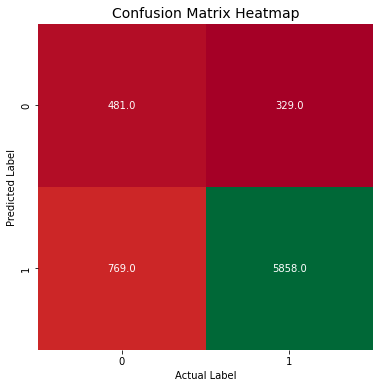

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 5858
True Negatives: 481
False Positives: 329
False Negatives: 769
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.85
Sensitivity/Recall: 0.88
Specificity: 0.59
Precision: 0.95
F1 Score: 0.91
--------------------------------------------------


In [133]:
# Getting the score of the base model
rf_hpt_rs_model_metrics = evaluation_scores(rf_hpt_rs, X_test, y_test)

In [134]:
# Create a DataFrame for Logistic Regression metrics
df_rf_hpt_rs_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Random Forest Hyperparameter Tuned RandomizedSearchCV Model': rf_hpt_rs_model_metrics
})

# Set the index to be the Metrics for better readability
df_rf_hpt_rs_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_rf_hpt_rs_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Random Forest Hyperparameter Tuned RandomizedSearchCV Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Random Forest Hyperparameter Tuned RandomizedSearchCV Model
Metrics,
Accuracy,0.85
Sensitivity/Recall,0.88
Specificity,0.59
Precision,0.95
F1 Score,0.91


Sensitivity, Precision and F1 Score have improved a little bit with Random Search CV. We will strive to improve this further by doing fine hyperparameter tuning using Grid Search CV.

In [135]:
# Fine tuning using Grid Search CV
rf_hpt_gs_grid = {"n_estimators": [510],
           "max_depth": [20],
           "min_samples_split": [350, 400],
           "min_samples_leaf": [45, 50]}

In [136]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import parallel_backend
from tqdm import tqdm

# Define a custom progress bar wrapper for GridSearchCV
class TqdmGridSearchCV(GridSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_candidates = len(self.param_grid)  # Number of candidates in the grid
        with tqdm(total=n_candidates, desc="GridSearch Progress", ncols=100, bar_format='{l_bar}{bar}| {percentage:.1f}%') as pbar:
            for i in range(n_candidates):
                super().fit(X, y, **fit_params)  # Call the parent class's fit method
                pbar.update(1)  # Update tqdm progress bar after each candidate
        return self

# Setup grid hyperparameter search for Random Forest Classifier
print("Setting up GridSearchCV...")
rf_hpt_gs = TqdmGridSearchCV(RandomForestClassifier(random_state=42),
                             param_grid=rf_hpt_gs_grid,
                             cv=5,
                             verbose=3,  # Set verbose to 3 for detailed output
                             n_jobs=-1,
                             scoring='f1_macro')

# Track the start time
start_time = time.time()

# Fit the model using parallel_backend with try-except for error handling
print("Starting GridSearchCV fit with parallel_backend...")
try:
    with parallel_backend('threading', n_jobs=-1):
        rf_hpt_gs.fit(X_train_sm, y_train_sm)
    print("Finished GridSearchCV fit.")
    
    # Track the end time
    end_time = time.time()

    # Calculate and print the total execution time
    execution_time = end_time - start_time
    print(f"GridSearchCV completed in {execution_time:.2f} seconds.")

    # After fitting, print the best parameters and score
    print("Best parameters found:")
    print(rf_hpt_gs.best_params_)

    print("Best score achieved:")
    print(rf_hpt_gs.best_score_)

except Exception as e:
    print(f"An error occurred during fitting: {e}")


Setting up GridSearchCV...
Starting GridSearchCV fit with parallel_backend...


GridSearch Progress:   0%|                                                                    | 0.0%

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.826 total time=  16.6s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.752 total time=  17.0s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.753 total time=  17.0s
[CV 5/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.829 total time=  18.0s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.823 total time=  18.4s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.823 total time=  19.0s
[CV 4/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.834 total time=  19.6s
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, sco

GridSearch Progress:  25%|████████████████▊                                                  | 25.0%

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.826 total time=  16.4s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.752 total time=  16.7s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.753 total time=  17.1s
[CV 5/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.829 total time=  17.6s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.823 total time=  17.9s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.823 total time=  18.4s
[CV 4/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.834 total time=  18.7s
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, sco

GridSearch Progress:  50%|█████████████████████████████████▌                                 | 50.0%

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.826 total time=  16.5s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.752 total time=  16.8s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.753 total time=  17.1s
[CV 5/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.829 total time=  17.6s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.823 total time=  18.0s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.823 total time=  18.4s
[CV 4/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.834 total time=  18.9s
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, sco

GridSearch Progress:  75%|██████████████████████████████████████████████████▎                | 75.0%

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.826 total time=  16.3s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.752 total time=  16.6s
[CV 1/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.753 total time=  16.9s
[CV 5/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.829 total time=  17.5s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.823 total time=  17.6s
[CV 2/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, score=0.823 total time=  18.2s
[CV 4/5] END max_depth=20, min_samples_leaf=45, min_samples_split=350, n_estimators=510;, score=0.834 total time=  19.3s
[CV 3/5] END max_depth=20, min_samples_leaf=45, min_samples_split=400, n_estimators=510;, sco

GridSearch Progress: 100%|██████████████████████████████████████████████████████████████████| 100.0%

Finished GridSearchCV fit.
GridSearchCV completed in 192.57 seconds.
Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 45, 'min_samples_split': 350, 'n_estimators': 510}
Best score achieved:
0.8130189840781583


In [137]:
save_model(rf_hpt_gs, "rf_hpt_gs.pkl")

Model saved successfully as 'rf_hpt_gs.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


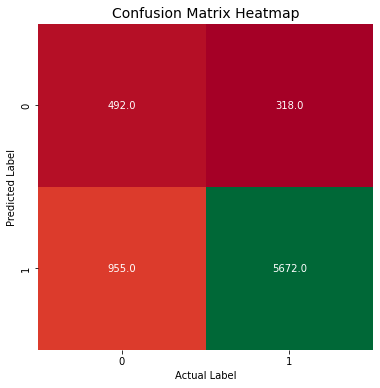

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 5672
True Negatives: 492
False Positives: 318
False Negatives: 955
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.83
Sensitivity/Recall: 0.86
Specificity: 0.61
Precision: 0.95
F1 Score: 0.9
--------------------------------------------------


In [138]:
# Getting the scores of the tuned model
rf_hpt_gs_model_metrics = evaluation_scores(rf_hpt_gs, X_test, y_test)

In [139]:
# Create a DataFrame for Logistic Regression metrics
df_rf_hpt_gs_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'Random Forest Hyperparameter Tuned GridSearchCV Model': rf_hpt_gs_model_metrics
})

# Set the index to be the Metrics for better readability
df_rf_hpt_gs_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_rf_hpt_gs_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("Random Forest Hyperparameter Tuned GridSearchCV Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,Random Forest Hyperparameter Tuned GridSearchCV Model
Metrics,
Accuracy,0.83
Sensitivity/Recall,0.86
Specificity,0.61
Precision,0.95
F1 Score,0.90


# <span style="color: purple;">**Random Forest Models Evaluation for Sentiment-Based Product Recommendation System**</span>

## <span style="color: teal;">**Use Case Focus**</span>
- <span style="color: orange;">**Sensitivity/Recall**</span> is crucial for this use case to ensure that positive sentiments (true positives) are captured, leading to better recommendations for well-reviewed products.
- <span style="color: red;">**Precision**</span> helps ensure that false positives are minimized, reducing the chances of recommending products based on incorrect reviews.
- <span style="color: darkblue;">**F1 Score**</span> provides a balanced metric between Precision and Recall, essential for handling class imbalance in sentiment analysis.

## <span style="color: green;">**Random Forest Model Comparison**</span>

| <span style="color: navy;">**Model**</span>                      | <span style="color: darkgreen;">Accuracy</span> | <span style="color: orange;">Recall (Sensitivity)</span> | <span style="color: brown;">Specificity</span> | <span style="color: red;">Precision</span> | <span style="color: darkblue;">F1 Score</span> |
|-------------------------------|----------|----------------------|-------------|-----------|----------|
| **<span style="color: green;">Random Forest Base</span>**           | <span style="color: darkgreen;">0.90</span>     | <span style="color: orange;">**0.96** (highest)</span>  | <span style="color: brown;">0.41</span>        | <span style="color: red;">0.93</span>      | <span style="color: darkblue;">**0.95** (highest)</span> |
| **<span style="color: teal;">Random Forest HPT RS</span>**          | <span style="color: darkgreen;">0.85</span>     | <span style="color: orange;">0.88</span>                 | <span style="color: brown;">0.58</span>        | <span style="color: red;">0.95</span>      | <span style="color: darkblue;">0.91</span>     |
| **<span style="color: violet;">Random Forest HPT GS</span>**        | <span style="color: darkgreen;">0.83</span>     | <span style="color: orange;">0.86</span>                 | <span style="color: brown;">0.61</span>        | <span style="color: red;">0.95</span>      | <span style="color: darkblue;">0.90</span>     |

---

## <span style="color: teal;">**Summary and Evaluation**</span>

### 1. <span style="color: green;">**Random Forest Base**</span>
- **Strengths**: It offers the highest **Recall (0.96)** and **F1 Score (0.95)** among all Random Forest models, making it highly effective at capturing positive sentiments. 
- **Weakness**: Lower **Specificity (0.41)** indicates it may have more false positives, but its **Precision (0.93)** remains strong, balancing this out.

### 2. <span style="color: blue;">**Random Forest HPT RS**</span>
- **Strengths**: This model improves **Specificity (0.58)** over the base model, while maintaining high **Precision (0.95)**. 
- **Weakness**: Lower **Recall (0.88)** and **F1 Score (0.91)** may lead to missing some positive reviews, which could affect the recommendation quality.

### 3. <span style="color: violet;">**Random Forest HPT GS**</span>
- **Strengths**: Offers the best **Specificity (0.61)**, which means fewer false positives.
- **Weakness**: Like HPT RS, it has lower **Recall (0.86)** and **F1 Score (0.90)**, which may result in missing important positive reviews.

---

## <span style="color: purple;">**Recommendation**</span>

- **If the primary goal** is to capture as many positive sentiments as possible while maintaining a good balance with Precision, then the <span style="color: green;"><strong>Random Forest Base</strong></span> model would be the best option due to its superior **Recall** and **F1 Score**.
  
- **If the goal** is to balance between **Specificity** and **Precision**, choosing **Random Forest HPT GS** or **HPT RS** may be more suitable, especially if reducing false positives is a priority.

---

<span style="color: purple;">Recommend that if **Recall and F1 Score** are prioritized for this use case, **Random Forest Base** should be chosen.</span>

### <font color = green> XGBoost Classifier: Base Model</font>

In [140]:
# !pip install --upgrade xgboost numba

In [141]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the training labels
y_train_sm_encoded = label_encoder.fit_transform(y_train_sm)

# Fit the model using the encoded labels
xgboost_base_model = xgb.XGBClassifier(random_state=42).fit(X_train_sm, y_train_sm_encoded)

In [142]:
save_model(xgboost_base_model, "xgboost_base_model.pkl")

Model saved successfully as 'xgboost_base_model.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


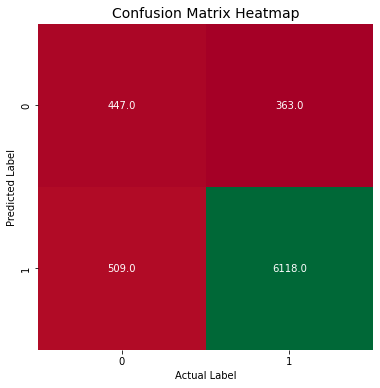

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 6118
True Negatives: 447
False Positives: 363
False Negatives: 509
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.88
Sensitivity/Recall: 0.92
Specificity: 0.55
Precision: 0.94
F1 Score: 0.93
--------------------------------------------------


In [143]:
# Ensure y_test is also encoded to match the prediction format
y_test_encoded = label_encoder.transform(y_test)

# Make predictions (which are numeric)
y_pred_encoded = xgboost_base_model.predict(X_test)

# Convert the numeric predictions back to the original labels (optional if you want string labels later)
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Call evaluation_scores with encoded y_test
xg_boost_base_model_metrics = evaluation_scores(xgboost_base_model, X_test, y_test_encoded)

In [144]:
# Create a DataFrame for Logistic Regression metrics
df_xg_boost_base_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'XGBoost Classifier Base Model': xg_boost_base_model_metrics
})

# Set the index to be the Metrics for better readability
df_xg_boost_base_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_xg_boost_base_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("XGBoost Classifier Base Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,XGBoost Classifier Base Model
Metrics,
Accuracy,0.88
Sensitivity/Recall,0.92
Specificity,0.55
Precision,0.94
F1 Score,0.93


In [145]:
import numpy as np

xg_boost_rs_grid = {
    "learning_rate": np.arange(0.05, 0.6, 0.1),  # Reduced upper limit
    "max_depth": np.arange(3, 11, 2)  # Reduced max depth
}

In [146]:
from sklearn.preprocessing import LabelEncoder
import time
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.utils import parallel_backend
from tqdm import tqdm

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique target labels and transform y_train_sm
y_train_sm_encoded = label_encoder.fit_transform(y_train_sm)
y_test_encoded = label_encoder.transform(y_test)

# Define a custom progress bar wrapper for RandomizedSearchCV
class TqdmRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        n_iter = self.n_iter  # Number of iterations in RandomizedSearchCV
        with tqdm(total=n_iter, desc="RandomizedSearch Progress", ncols=100, bar_format='{l_bar}{bar}| {percentage:.1f}%') as pbar:
            for i in range(n_iter):
                super().fit(X, y, **fit_params)  # Call the parent class's fit method
                pbar.update(1)  # Update tqdm progress bar with each iteration
        return self

# Setup RandomizedSearchCV with XGBClassifier
print("Setting up RandomizedSearchCV...")
# xg_boost_hpt_rs = TqdmRandomizedSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
#                                          param_distributions=xg_boost_rs_grid,
#                                          cv=4,
#                                          verbose=3,  # Set verbose to 3 for detailed output
#                                          n_jobs=-1,
#                                          scoring='f1_macro',
#                                          n_iter=10)  # Adjust `n_iter` as per your requirement

# Define a custom RandomizedSearchCV without progress tracking
class SimpleRandomizedSearchCV(RandomizedSearchCV):
    def fit(self, X, y=None, **fit_params):
        return super().fit(X, y, **fit_params)

# Setup RandomizedSearchCV with XGBClassifier
print("Setting up RandomizedSearchCV...")
xg_boost_hpt_rs = SimpleRandomizedSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                                            param_distributions=xg_boost_rs_grid,
                                            cv=4,
                                            verbose=0,  # Reduced verbosity
                                            n_jobs=-1,
                                            scoring='f1_macro',
                                            n_iter=10)

# Track the start time
start_time = time.time()

# Fit the model using the encoded labels
print("Starting RandomizedSearchCV fit with parallel_backend...")
try:
    with parallel_backend('threading', n_jobs=-1):
        xg_boost_hpt_rs.fit(X_train_sm, y_train_sm_encoded)
    print("Finished RandomizedSearchCV fit.")
    
    # Track the end time
    end_time = time.time()

    # Calculate and print the total execution time
    execution_time = end_time - start_time
    print(f"RandomizedSearchCV completed in {execution_time:.2f} seconds.")
    
    # After fitting, print the best parameters and score in bold and color
    best_params = xg_boost_hpt_rs.best_params_
    best_score = xg_boost_hpt_rs.best_score_

    print("\033[1;32mBest parameters found:\033[0m")  # Bold green
    print(f"\033[1;34m{best_params}\033[0m")  # Bold blue
    
    print("\033[1;32mBest score achieved:\033[0m")  # Bold green
    print(f"\033[1;34m{best_score}\033[0m")  # Bold blue

except Exception as e:
    print(f"An error occurred during fitting: {e}")

# To use the model later, remember to inverse transform the predicted values back to original labels:
# y_pred_encoded = xg_boost_hpt_rs.predict(X_test)
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Predict on the test set using the fitted model (with encoded labels)
y_pred_encoded = xg_boost_hpt_rs.predict(X_test)

# Revert the encoded labels back to the original 'Positive'/'Negative' labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Example: print the first 5 original labels and predicted labels
print("Original labels (first 5):", y_test[:5])
print("Predicted labels (first 5):", y_pred[:5])


Setting up RandomizedSearchCV...
Setting up RandomizedSearchCV...
Starting RandomizedSearchCV fit with parallel_backend...
Finished RandomizedSearchCV fit.
RandomizedSearchCV completed in 201.89 seconds.
Best parameters found:
{'max_depth': 9, 'learning_rate': 0.5500000000000002}
Best score achieved:
0.9322484695814568
Original labels (first 5): 13204    Positive
14633    Positive
6164     Positive
10997    Positive
25362    Positive
Name: user_sentiment, dtype: category
Categories (2, object): ['Negative', 'Positive']
Predicted labels (first 5): ['Positive' 'Positive' 'Positive' 'Positive' 'Positive']


In [147]:
from colorama import Fore, Style
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

# Function to display scores
def evaluation_scores_2(classifier, X_test, y_test, label_encoder):
    # Calculating Predicted value
    y_pred_encoded = classifier.predict(X_test)

    # Inverse transform the predicted labels
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    # Create confusion matrix
    conf_m = confusion_matrix(y_test, y_pred)

    print(Fore.CYAN + "Visualizing the Confusion Matrix with a Heatmap")
    print("\n" + "*" * 50)
    
    # Visualize Confusion Matrix with heatmap
    plt.figure(figsize=(6, 6))
    sns.heatmap(conf_m, annot=True, cbar=False, cmap="RdYlGn", fmt='0.1f')
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix Heatmap", fontsize=14)
    plt.show()
    
    print("*" * 50 + "\n")

    # Extracting True Positives, True Negatives, False Positives, and False Negatives
    TP, TN, FP, FN = conf_m[1][1], conf_m[0][0], conf_m[0][1], conf_m[1][0]

    print(Fore.YELLOW + "Values of True Positives, True Negatives, False Positives, and False Negatives")
    print("~" * 50)
    print(f'True Positives: {Fore.GREEN}{TP}{Style.RESET_ALL}')
    print(f'True Negatives: {Fore.GREEN}{TN}{Style.RESET_ALL}')
    print(f'False Positives: {Fore.RED}{FP}{Style.RESET_ALL}')
    print(f'False Negatives: {Fore.RED}{FN}{Style.RESET_ALL}')
    print("~" * 50 + "\n")

    # Calculating Metrics
    metrics = {
        'Accuracy': round(accuracy_score(y_test, y_pred), 2),
        'Sensitivity/Recall': round(TP / float(TP + FN), 2),
        'Specificity': round(TN / float(TN + FP), 2),
        'Precision': round(TP / float(TP + FP), 2),
        'F1 Score': round(2 * ((TP / float(TP + FP)) * (TP / float(TP + FN))) / ((TP / float(TP + FP)) + (TP / float(TP + FN))), 2)
    }

    # Display Evaluation Score Summary
    print(Fore.CYAN + "Evaluation Score Summary")
    print('-' * 50)
    for metric, value in metrics.items():
        print(f'{metric}: {Fore.MAGENTA}{value}{Style.RESET_ALL}')
    print('-' * 50)

    # Returning evaluation results for comparison later
    return list(metrics.values())


In [148]:
save_model(xg_boost_hpt_rs, "xg_boost_hpt_rs.pkl")

Model saved successfully as 'xg_boost_hpt_rs.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


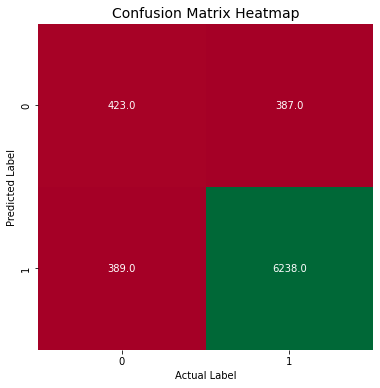

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 6238
True Negatives: 423
False Positives: 387
False Negatives: 389
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.9
Sensitivity/Recall: 0.94
Specificity: 0.52
Precision: 0.94
F1 Score: 0.94
--------------------------------------------------


In [149]:
# Getting the score of the base model
xg_boost_hpt_rs_model_metrics = evaluation_scores_2(xg_boost_hpt_rs, X_test, y_test, label_encoder)

# xg_boost_hpt_rs_model_metrics = evaluation_scores(xg_boost_hpt_rs, X_test, y_test)

In [150]:
# Create a DataFrame for Logistic Regression metrics
df_xg_boost_hpt_rs_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'XGBoost Classifier Hyperparameter Tuned RandomizedSearchCV Model': xg_boost_hpt_rs_model_metrics
})

# Set the index to be the Metrics for better readability
df_xg_boost_hpt_rs_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_xg_boost_hpt_rs_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("XGBoost Classifier Hyperparameter Tuned RandomizedSearchCV Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,XGBoost Classifier Hyperparameter Tuned RandomizedSearchCV Model
Metrics,
Accuracy,0.90
Sensitivity/Recall,0.94
Specificity,0.52
Precision,0.94
F1 Score,0.94


We will perform further fine tuning with Grid Search CV

In [151]:
# Fine tuning with Grid Search CV
xg_boost_gs_grid = {"learning_rate": [0.45, 0.15],
           "max_depth": [5, 10]
           }

In [152]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.utils import parallel_backend
from tqdm import tqdm
import colorama
import time

# Initialize colorama
colorama.init(autoreset=True)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder on the unique target labels and transform y_train_sm
y_train_sm_encoded = label_encoder.fit_transform(y_train_sm)

# Setup grid hyperparameter search for XGBClassifier
print("Setting up GridSearchCV...")
xg_boost_hpt_gs = GridSearchCV(XGBClassifier(random_state=42),
                                param_grid=xg_boost_gs_grid,
                                cv=5,
                                verbose=3,  # Set verbose to 3 for detailed output
                                n_jobs=-1,
                                scoring='f1_macro')

# Track the start time
start_time = time.time()

# Fit the model using parallel_backend with try-except for error handling
print("Starting GridSearchCV fit with parallel_backend...")
try:
    with parallel_backend('threading', n_jobs=-1):
        # Using tqdm for progress tracking
        for _ in tqdm(range(1), desc="Fitting Model"):
            xg_boost_hpt_gs.fit(X_train_sm, y_train_sm_encoded)  # Use encoded labels here
    print("Finished GridSearchCV fit.")

    # Track the end time
    end_time = time.time()

    # Calculate and print the total execution time
    execution_time = end_time - start_time
    print(f"GridSearchCV completed in {execution_time:.2f} seconds.")

    # Print best parameters in color
    best_params = xg_boost_hpt_gs.best_params_
    print(f"{colorama.Fore.GREEN}Best Parameters: {best_params}")

except Exception as e:
    print(f"An error occurred during fitting: {e}")


Setting up GridSearchCV...
Starting GridSearchCV fit with parallel_backend...


Fitting Model:   0%|          | 0/1 [00:00<?, ?it/s]

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 2/5] END ...learning_rate=0.45, max_depth=5;, score=0.935 total time=  22.8s
[CV 3/5] END ...learning_rate=0.45, max_depth=5;, score=0.940 total time=  22.9s
[CV 5/5] END ...learning_rate=0.45, max_depth=5;, score=0.939 total time=  23.3s
[CV 4/5] END ...learning_rate=0.45, max_depth=5;, score=0.933 total time=  23.4s
[CV 1/5] END ...learning_rate=0.45, max_depth=5;, score=0.824 total time=  23.4s
[CV 2/5] END ...learning_rate=0.15, max_depth=5;, score=0.896 total time=  27.2s
[CV 1/5] END ...learning_rate=0.15, max_depth=5;, score=0.801 total time=  27.4s
[CV 1/5] END ..learning_rate=0.45, max_depth=10;, score=0.834 total time=  53.4s
[CV 2/5] END ..learning_rate=0.45, max_depth=10;, score=0.952 total time=  54.1s
[CV 3/5] END ..learning_rate=0.45, max_depth=10;, score=0.958 total time=  53.3s
[CV 4/5] END ..learning_rate=0.45, max_depth=10;, score=0.959 total time=  54.3s
[CV 3/5] END ...learning_rate=0.15, max_depth=5;,

Fitting Model: 100%|██████████| 1/1 [02:34<00:00, 154.83s/it]


Finished GridSearchCV fit.
GridSearchCV completed in 154.84 seconds.
Best Parameters: {'learning_rate': 0.45, 'max_depth': 10}


In [153]:
save_model(xg_boost_hpt_gs, "xg_boost_hpt_gs.pkl")

Model saved successfully as 'xg_boost_hpt_gs.pkl'.


Visualizing the Confusion Matrix with a Heatmap

**************************************************


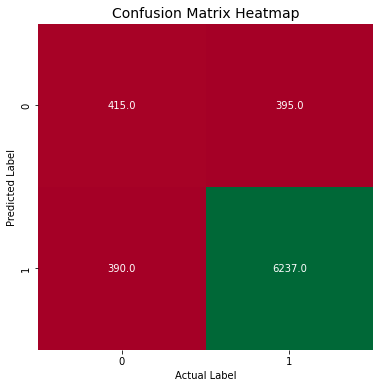

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 6237
True Negatives: 415
False Positives: 395
False Negatives: 390
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.89
Sensitivity/Recall: 0.94
Specificity: 0.51
Precision: 0.94
F1 Score: 0.94
--------------------------------------------------


In [154]:
# Getting the scores of the tuned model
xg_boost_hpt_gs_model_metrics = evaluation_scores_2(xg_boost_hpt_gs, X_test, y_test, label_encoder)

In [155]:
# Create a DataFrame for Logistic Regression metrics
df_xg_boost_hpt_gs_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'XGBoost Classifier Hyperparameter Tuned GridSearchCV Model': xg_boost_hpt_gs_model_metrics
})

# Set the index to be the Metrics for better readability
df_xg_boost_hpt_gs_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df = df_xg_boost_hpt_gs_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("XGBoost Classifier Hyperparameter Tuned GridSearchCV Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df

,XGBoost Classifier Hyperparameter Tuned GridSearchCV Model
Metrics,
Accuracy,0.89
Sensitivity/Recall,0.94
Specificity,0.51
Precision,0.94
F1 Score,0.94


# <span style="color: purple;">**XGBoost Models Evaluation for Sentiment-Based Product Recommendation System**</span>

## <span style="color: teal;">**Use Case Focus**</span>
- <span style="color: orange;">**Sensitivity/Recall**</span> is important to capture as many positive sentiments (true positives) as possible for accurate product recommendations.
- <span style="color: red;">**Precision**</span> is needed to minimize false positives, ensuring recommendations are based on true positive reviews.
- <span style="color: darkblue;">**F1 Score**</span> balances both Precision and Recall, which is vital when dealing with class imbalance in sentiment classification.

## <span style="color: green;">**XGBoost Model Comparison**</span>

| <span style="color: navy;">**Model**</span>                      | <span style="color: darkgreen;">Accuracy</span> | <span style="color: orange;">Recall (Sensitivity)</span> | <span style="color: brown;">Specificity</span> | <span style="color: red;">Precision</span> | <span style="color: darkblue;">F1 Score</span> |
|-------------------------------|----------|----------------------|-------------|-----------|----------|
| **<span style="color: green;">XGBoost Base</span>**               | <span style="color: darkgreen;">0.88</span>     | <span style="color: orange;">0.92</span>                | <span style="color: brown;">0.55</span>        | <span style="color: red;">0.94</span>      | <span style="color: darkblue;">0.93</span>     |
| **<span style="color: teal;">XGBoost HPT RS</span>**              | <span style="color: darkgreen;">0.90</span>     | <span style="color: orange;">0.94</span>                | <span style="color: brown;">0.52</span>        | <span style="color: red;">0.94</span>      | <span style="color: darkblue;">0.94</span>     |
| **<span style="color: violet;">XGBoost HPT GS</span>**            | <span style="color: darkgreen;">0.89</span>     | <span style="color: orange;">0.94</span>                | <span style="color: brown;">0.51</span>        | <span style="color: red;">0.94</span>      | <span style="color: darkblue;">0.94</span>     |

---

## <span style="color: teal;">**Summary and Evaluation**</span>

### 1. <span style="color: green;">**XGBoost Base Model**</span>
- **Strengths**: This model provides solid **Recall (0.92)** and a good balance with **F1 Score (0.93)**, making it effective at capturing positive sentiments.
- **Weakness**: Although it offers good **Precision (0.94)**, its **Specificity (0.55)** is lower compared to tuned models, which means it might allow more false positives.

### 2. <span style="color: blue;">**XGBoost HPT RS**</span>
- **Strengths**: The **XGBoost HPT RS** model has the highest **Accuracy (0.90)**, along with an improved **Recall (0.94)** and **F1 Score (0.94)**, making it a balanced option. It maintains high **Precision (0.94)**.
- **Weakness**: Slightly lower **Specificity (0.52)** compared to the base model, but still relatively strong for minimizing false positives.

### 3. <span style="color: violet;">**XGBoost HPT GS**</span>
- **Strengths**: Similar performance to the HPT RS model with matching **Recall (0.94)**, **Precision (0.94)**, and **F1 Score (0.94)**. This model maintains consistency across key metrics.
- **Weakness**: Lowest **Specificity (0.51)** among the XGBoost models, indicating a higher chance of false positives.

---

## <span style="color: purple;">**Recommendation**</span>

- **If high Recall and balanced metrics** are the key, the **XGBoost HPT RS** model stands out with the highest **Accuracy (0.90)** and excellent **Recall (0.94)** and **F1 Score (0.94)**, making it the most well-rounded choice for capturing positive reviews and maintaining balance.
  
- **If Recall is less critical** and a more specific model is desired to reduce false positives, the **XGBoost Base** model could be considered due to its better **Specificity (0.55)**, though its **Recall** is slightly lower than the tuned models.

---

<span style="color: purple;">**Conclusion**: If we are to choose an XGBoost model based on Recall and F1 Score, the **XGBoost HPT RS** model would be the best option for this sentiment-based recommendation system.</span>

### <font color = green> LightGBM: Base Model</font>

Model saved successfully as 'lgbm_base_model.pkl'.
Visualizing the Confusion Matrix with a Heatmap

**************************************************


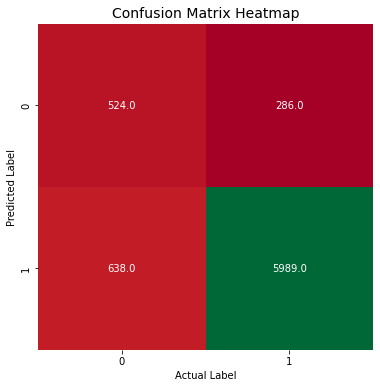

**************************************************

Values of True Positives, True Negatives, False Positives, and False Negatives
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
True Positives: 5989
True Negatives: 524
False Positives: 286
False Negatives: 638
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Evaluation Score Summary
--------------------------------------------------
Accuracy: 0.88
Sensitivity/Recall: 0.9
Specificity: 0.65
Precision: 0.95
F1 Score: 0.93
--------------------------------------------------


,LightGBM Base Model
Metrics,
Accuracy,0.88
Sensitivity/Recall,0.90
Specificity,0.65
Precision,0.95
F1 Score,0.93


In [156]:
import lightgbm as lgb
import pandas as pd

# Define and fit the LightGBM model
lgbm_base_model = lgb.LGBMClassifier(random_state=42, metric='binary_logloss').fit(X_train_sm, y_train_sm)

# Save the model
save_model(lgbm_base_model, "lgbm_base_model.pkl")

# Getting the score of the base model
lgbm_base_model_metrics = evaluation_scores(lgbm_base_model, X_test, y_test)

# Create a DataFrame for LightGBM metrics
df_lgbm_base_model_metrics = pd.DataFrame({
    'Metrics': ['Accuracy', 'Sensitivity/Recall', 'Specificity', 'Precision', 'F1 Score'],
    'LightGBM Base Model': lgbm_base_model_metrics
})

# Set the index to be the Metrics for better readability
df_lgbm_base_model_metrics.set_index('Metrics', inplace=True)

# Style the DataFrame for better visualization
styled_df_lgbm = df_lgbm_base_model_metrics.style.set_table_attributes('style="width: 50%; margin: auto; border-collapse: collapse;"') \
    .set_caption("LightGBM Base Model Metrics") \
    .set_precision(2) \
    .highlight_max(color='lightgreen') \
    .highlight_min(color='salmon') \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#f5f5f5'), ('color', '#333'), ('font-weight', 'bold')]
    }]) \
    .set_properties(**{'text-align': 'center'})

# Display the styled DataFrame
styled_df_lgbm


# <span style="color: purple;">**LightGBM Model Evaluation for Sentiment-Based Product Recommendation System**</span>

## <span style="color: teal;">**Use Case Focus**</span>
- <span style="color: orange;">**Sensitivity/Recall**</span> remains important to capture as many positive sentiments as possible for accurate product recommendations.
- <span style="color: red;">**Precision**</span> is critical to ensure that false positives are minimized, improving the quality of recommendations.
- <span style="color: darkblue;">**F1 Score**</span> is a balanced metric for dealing with class imbalance, which is often a key issue in sentiment analysis.

## <span style="color: green;">**LightGBM Model Performance**</span>

| <span style="color: navy;">**Model**</span>                      | <span style="color: darkgreen;">Accuracy</span> | <span style="color: orange;">Recall (Sensitivity)</span> | <span style="color: brown;">Specificity</span> | <span style="color: red;">Precision</span> | <span style="color: darkblue;">F1 Score</span> |
|-------------------------------|----------|----------------------|-------------|-----------|----------|
| **<span style="color: green;">LightGBM Base Model</span>**       | <span style="color: darkgreen;">0.88</span>     | <span style="color: orange;">0.90</span>                | <span style="color: brown;">0.65</span>        | <span style="color: red;">0.95</span>      | <span style="color: darkblue;">0.93</span>     |

---

## <span style="color: teal;">**Summary and Evaluation**</span>

### <span style="color: green;">**LightGBM Base Model**</span>
- **Strengths**:
  - **Recall (0.90)**: Captures a large portion of positive reviews, ensuring a good number of relevant recommendations.
  - **Precision (0.95)**: Very high, which means fewer false positives and a higher quality of recommendations.
  - **Specificity (0.65)**: Higher than most other models, making it effective at reducing the number of false positives.
  - **F1 Score (0.93)**: Shows a good balance between Recall and Precision, making this model highly adaptable to class imbalance situations.

- **Weakness**:
  - **Accuracy (0.88)**: Slightly lower than some other models (e.g., XGBoost HPT RS, Random Forest Base), but still robust given the Recall and Precision values.

---

## <span style="color: purple;">**Recommendation**</span>

- **If high Precision and Specificity** are important to ensure that the recommended products are highly relevant and true positives, the **LightGBM Base Model** stands out due to its combination of **Precision (0.95)** and **Specificity (0.65)**.
  
- **If Recall** is slightly more important for capturing as many positive sentiments as possible, this model still performs well, with **Recall (0.90)** and a balanced **F1 Score (0.93)**.

---

<span style="color: purple;">**Conclusion**: The **LightGBM Base Model** offers a strong balance between high Precision and Specificity, making it ideal for situations where reducing false positives is key. It still maintains a solid Recall and F1 Score, making it a viable choice for sentiment-based recommendation systems.</span>

### <font color = green> Model Evaluation</font>

In [157]:
import pandas as pd

# Combine all DataFrames into a single DataFrame
combined_metrics_df = pd.concat([
    df_lr_base_model_metrics.rename(columns={'Logistic Regression Base Model': 'Logistic Regression Base'}),
    df_lr_base_max_iter_500_model_metrics.rename(columns={'Logistic Regression Max-Iter 500 Model': 'Logistic Regression Max-Iter 500'}),
    df_lr_base_default_solver_model_metrics.rename(columns={'Logistic Regression Default Solver Model': 'Logistic Regression Base Default Solver'}),    
    df_lr_base_model_hpt_gs_metrics.rename(columns={'Logistic Regression Hyperparameter Tuned GridSearchCV Model': 'Logistic Regression HPT GS'}),
    df_lr_base_model_hpt_rs_metrics.rename(columns={'ogistic Regression Hyperparameter Tuned RandomizedSearchCV Model': 'Logistic Regression HPT RS'}),
    df_rf_base_model_metrics.rename(columns={'Random Forest Base Model': 'Random Forest Base'}),
    df_rf_hpt_rs_model_metrics.rename(columns={'Random Forest Hyperparameter Tuned RandomizedSearchCV Model': 'Random Forest HPT RS'}),
    df_rf_hpt_gs_model_metrics.rename(columns={'Random Forest Hyperparameter Tuned GridSearchCV Model': 'Random Forest HPT GS'}),
    df_xg_boost_base_model_metrics.rename(columns={'XGBoost Classifier Base Model': 'XGBoost Base'}),
    df_xg_boost_hpt_rs_model_metrics.rename(columns={'XGBoost Classifier Hyperparameter Tuned RandomizedSearchCV Model': 'XGBoost HPT RS'}),
    df_xg_boost_hpt_gs_model_metrics.rename(columns={'XGBoost Classifier Hyperparameter Tuned GridSearchCV Model': 'XGBoost HPT GS'}),
    df_lgbm_base_model_metrics.rename(columns={'LightGBM Base Model Model': 'LightGBM Base'}),
    # df_naive_bayes_base_model_metrics.rename(columns={'Logistic Regression Base Model': 'Naive Bayes Base'}),
    # df_naive_bayes_hpt_rs_model_metrics.rename(columns={'Logistic Regression Base Model': 'Naive Bayes HPT RS'}),
    # df_naive_bayes_hpt_gs_model_metrics.rename(columns={'Logistic Regression Base Model': 'Naive Bayes HPT GS'})
], axis=1)

# Function to highlight the highest and lowest values
def highlight_extremes(s):
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: green' if v else 'background-color: red' if m else '' 
            for v, m in zip(is_max, is_min)]

# Apply the highlighting function
styled_df = combined_metrics_df.style.apply(highlight_extremes, subset=combined_metrics_df.columns[1:])

# Display the styled DataFrame
styled_df


,Logistic Regression Base,Logistic Regression Base Max-Iter 500 Model,Logistic Regression Base Default Solver,Logistic Regression HPT GS,Logistic Regression Hyperparameter Tuned RandomizedSearchCV Model,Random Forest Base,Random Forest HPT RS,Random Forest HPT GS,XGBoost Base,XGBoost HPT RS,XGBoost HPT GS,LightGBM Base Model
Metrics,,,,,,,,,,,,
Accuracy,0.87,0.87,0.87,0.89,0.89,0.90,0.85,0.83,0.88,0.90,0.89,0.88
Sensitivity/Recall,0.89,0.89,0.89,0.93,0.93,0.96,0.88,0.86,0.92,0.94,0.94,0.90
Specificity,0.72,0.72,0.72,0.58,0.58,0.41,0.59,0.61,0.55,0.52,0.51,0.65
Precision,0.96,0.96,0.96,0.95,0.95,0.93,0.95,0.95,0.94,0.94,0.94,0.95
F1 Score,0.92,0.92,0.92,0.94,0.94,0.95,0.91,0.90,0.93,0.94,0.94,0.93


# <span style="color: purple;">**Model Recommendation for Sentiment-Based Product Recommendation System**</span>

## <span style="color: teal;">**Use Case Focus**</span>
- <span style="color: orange;">**Sensitivity/Recall**</span> is crucial because you want to correctly identify positive sentiments (true positives), ensuring products with genuinely positive feedback are recommended.
- <span style="color: red;">**Precision**</span> is important to avoid recommending products based on false-positive reviews.
- <span style="color: darkblue;">**F1 Score**</span> combines both Precision and Recall, ensuring a balance between identifying positive reviews and avoiding bad suggestions in cases with class imbalance.

## <span style="color: green;">**Model Comparison**</span>

| <span style="color: navy;">**Model**</span>                | <span style="color: darkgreen;">Accuracy</span> | <span style="color: orange;">Recall (Sensitivity)</span> | <span style="color: brown;">Specificity</span> | <span style="color: red;">Precision</span> | <span style="color: darkblue;">F1 Score</span> |
|-----------------------------|----------|----------------------|-------------|-----------|----------|
| **<span style="color: green;">Random Forest Base</span>**   | <span style="color: darkgreen;">0.90</span>     | <span style="color: orange;">**0.96** (highest)</span> | <span style="color: brown;">0.41</span>        | <span style="color: red;">0.93</span>      | <span style="color: darkblue;">**0.95** (highest)</span> |
| **<span style="color: blue;">XGBoost HPT RS</span>**        | <span style="color: darkgreen;">0.90</span>     | <span style="color: orange;">0.94</span>                 | <span style="color: brown;">0.52</span>        | <span style="color: red;">0.94</span>      | <span style="color: darkblue;">0.94</span>     |
| **<span style="color: violet;">LightGBM Base</span>**       | <span style="color: darkgreen;">0.88</span>     | <span style="color: orange;">0.90</span>                 | <span style="color: brown;">**0.65** (highest)</span> | <span style="color: red;">0.95</span>      | <span style="color: darkblue;">0.93</span>     |

---

## <span style="color: teal;">**Recommendation**</span>

### 1. <span style="color: green;">**Best Model for Your Use Case: Random Forest Base Model**</span>
- <span style="color: green;">**Reason**</span>: With the highest Recall (0.96) and F1 Score (0.95), this model is best suited for your sentiment-based recommendation system, ensuring that most positive sentiments are captured, which is crucial for delivering accurate product recommendations.

### 2. <span style="color: blue;">**Alternative Option: XGBoost HPT RS**</span>
- <span style="color: blue;">**Reason**</span>: While maintaining strong Recall (0.94) and Precision (0.94), XGBoost HPT RS offers a more balanced approach. It is a strong alternative if you're concerned about false positives but still want high overall accuracy.

---

<span style="color: purple;">**Conclusion**: Choosing the <span style="color: green;"><strong>Random Forest Base Model</strong></span> as it provides the best balance of Recall and F1 Score for our sentiment-based recommendation system.</span>

## <font color = orange> <strong> <center> <u> Build a Recommendation System </center> </strong> </font>

### <font color = green> Building a Recommendation System </font>

We will build the following two recommendation systems:

1. User-based Recommendation System
2. Item-based Recommendation System

Once both systems are built, we will analyze their performance and select the one that is best suited for our use case.

After identifying the best recommendation system, the next task will be to recommend 20 products that a user is most likely to purchase based on their ratings.

In [158]:
df_recommendation_system = pd.read_csv("sample30.csv")

In [159]:
df_recommendation_system.shape

(30000, 15)

In [160]:
# We need only the below columns for building a recommendation system
df_recommendation_system = df_recommendation_system[["id", "name", "reviews_rating", "reviews_username"]]

In [161]:
df_recommendation_system.shape

(30000, 4)

In [162]:
df_recommendation_system.head()

,id,name,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,walker557


### <font color = green> DATA Handling: Handle NULL Values </font>

In [163]:
# Getting total number of NULL values and percentage of the columns
null_count = df_recommendation_system[df_recommendation_system.columns[df_recommendation_system.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df_recommendation_system[df_recommendation_system.columns[df_recommendation_system.isna().any()]].isna().sum() * 100 / df_recommendation_system.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage
reviews_username,63,0.21


In [164]:
# Removing the rows where reviews_username is NULL
df_recommendation_system = df_recommendation_system[~ df_recommendation_system.reviews_username.isna() ]

In [165]:
df_recommendation_system.shape

(29937, 4)

In [166]:
# Check if any NULL values still exist in the dataset
null_count = df_recommendation_system[df_recommendation_system.columns[df_recommendation_system.isna().any()]].isna().sum().sort_values(ascending=False)
null_perc = (df_recommendation_system[df_recommendation_system.columns[df_recommendation_system.isna().any()]].isna().sum() * 100 / df_recommendation_system.shape[0]).sort_values(ascending=False)
null_data = pd.concat([null_count, null_perc], axis=1, keys=['Count', 'Percentage'])
null_data

,Count,Percentage


### <font color = green> Train, Test Split </font>

In [167]:
train, test = train_test_split(df_recommendation_system, test_size=0.30, random_state=42)

In [168]:
print(train.shape)
print(test.shape)

(20955, 4)
(8982, 4)


In [169]:
train.head()

,id,name,reviews_rating,reviews_username
962,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),5,brittney w
10463,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,cjshrad
25385,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,zman69
27096,AVpfrFDZLJeJML43Bmv0,Meguiar's Ultimate Quik Detailer 22-Oz.,5,misunshyne
24007,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,matanovatos


In [170]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### <font color = green> Create DUMMY TRAIN and DUMMY TEST Dataset</font>

In [171]:
dummy_train = train.copy()

In [172]:
# The products not rated by user is marked as 1 for prediction.
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [173]:
# Convert the dummy train dataset into matrix format
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).fillna(1)

In [174]:
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Cosine Similarity**

Cosine Similarity is a measurement that quantifies the similarity between two vectors [Which is `reviews_rating` in this case]

**Adjusted Cosine**

Adjusted cosine similarity is a modified version of vector-based similarity where we incorporate the fact that different users have different ratings schemes. In other words, some users might rate items highly in general, and others might give items lower ratings as a preference. To handle this nature from rating given by user , we subtract average ratings for each user from each user's rating for different products.



### <font color = green> User Similarity Matrix (Using Adjusted Cosine) </font>

### Here, we are not removing the NaN values and calculating the mean only for the products rated by the user

In [175]:
# Pivot the train ratings' dataset into matrix format in which columns are Products and the rows are usernames.
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
)

In [176]:
# For verification purpose, we do have cases where the rating is not NaN
df_pivot[~df_pivot['AV13O1A8GV-KLJ3akUyj'].isna()]

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
joshua,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color = green> Normalising the rating of the product for each user around 0 mean </font>

In [177]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [178]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color = green> Find cosine similarity </font>

In [179]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [180]:
user_correlation.shape

(18275, 18275)

#### <font color = green> Prediction: User-User </font>

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, we will be ignoring the correlation for values less than 0.

In [181]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user (for products rated as well as not rated) is the weighted sum of correlation with the product rating (as present in the rating dataset).

In [182]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46525748, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [183]:
user_predicted_ratings.shape

(18275, 256)

Since we are interested only in the products not rated by the user, we will ignore the products rated by the user by making it zero.

In [184]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.6,0.0,0.0,0.0,0.0,2.58,1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.15,0.0,0.0,...,0.0,2.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.62,0.0,2.5,0.0,0.0,0.65,1.67,0.19,0.0,0.0,0.0,0.0,0.0,1.47,1.89,0.2
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


#### <font color = green> Find Top 20 products that a user is most likely to purchase based on the ratings (user-user based recommendation) </font>

In [185]:
# Take a sample username as input.
user_input = '00sab00'

In [186]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpfPaoqLJeJML435Xk9,37.47
1,AVpfRTh1ilAPnD_xYic2,29.19
2,AVpf0eb2LJeJML43EVSt,14.26
3,AVpf3VOfilAPnD_xjpun,12.31
4,AVpf2tw1ilAPnD_xjflC,11.18
5,AVpfBrUZilAPnD_xTUly,7.83
6,AVpfov9TLJeJML43A7B0,6.62
7,AVpf385g1cnluZ0-s0_t,6.25
8,AVpfM_ytilAPnD_xXIJb,6.15
9,AVpfR5m0LJeJML436K3W,5.65


In [187]:
top20_rec = pd.merge(df_recommendation_system, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
16,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,37.47
19,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),29.19
2,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),14.26
6,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,12.31
4,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),11.18
9,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",7.83
15,AVpfov9TLJeJML43A7B0,Bisquick Original Pancake And Baking Mix - 40oz,6.62
5,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",6.25
11,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,6.15
18,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,5.65


#### <font color = green> Evaluation - User User </font>

Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [188]:
train.head()

,id,name,reviews_rating,reviews_username
962,AV1YGDqsGV-KLJ3adc-O,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),5,brittney w
10463,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,cjshrad
25385,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,zman69
27096,AVpfrFDZLJeJML43Bmv0,Meguiar's Ultimate Quik Detailer 22-Oz.,5,misunshyne
24007,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,4,matanovatos


In [189]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2051, 4)

In [190]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar
29216,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,4,baronesscountess


In [191]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [192]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [194]:
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18250,18251,18252,18253,18254,18255,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [195]:
df_subtracted.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
user_correlation_df['userId'] = df_subtracted.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,18250,18251,18252,18253,18254,18255,18256,18257,18258,18259,18260,18261,18262,18263,18264,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar
29216,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,4,baronesscountess


In [198]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [199]:
user_correlation_df_1.shape

(1693, 18275)

In [200]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [201]:
user_correlation_df_3 = user_correlation_df_2.T

In [202]:
user_correlation_df_3.head()

,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,aaron,abcgator,abismomy,abret,ac94,acg1,acjuarez08,aclass,adam,adizzione,adma2,adriana9999,ael26,afooey,afwifey2003,...,wendy,wernigcourtney,weston t,wildchild23,wildman,willy,wimbly,wjb1,wolfie,wolverine,wonster67,woody,woowoo,wowiezowie,wren113,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [203]:
user_correlation_df_3.shape

(1693, 1693)

In [204]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [205]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar
29216,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,4,baronesscountess


In [206]:
# Creating dummy test dataframe
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').fillna(0)

In [207]:
dummy_test.shape

(1693, 140)

In [208]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [209]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,AVpe59io1cnluZ0-ZgDU,AVpe5JOgilAPnD_xQPfE,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,...,AVpfbkyr1cnluZ0-kozI,AVpfcu821cnluZ0-k8ep,AVpfdYUZilAPnD_xcHuK,AVpfi79RLJeJML43_Jo0,AVpfiUrfLJeJML43-9nY,AVpfk4y7ilAPnD_xeTgd,AVpfkak01cnluZ0-nJj6,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpflENxilAPnD_xeXFF,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmjXGLJeJML43AQ5_,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Calculating the RMSE for only the products rated by user.
* For RMSE, normalising the rating to (1,5) range.

In [210]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [211]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating')

In [212]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

RMSE (Root Mean Square Error) for User-User recommendation system

In [213]:
rmse_user_user = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_user_user)

2.551419404666111


### <font color = green> Item Based Similarity </font>

Taking the transpose of the rating matrix to normalize the rating around the mean for different Product ID. In the user based similarity, we had taken mean for each user instead of each product.

In [214]:
df_pivot = train.pivot_table(
    index='reviews_username',
    columns='id',
    values='reviews_rating'
).T

In [215]:
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Normalizing the product rating for each product for using the Adujsted Cosine

In [216]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [217]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,1234,1234561,1234567,1234asdf,123cat123,123charlie,123numbers,123rs,123too,127726,12cass12,12gage,132457,...,zoeellasca,zoeyny,zombie,zombiedad80,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoso60,zotox,zowie,zozo0o,zpalma,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding the cosine similarity using pairwise distances approach

In [218]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


Filtering the correlation only for which the value is greater than 0. (Positively correlated)

In [219]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### <font color = green> Prediction: Item-Item </font>

In [220]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [221]:
item_predicted_ratings.shape

(18275, 256)

In [222]:
dummy_train.shape

(18275, 256)

### <font color = green> Filter the rating only for the products not rated by the user for recommendation </font>

In [223]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.04e-03,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,8.18e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,...,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,5.14e-03,0.0,0.00e+00,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,2.05e-02,6.04e-03,0.06,0.00e+00
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,9.05e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.10e-03,0.0,...,0.00e+00,2.99e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.92e-03,0.0,5.30e-03,0.0,0.0,0.00,0.0,0.10,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
02dakota,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,1.51e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.83e-03,0.0,...,0.00e+00,4.98e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.86e-03,0.0,8.84e-03,0.0,0.0,0.00,0.0,0.16,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
02deuce,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,1.21e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.46e-03,0.0,...,0.00e+00,3.98e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.89e-03,0.0,7.07e-03,0.0,0.0,0.00,0.0,0.13,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
0325home,0.0,0.0,0.0,8.22e-05,0.0,0.0,0.0,1.24e-03,2.20e-03,1.81e-03,0.0,0.0,0.0,0.0,7.39e-03,3.03e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.72e-03,0.0,...,5.10e-03,1.25e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.52e-03,0.0,2.77e-03,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,6.08e-03,0.00e+00,0.00,9.46e-03


In [224]:
# Take a sample username as input.
user_input = '00sab00'

In [225]:
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,6.04e-03,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,8.18e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,...,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.02,5.14e-03,0.0,0.00e+00,0.0,0.0,0.01,0.0,0.00,0.0,0.0,0.0,0.0,2.05e-02,6.04e-03,0.06,0.00e+00
01impala,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,9.05e-04,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.10e-03,0.0,...,0.00e+00,2.99e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,2.92e-03,0.0,5.30e-03,0.0,0.0,0.00,0.0,0.10,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
02dakota,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,1.51e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.83e-03,0.0,...,0.00e+00,4.98e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,4.86e-03,0.0,8.84e-03,0.0,0.0,0.00,0.0,0.16,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
02deuce,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00e+00,0.0,0.0,0.0,0.0,0.00e+00,1.21e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.46e-03,0.0,...,0.00e+00,3.98e-03,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3.89e-03,0.0,7.07e-03,0.0,0.0,0.00,0.0,0.13,0.0,0.0,0.0,0.0,0.00e+00,0.00e+00,0.00,0.00e+00
0325home,0.0,0.0,0.0,8.22e-05,0.0,0.0,0.0,1.24e-03,2.20e-03,1.81e-03,0.0,0.0,0.0,0.0,7.39e-03,3.03e-03,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,1.72e-03,0.0,...,5.10e-03,1.25e-02,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.52e-03,0.0,2.77e-03,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,6.08e-03,0.00e+00,0.00,9.46e-03


In [226]:
top20_item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_item_recommendations = pd.DataFrame({'Product Id': top20_item_recommendations.index, 'cosine_similarity_score' : top20_item_recommendations})
df_top20_item_recommendations.reset_index(drop=True, inplace=True)
df_top20_item_recommendations

,Product Id,cosine_similarity_score
0,AVpfE7puilAPnD_xUcCW,0.15
1,AVpfv4TlilAPnD_xhjNS,0.06
2,AVpfJcHuLJeJML433ZrY,0.05
3,AVpf0thK1cnluZ0-r8vR,0.04
4,AVpe6PCDLJeJML43yFQH,0.03
5,AVpe_dxlilAPnD_xSiHI,0.03
6,AVpfQtEm1cnluZ0-hUpe,0.03
7,AVpfHf4wLJeJML432vqK,0.02
8,AVpfthSailAPnD_xg3ON,0.02
9,AVpe6FfKilAPnD_xQmHi,0.02


### <font color = green> Find Top 20 products that a user is most likely to purchase based on the ratings (item-item based recommendation) </font>

In [227]:
top20_item_rec = pd.merge(df_recommendation_system, df_top20_item_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_item_rec.reset_index(drop=True, inplace=True)
top20_item_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
11,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.15
19,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter (cd),0.06
13,AVpfJcHuLJeJML433ZrY,Equals (blu-Ray),0.05
8,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),0.04
6,AVpe6PCDLJeJML43yFQH,Wagan Smartac 80watt Inverter With Usb,0.03
0,AVpe_dxlilAPnD_xSiHI,"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",0.03
17,AVpfQtEm1cnluZ0-hUpe,Jolly Time Select Premium Yellow Pop Corn,0.03
12,AVpfHf4wLJeJML432vqK,Trend Lab Park Nursing Cover - Paisley,0.02
18,AVpfthSailAPnD_xg3ON,"Musselman Apple Sauce, Cinnamon, 48oz",0.02
4,AVpe6FfKilAPnD_xQmHi,Chex Muddy Buddies Brownie Supreme Snack Mix,0.02


### <font color = green> Evaluation: Item-Item </font>

Evaluation will we same as we have seen above for the prediction. The only difference being, we will evaluate for the product already rated by the user insead of predicting it for the product not rated by the user.

In [228]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [229]:
# Find out the common products of test and train dataset.
common = test[test.id.isin(train.id)]
common.shape

(8966, 4)

In [230]:
common.head()

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica


In [231]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [232]:
common_item_based_matrix.shape

(195, 8318)

In [233]:
item_correlation_df = pd.DataFrame(item_correlation)

In [234]:
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.47e-03,0.0,0.0,0.0,0.0,0.0,0.0,2.10e-03,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [235]:
item_correlation_df['movieId'] = df_subtracted.index
item_correlation_df.set_index('movieId',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.47e-03,0.0,0.0,0.0,0.0,0.0,0.0,2.10e-03,0.0,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
list_name = common.id.tolist()

In [237]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [238]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [239]:
item_correlation_df_3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1l8zRZvKc47QAVhnAv,AVpe-M4-ilAPnD_xSF1K,AVpe-PJnLJeJML43ziaj,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe41TqilAPnD_xQH3d,AVpe4hlXLJeJML43xbrB,...,AVpfl6baLJeJML43AEQq,AVpfl6sF1cnluZ0-nmwC,AVpfldDlLJeJML43_7s_,AVpfliCoilAPnD_xegIr,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.47e-03,0.0,0.0,0.0,0.0,0.0,2.10e-03,0.0,0.0,0.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.0,0.00e+00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [240]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34691174e-02, 3.00000000e+00, 6.62104097e-03, ...,
        0.00000000e+00, 5.16904870e-03, 8.22214474e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.45559849e-03]])

In [241]:
common_item_predicted_ratings.shape

(195, 8318)

In [242]:
common.head()

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,5,jessica


In [243]:
# Dummy test will be used for evaluation
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated are marked as 0 for evaluation

In [244]:
common_ = common.pivot_table(index='reviews_username', columns='id', values='reviews_rating').T

In [245]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [246]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

RMSE (Root Mean Square Error) for Item-Item recommendation system

In [247]:
rmse_item_item = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse_item_item)

3.543672614922191


### <font color = green> Best-suited Recommendation model </font>

* To get the best recommendation model, we will use RMSE (Root Mean Square Error) scores for both user-user and item-item based recommendation systems and do a comparison of the values.
* The recommendation model with the least RMSE will be selected as the best recommendation model.

In [248]:
# Recommended model evaluation
if rmse_user_user < rmse_item_item:
  print("Best-fit model is user-user recommendation system")
else:
  print("Best-fit model is item-item recommendation system")

Best-fit model is user-user recommendation system


## <font color = orange> <strong> <center> <u> Top 20 Product recommendations to the user by the best recommendation model (user-user based recommendation system) </center> </strong> </font>

In [249]:
# Take a sample username as input
user_input = "charlie"

In [250]:
top20_recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
df_top20_recommendations = pd.DataFrame({'Product Id': top20_recommendations.index, 'cosine_similarity_score' : top20_recommendations})
df_top20_recommendations.reset_index(drop=True, inplace=True)
df_top20_recommendations

,Product Id,cosine_similarity_score
0,AVpf0eb2LJeJML43EVSt,14.61
1,AVpf3VOfilAPnD_xjpun,9.75
2,AVpfR5m0LJeJML436K3W,5.36
3,AVpfM_ytilAPnD_xXIJb,4.19
4,AVpfJP1C1cnluZ0-e3Xy,3.94
5,AVpfPnrU1cnluZ0-g9rL,3.77
6,AVpf0thK1cnluZ0-r8vR,3.73
7,AVpf385g1cnluZ0-s0_t,3.63
8,AVpfBrUZilAPnD_xTUly,3.08
9,AV1Ymf_rglJLPUi8II2v,2.86


In [251]:
top20_rec = pd.merge(df_recommendation_system, df_top20_recommendations,left_on='id',right_on='Product Id', how = 'inner')[['Product Id', 'name', 'cosine_similarity_score']].drop_duplicates()
top20_rec.reset_index(drop=True, inplace=True)
top20_rec.sort_values(by='cosine_similarity_score', ascending=False)

,Product Id,name,cosine_similarity_score
5,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),14.61
8,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,9.75
18,AVpfR5m0LJeJML436K3W,Jason Aldean - They Don't Know,5.36
15,AVpfM_ytilAPnD_xXIJb,Tostitos Bite Size Tortilla Chips,4.19
14,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,3.94
17,AVpfPnrU1cnluZ0-g9rL,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),3.77
6,AVpf0thK1cnluZ0-r8vR,100:Complete First Season (blu-Ray),3.73
7,AVpf385g1cnluZ0-s0_t,"Hormel Chili, No Beans",3.63
11,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Coverage",3.08
0,AV1Ymf_rglJLPUi8II2v,Cars Toon: Mater's Tall Tales,2.86


In [252]:
user_final_rating.shape

(18275, 256)

In [253]:
user_final_rating.head(2)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,...,AVpfluP1ilAPnD_xejxO,AVpfm8yiLJeJML43AYyu,AVpfmVnVLJeJML43AMqC,AVpfmjXGLJeJML43AQ5_,AVpfnRuSilAPnD_xfB8l,AVpfnS4eLJeJML43AfZe,AVpfnUcwLJeJML43Af2U,AVpfnjBILJeJML43AkO3,AVpfoSS51cnluZ0-oVH9,AVpfov9TLJeJML43A7B0,AVpfozgyilAPnD_xfe0r,AVpfpM2yilAPnD_xfmDG,AVpfpoUCLJeJML43BLXv,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.6,0.0,0.0,0.0,0.0,2.58,1.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.15,0.0,0.0,...,0.0,2.59,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.62,0.0,2.5,0.0,0.0,0.65,1.67,0.19,0.0,0.0,0.0,0.0,0.0,1.47,1.89,0.2
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0


## <font color = orange> <strong> <center> <u> Fine-Tuning the Recommendation System and Recommendation of Top 5 Products </center> </strong> </font>

In [254]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name):
    if user_name not in user_final_rating.index:
        print(f"The User {user_name} does not exist. Please provide a valid user name")
    else:
        # Get top 20 recommended products from the best recommendation model
        top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
        
        # Get only the recommended products from the prepared dataframe "df_after_feature_ext"
        df_top20_products = df_after_feature_ext[df_after_feature_ext.id.isin(top20_recommended_products)]
        
        # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer
        X = tfidf.transform(df_top20_products["reviews_lemmatized"].values.astype(str))
        
        # Use the best sentiment model to predict the sentiment for these user reviews
        df_top20_products['predicted_sentiment'] = rf_base_model.predict(X)
        
        # Create a new column to map Positive sentiment to 1 and Negative sentiment to 0
        df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x == "Positive" else 0)
        
        # Create a new dataframe "pred_df" to store the sum of positive user sentiments per product
        pred_df = df_top20_products.groupby(by='name').sum()
        
        # Rename the column for the positive sentiment count
        pred_df = pred_df.rename(columns={'positive_sentiment': 'pos_sent_count'})
        
        # Create a column to measure the total sentiment count
        pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
        
        # Create a column that measures the % of positive user sentiment for each product review
        pred_df['post_sent_percentage'] = np.round(pred_df['pos_sent_count'] / pred_df['total_sent_count'] * 100, 2)
        
        # Return the top 5 recommended products to the user, sorted by positive sentiment percentage
        result = pred_df.sort_values(by='post_sent_percentage', ascending=False)[:5]
        
        return result


## <font color = orange> <strong> <center> <u> Top 5 Products Recommendation </center> </strong> </font>

In [256]:
# Create function to recommend top 5 products to any user
def product_recommendations_user(user_name, model):
    if user_name not in user_final_rating.index:
        print(f"The User {user_name} does not exist. Please provide a valid user name")
    else:
        # Get top 20 recommended products from the best recommendation model
        top20_recommended_products = list(user_final_rating.loc[user_name].sort_values(ascending=False)[0:20].index)
        
        # Get only the recommended products from the prepared dataframe "df_after_feature_ext"
        df_top20_products = df_after_feature_ext[df_after_feature_ext.id.isin(top20_recommended_products)]
        
        # For these 20 products, get their user reviews and pass them through TF-IDF vectorizer
        X = tfidf.transform(df_top20_products["reviews_lemmatized"].values.astype(str))
        
        # Use the best sentiment model to predict the sentiment for these user reviews
        df_top20_products['predicted_sentiment'] = model.predict(X)
        
        # Create a new column to map Positive sentiment to 1 and Negative sentiment to 0
        df_top20_products['positive_sentiment'] = df_top20_products['predicted_sentiment'].apply(lambda x: 1 if x == "Positive" else 0)
        
        # Create a new dataframe "pred_df" to store the sum of positive user sentiments per product
        pred_df = df_top20_products.groupby(by='name').sum()
        
        # Rename the column for the positive sentiment count
        pred_df = pred_df.rename(columns={'positive_sentiment': 'pos_sent_count'})
        
        # Create a column to measure the total sentiment count
        pred_df['total_sent_count'] = df_top20_products.groupby(by='name')['predicted_sentiment'].count()
        
        # Create a column that measures the % of positive user sentiment for each product review
        pred_df['post_sent_percentage'] = np.round(pred_df['pos_sent_count'] / pred_df['total_sent_count'] * 100, 2)
        
        # Return the top 5 recommended products to the user, sorted by positive sentiment percentage
        result = pred_df.sort_values(by='post_sent_percentage', ascending=False)[:5]
        
        return result


## <font color = green> <strong> <center> <u> Testing with best model: Random Forest Base Model </center> </strong> </font>

In [257]:
user_input = "charlie"
print(f"Printing the top 5 recommended products for the user: {user_input} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
top5_reco_sent_reco_user_rf = product_recommendations_user(user_input, rf_base_model)
top5_reco_sent_reco_user_rf

Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count and positive sentiment %




,review_length,pos_sent_count,total_sent_count,post_sent_percentage
name,,,,
Reebok Classic Leather Running Shoes - White (Men),503,5,5,100.00
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),21426,179,186,96.24
100:Complete First Season (blu-Ray),15528,131,139,94.24
Cars Toon: Mater's Tall Tales,3018,32,34,94.12
Eagle Fat Free Sweetened Condensed Milk,1447,14,15,93.33


In [258]:
print("Recommendation from Random Forest Base Model:")
for idx, value in enumerate(top5_reco_sent_reco_user_rf.index, start=1):
    print(f"{idx}. {value}")

Recommendation from Random Forest Base Model:
1. Reebok Classic Leather Running Shoes - White (Men)
2. Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
3. 100:Complete First Season (blu-Ray)
4. Cars Toon: Mater's Tall Tales
5. Eagle Fat Free Sweetened Condensed Milk


***

## <font color = red> <strong> <center> <u> Testing with other models: Logistic Regression Base Model </center> </strong> </font>

In [259]:
user_input = "charlie"
print(f"Printing the top 5 recommended products for the user: {user_input} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
top5_reco_sent_reco_user_lr = product_recommendations_user(user_input, lr_base_model)
top5_reco_sent_reco_user_lr

Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count and positive sentiment %




,review_length,pos_sent_count,total_sent_count,post_sent_percentage
name,,,,
Reebok Classic Leather Running Shoes - White (Men),503,5,5,100.00
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),21426,177,186,95.16
Cars Toon: Mater's Tall Tales,3018,32,34,94.12
Eagle Fat Free Sweetened Condensed Milk,1447,14,15,93.33
100:Complete First Season (blu-Ray),15528,125,139,89.93


In [260]:
print("Recommendation from Logistic Regression Base Model:")
for idx, value in enumerate(top5_reco_sent_reco_user_lr.index, start=1):
    print(f"{idx}. {value}")

Recommendation from Logistic Regression Base Model:
1. Reebok Classic Leather Running Shoes - White (Men)
2. Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
3. Cars Toon: Mater's Tall Tales
4. Eagle Fat Free Sweetened Condensed Milk
5. 100:Complete First Season (blu-Ray)


***

## <font color = red> <strong> <center> <u> Testing with other models: XGBOOST Base Model </center> </strong> </font>

In [264]:
rf_base_model
# Take a sample username as input
user_input = "charlie"
print(f"Printing the top 5 recommended products for the user: {user_input} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
top5_reco_sent_reco_user_xgboost = product_recommendations_user(user_input, xgboost_base_model)
top5_reco_sent_reco_user_xgboost

Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count and positive sentiment %




,review_length,predicted_sentiment,pos_sent_count,total_sent_count,post_sent_percentage
name,,,,,
100:Complete First Season (blu-Ray),15528,128,0,139,0.0
Bisquick Original Pancake And Baking Mix - 40oz,7903,76,0,96,0.0
Tostitos Bite Size Tortilla Chips,14889,201,0,264,0.0
The Resident Evil Collection 5 Discs (blu-Ray),74591,663,0,845,0.0
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),21426,171,0,186,0.0


In [265]:
print("Recommendation from XGBoost Base Model:")
for idx, value in enumerate(top5_reco_sent_reco_user_xgboost.index, start=1):
    print(f"{idx}. {value}")

Recommendation from XGBoost Base Model:
1. 100:Complete First Season (blu-Ray)
2. Bisquick Original Pancake And Baking Mix - 40oz
3. Tostitos Bite Size Tortilla Chips
4. The Resident Evil Collection 5 Discs (blu-Ray)
5. Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)


***

## <font color = red> <strong> <center> <u> Testing with other models: LightGBM Base Model </center> </strong> </font>

In [266]:
# Take a sample username as input
user_input = "charlie"
print(f"Printing the top 5 recommended products for the user: {user_input} along with each product's positive sentiment count, overall review count and positive sentiment %")
print("\n")
top5_reco_sent_reco_user_lgbm = product_recommendations_user(user_input, lgbm_base_model)
top5_reco_sent_reco_user_lgbm

Printing the top 5 recommended products for the user: charlie along with each product's positive sentiment count, overall review count and positive sentiment %




,review_length,pos_sent_count,total_sent_count,post_sent_percentage
name,,,,
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),21426,172,186,92.47
Clorox Disinfecting Bathroom Cleaner,218160,1853,2039,90.88
100:Complete First Season (blu-Ray),15528,125,139,89.93
Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,109811,307,349,87.97
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,926486,7450,8524,87.40


In [267]:
print("Recommendation from LightGBM Base Model:")
for idx, value in enumerate(top5_reco_sent_reco_user_lgbm.index, start=1):
    print(f"{idx}. {value}")

Recommendation from LightGBM Base Model:
1. Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)
2. Clorox Disinfecting Bathroom Cleaner
3. 100:Complete First Season (blu-Ray)
4. Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com
5. Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total


***